# Telecom Churn  Case Study:

### Partners: 
1. Atul Mishra
2. Chandan Singh

### Objective:

**To Predict the Customers at High risk of Churning!**

Process: 
1. Data Understanding 
2. Data Cleaning 
3. Data Preparation 
4. Modelling 
5. Evaluation of the Model!

##### Let's Begin!

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from fancyimpute import IterativeImputer as MICE
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df_churn = pd.read_csv('telecom_churn_data.csv')
df_churn.head(50)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0      7000842753        109             0.0             0.0             0.0   
1      7001865778        109             0.0             0.0             0.0   
2      7001625959        109             0.0             0.0             0.0   
3      7001204172        109             0.0             0.0             0.0   
4      7000142493        109             0.0             0.0             0.0   
5      7000286308        109             0.0             0.0             0.0   
6      7001051193        109             0.0             0.0             0.0   
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
9      7001864400        109             0.0             0.0             0.0   
10     7000471350        109             0.0             0.0             0.0   
11     7002006969        109             0.0             0.0             0.0   
12     7001419799        109             0.0             0.0             0.0   
13     7002191713        109             0.0             0.0             0.0   
14     7001654241        109             0.0             0.0             0.0   
15     7002070365        109             0.0             0.0             0.0   
16     7000875565        109             0.0             0.0             0.0   
17     7000187447        109             0.0             0.0             0.0   
18     7001678155        109             0.0             0.0             0.0   
19     7001754084        109             0.0             0.0             0.0   
20     7001028254        109             0.0             0.0             0.0   
21     7002124215        109             0.0             0.0             0.0   
22     7001121249        109             0.0             0.0             0.0   
23     7000887461        109             0.0             0.0             0.0   
24     7001125315        109             0.0             0.0             0.0   
25     7000852702        109             0.0             0.0             0.0   
26     7000335166        109             0.0             0.0             0.0   
27     7000577351        109             0.0             0.0             0.0   
28     7001604038        109             0.0             0.0             0.0   
29     7000039512        109             0.0             0.0             0.0   
30     7001103524        109             0.0             0.0             0.0   
31     7000033039        109             0.0             0.0             0.0   
32     7000382876        109             0.0             0.0             0.0   
33     7000149764        109             0.0             0.0             0.0   
34     7002022556        109             0.0             0.0             0.0   
35     7002108620        109             0.0             0.0             0.0   
36     7001146803        109             0.0             0.0             0.0   
37     7001551667        109             0.0             0.0             0.0   
38     7000815202        109             0.0             0.0             0.0   
39     7001638780        109             0.0             0.0             0.0   
40     7002409305        109             0.0             0.0             0.0   
41     7000721289        109             0.0             0.0             0.0   
42     7000933086        109             0.0             0.0             0.0   
43     7001229868        109             0.0             0.0             0.0   
44     7002055948        109             0.0             0.0             0.0   
45     7002388962        109             0.0             0.0             0.0   
46     7001912188        109             0.0             0.0             0.0   
47     7001482006        109             0.0             0.0             0.0   
48     7000294396        109             0.0             0.0             0.0   
49  

# Data Understanding!

In [3]:
df_churn.shape

(99999, 226)

In [4]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
df_churn.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [6]:
df_churn.dtypes

mobile_number                 int64
circle_id                     int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6         object
last_date_of_month_7         object
last_date_of_month_8         object
last_date_of_month_9         object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               

In [7]:
def missing_value(df):
    missing_values = round(100*(df.isnull().sum()/len(df)),2)
    missing_value_df = pd.DataFrame({'percentage_missing':missing_values})
    missing_value_df.sort_values(by = 'percentage_missing',inplace=True,ascending=False)
    print(missing_value_df)

In [8]:
missing_value(df_churn)

                          percentage_missing
arpu_3g_6                              74.85
night_pck_user_6                       74.85
total_rech_data_6                      74.85
arpu_2g_6                              74.85
max_rech_data_6                        74.85
fb_user_6                              74.85
av_rech_amt_data_6                     74.85
date_of_last_rech_data_6               74.85
count_rech_2g_6                        74.85
count_rech_3g_6                        74.85
date_of_last_rech_data_7               74.43
total_rech_data_7                      74.43
fb_user_7                              74.43
max_rech_data_7                        74.43
night_pck_user_7                       74.43
count_rech_2g_7                        74.43
av_rech_amt_data_7                     74.43
arpu_2g_7                              74.43
count_rech_3g_7                        74.43
arpu_3g_7                              74.43
total_rech_data_9                      74.08
count_rech

So, at first, we have **99999** rows and **226** columns. Also, we have dtypes such as **float,int and object**. Now we have to find out the *Categorical Columns* and then look for the **Fancy Imputer** to impute the missing values.

In [9]:
df_churn.describe(include='all')

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count    9.999900e+04    99999.0         98981.0         98981.0   
unique            NaN        NaN             NaN             NaN   
top               NaN        NaN             NaN             NaN   
freq              NaN        NaN             NaN             NaN   
mean     7.001207e+09      109.0             0.0             0.0   
std      6.956694e+05        0.0             0.0             0.0   
min      7.000000e+09      109.0             0.0             0.0   
25%      7.000606e+09      109.0             0.0             0.0   
50%      7.001205e+09      109.0             0.0             0.0   
75%      7.001812e+09      109.0             0.0             0.0   
max      7.002411e+09      109.0             0.0             0.0   

        loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
count          98981.0                99999                99398   
unique             NaN                    1                    1   
top                NaN            6/30/2014            7/31/2014   
freq               NaN                99999                99398   
mean               0.0                  NaN                  NaN   
std                0.0                  NaN                  NaN   
min                0.0                  NaN                  NaN   
25%                0.0                  NaN                  NaN   
50%                0.0                  NaN                  NaN   
75%                0.0                  NaN                  NaN   
max                0.0                  NaN                  NaN   

       last_date_of_month_8 last_date_of_month_9        arpu_6        arpu_7  \
count                 98899                98340  99999.000000  99999.000000   
unique                    1                    1           NaN           NaN   
top               8/31/2014            9/30/2014           NaN           NaN   
freq                  98899                98340           NaN           NaN   
mean                    NaN                  NaN    282.987358    278.536648   
std                     NaN                  NaN    328.439770    338.156291   
min                     NaN                  NaN  -2258.709000  -2014.045000   
25%                     NaN                  NaN     93.411500     86.980500   
50%                     NaN                  NaN    197.704000    191.640000   
75%                     NaN                  NaN    371.060000    365.344500   
max                     NaN                  NaN  27731.088000  35145.834000   

              arpu_8        arpu_9   onnet_mou_6   onnet_mou_7   onnet_mou_8  \
count   99999.000000  99999.000000  96062.000000  96140.000000  94621.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      279.154731    261.645069    132.395875    133.670805    133.018098   
std       344.474791    341.998630    297.207406    308.794148    308.951589   
min      -945.808000  -1899.505000      0.000000      0.000000      0.000000   
25%        84.126000     62.685000      7.380000      6.660000      6.460000   
50%       192.080000    176.849000     34.310000     32.330000     32.360000   
75%       369.370500    353.466500    118.740000    115.595000    115.860000   
max     33543.624000  38805.617000   7376.710000   8157.780000  10752.560000   

         onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
count   92254.000000  96062.000000  96140.000000  94621.000000  92254.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      130.302327    197.935577    197.045133    

In [10]:
churn_copy = df_churn.copy()
churn_copy.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [11]:
num_cols = churn_copy.select_dtypes(include = ['int64'])
float_cols = churn_copy.select_dtypes(include = ['float64'])
cat_cols = churn_copy.select_dtypes(include=['object'])

In [12]:
print(num_cols.columns)

Index(['mobile_number', 'circle_id', 'total_rech_num_6', 'total_rech_num_7',
       'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6',
       'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
       'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
       'last_day_rch_amt_9', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
       'monthly_2g_9', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
       'sachet_2g_9', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8',
       'monthly_3g_9', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
       'sachet_3g_9', 'aon'],
      dtype='object')


In [13]:
print(float_cols.columns)

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8',
       ...
       'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7',
       'fb_user_8', 'fb_user_9', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g'],
      dtype='object', length=179)


In [14]:
print(cat_cols.columns)

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')


Is it OK to split the data types this way? **NO**.
Why? : **We have columns such as Date/Date of Last Recharge for TT or for Internet. We have columns such as fb_user_6/7/8/9 which tend to be all categorical columns**.  
So new let's manually split the columns!

In [15]:
# Columns ID
column_IDs = ['mobile_number','circle_id']
# All Date Columns
date_columns = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9','date_of_last_rech_6',
             'date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9','date_of_last_rech_data_6',
             'date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']
# All Categorical Columns
categorical_columns =  ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6','fb_user_7',
             'fb_user_8','fb_user_9']

# Now for th Nurmerical Columns, we will append the column which are not seen in any of the above column lists!
numerical_cols = []
for col in df_churn.columns:
    if col not in column_IDs + date_columns + categorical_columns:
        numerical_cols.append(col)

In [16]:
print('{0} are the number of columns with Numerical Dtype.'.format(len(numerical_cols)))
print('{0} are the number of columns which are Categorical in nature.'.format(len(categorical_columns)))
print('{0} are the number of columns with Date columns.'.format(len(date_columns)))
print('{0} are the number of columns for ID"s.'.format(len(column_IDs)))

204 are the number of columns with Numerical Dtype.
8 are the number of columns which are Categorical in nature.
12 are the number of columns with Date columns.
2 are the number of columns for ID"s.


On Adding all the numbers, we get **226** columns, so we are sure that none of the column has been missed or **repeated**! 

###### We did all this just to get the Gist of what our Data looks like, what it carries, what columns it has, what DTYPE should be and how we can split !

# Data Cleaning 
## Missing Value Imputation! and Dropping redundant variables.

OK, so now we have two tasks in hand:
<li><b> To find the average recharge amount's 70% percentile.
<li> Then we have to tag the customers into CHURN and NON - CHURN
    </li></b>
    
So we will check for the columns which have **rech** related information and then select our columns to check!

In [17]:
june_col = [col for col in churn_copy.columns if '_6' in col]
july_col = [col for col in churn_copy.columns if '_7' in col]
august_col = [col for col in churn_copy.columns if '_8' in col]
september_col = [col for col in churn_copy.columns if '_9' in col]

In [18]:
rechrge_col_june = [col for col in june_col if '_rech_' in col]
rechrge_col_july = [col for col in july_col if '_rech_' in col]
rechrge_col_august = [col for col in august_col if '_rech_' in col]
rechrge_col_september = [col for col in september_col if '_rech_' in col]

In [19]:
print('Len must be same for all the months as they must been carrying same information, but over a period of time \n')
print('Len for recharge in month of JUNE: ',len(rechrge_col_june))
print('Len for recharge in month of JULY: ',len(rechrge_col_july))
print('Len for recharge in month of AUGUST: ',len(rechrge_col_august))
print('Len for recharge in month of SEPTEMBER: ',len(rechrge_col_september))

Len must be same for all the months as they must been carrying same information, but over a period of time 

Len for recharge in month of JUNE:  10
Len for recharge in month of JULY:  10
Len for recharge in month of AUGUST:  10
Len for recharge in month of SEPTEMBER:  10


**What do we achieve doing this?**
<li> We make ourselves sure, that the <b> amount recharge columns are same for all the months</b>
 <li> Now we will discuss on the major columns to keep for later in tagging <b> churners and 70% percentile </b> customers.!
     </li>

In [20]:
rechrge_col_july

['total_rech_num_7',
 'total_rech_amt_7',
 'max_rech_amt_7',
 'date_of_last_rech_7',
 'date_of_last_rech_data_7',
 'total_rech_data_7',
 'max_rech_data_7',
 'count_rech_2g_7',
 'count_rech_3g_7',
 'av_rech_amt_data_7']

So for getting our 70% percentile customers we need:
<li> Since there is not <b> TOTAL RECHARGE AMOUNT for DATA</b> we need to multiple the <b> total recharge data and average recharge amount data </b> in order to get the total amount for the data recharged. We need this because, there are certain customers who use services of internet only!
    <li> Now in order to get the <b> Total amount recharged on a connection </b>,it will be obtained by <b>adding the total recharge of TT to the total amount of data recharged.</b>
<li> Then we can get the averate of that <b> total amount </b> and find the <b>70% of the total amount</b>
    </li>
    </li>
    </li>
    
**But this is possible after the data imputation**. But the roadmap of reaching the 70% of top customers is set!

Now let's talk about Data Cleaning!
       

In [21]:
def data_frame(df):
    missing_values = df.isnull().sum()
    missing_values_percent =round(100*(df.isnull().sum()/len(df)),2)
    dtype = df.dtypes
    info_df = pd.DataFrame({'Missing Value Count':missing_values,'% of Missing':missing_values_percent,'DTYPE': dtype})
    info_df.sort_values(by = '% of Missing',inplace=True,ascending=False)
    return info_df

In [22]:
data_frame(churn_copy)

Missing Value Count  % of Missing    DTYPE
arpu_3g_6                               74846         74.85  float64
night_pck_user_6                        74846         74.85  float64
total_rech_data_6                       74846         74.85  float64
arpu_2g_6                               74846         74.85  float64
max_rech_data_6                         74846         74.85  float64
fb_user_6                               74846         74.85  float64
av_rech_amt_data_6                      74846         74.85  float64
date_of_last_rech_data_6                74846         74.85   object
count_rech_2g_6                         74846         74.85  float64
count_rech_3g_6                         74846         74.85  float64
date_of_last_rech_data_7                74428         74.43   object
total_rech_data_7                       74428         74.43  float64
fb_user_7                               74428         74.43  float64
max_rech_data_7                         74428         74.43  float64
night_pck_user_7                        74428         74.43  float64
count_rech_2g_7                         74428         74.43  float64
av_rech_amt_data_7                      74428         74.43  float64
arpu_2g_7                               74428         74.43  float64
count_rech_3g_7                         74428         74.43  float64
arpu_3g_7                               74428         74.43  float64
total_rech_data_9                       74077         74.08  float64
count_rech_3g_9                         74077         74.08  float64
fb_user_9                               74077         74.08  float64
max_rech_data_9                         74077         74.08  float64
arpu_3g_9                               74077         74.08  float64
date_of_last_rech_data_9                74077         74.08   object
night_pck_user_9                        74077         74.08  float64
arpu_2g_9                               74077         74.08  float64
count_rech_2g_9                         74077         74.08  float64
av_rech_amt_data_9                      74077         74.08  float64
total_rech_data_8                       73660         73.66  float64
arpu_3g_8                               73660         73.66  float64
fb_user_8                               73660         73.66  float64
night_pck_user_8                        73660         73.66  float64
av_rech_amt_data_8                      73660         73.66  float64
max_rech_data_8                         73660         73.66  float64
count_rech_3g_8                         73660         73.66  float64
arpu_2g_8                               73660         73.66  float64
count_rech_2g_8                         73660         73.66  float64
date_of_last_rech_data_8                73660         73.66   object
ic_others_9                              7745          7.75  float64
std_og_mou_9                             7745          7.75  float64
std_og_t2c_mou_9                         7745          7.75  float64
isd_ic_mou_9                             7745          7.75  float64
std_ic_mou_9                             7745          7.75  float64
isd_og_mou_9                             7745          7.75  float64
spl_og_mou_9                             7745          7.75  float64
spl_ic_mou_9                             7745          7.75  float64
og_others_9                              7745          7.75  float64
loc_ic_t2t_mou_9                         7745          7.75  float64
std_ic_t2o_mou_9                         7745          7.75  float64
loc_ic_t2m_mou_9                         7745          7.75  float64
std_ic_t2f_mou_9                         7745          7.75  float64
loc_ic_t2f_mou_9                         7745          7.75  float64
loc_ic_mou_9                             7745          7.75  float64
std_ic_t2m_mou_9                         7745          7.75  float64
std_og_t2f_mou_9                         7745          7.75  float64
std_og_t2t_mou_9        

Now:
1. We see that **Total Recharge Amount** informative columns are not null at all, so no imputation is needed.
2. This gives us the liberty of dropping columns which have null value percentage of more than 10%.
3. But we see that the **Average Amount** as a column for different months have more than 70% of missing values, so we will impute such columns with 0, assuming that these people **haven't** recharged.
3. Next we have to indentify the **DTYPE** of the columns so that imputation method is decided!

In [23]:
cols_to_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9','av_rech_amt_data_6',
                  'av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9','max_rech_data_6', 'max_rech_data_7',
                  'max_rech_data_8', 'max_rech_data_9']
churn_copy[cols_to_impute] = churn_copy[cols_to_impute].apply(lambda x: x.fillna(0))

In [24]:
data_frame(churn_copy)

Missing Value Count  % of Missing    DTYPE
fb_user_6                               74846         74.85  float64
night_pck_user_6                        74846         74.85  float64
count_rech_3g_6                         74846         74.85  float64
arpu_2g_6                               74846         74.85  float64
date_of_last_rech_data_6                74846         74.85   object
count_rech_2g_6                         74846         74.85  float64
arpu_3g_6                               74846         74.85  float64
arpu_3g_7                               74428         74.43  float64
fb_user_7                               74428         74.43  float64
arpu_2g_7                               74428         74.43  float64
night_pck_user_7                        74428         74.43  float64
date_of_last_rech_data_7                74428         74.43   object
count_rech_2g_7                         74428         74.43  float64
count_rech_3g_7                         74428         74.43  float64
fb_user_9                               74077         74.08  float64
date_of_last_rech_data_9                74077         74.08   object
count_rech_3g_9                         74077         74.08  float64
count_rech_2g_9                         74077         74.08  float64
night_pck_user_9                        74077         74.08  float64
arpu_3g_9                               74077         74.08  float64
arpu_2g_9                               74077         74.08  float64
night_pck_user_8                        73660         73.66  float64
fb_user_8                               73660         73.66  float64
date_of_last_rech_data_8                73660         73.66   object
count_rech_3g_8                         73660         73.66  float64
arpu_2g_8                               73660         73.66  float64
arpu_3g_8                               73660         73.66  float64
count_rech_2g_8                         73660         73.66  float64
isd_ic_mou_9                             7745          7.75  float64
loc_og_mou_9                             7745          7.75  float64
loc_og_t2c_mou_9                         7745          7.75  float64
loc_ic_t2t_mou_9                         7745          7.75  float64
std_og_t2f_mou_9                         7745          7.75  float64
std_og_t2t_mou_9                         7745          7.75  float64
std_og_t2m_mou_9                         7745          7.75  float64
og_others_9                              7745          7.75  float64
spl_og_mou_9                             7745          7.75  float64
std_og_t2c_mou_9                         7745          7.75  float64
ic_others_9                              7745          7.75  float64
std_og_mou_9                             7745          7.75  float64
isd_og_mou_9                             7745          7.75  float64
loc_ic_t2m_mou_9                         7745          7.75  float64
std_ic_mou_9                             7745          7.75  float64
loc_og_t2t_mou_9                         7745          7.75  float64
std_ic_t2f_mou_9                         7745          7.75  float64
std_ic_t2m_mou_9                         7745          7.75  float64
roam_ic_mou_9                            7745          7.75  float64
loc_og_t2f_mou_9                         7745          7.75  float64
spl_ic_mou_9                             7745          7.75  float64
roam_og_mou_9                            7745          7.75  float64
std_ic_t2t_mou_9                         7745          7.75  float64
offnet_mou_9                             7745          7.75  float64
loc_ic_mou_9                             7745          7.75  float64
onnet_mou_9                              7745          7.75  float64
loc_og_t2m_mou_9                         7745          7.75  float64
loc_ic_t2f_mou_9                         7745          7.75  float64
std_ic_t2o_mou_9                         7745          7.75  float64
ic_others_8             

In [25]:
# Cheking explicitally
churn_copy[cols_to_impute].isnull().sum()

total_rech_data_6     0
total_rech_data_7     0
total_rech_data_8     0
total_rech_data_9     0
av_rech_amt_data_6    0
av_rech_amt_data_7    0
av_rech_amt_data_8    0
av_rech_amt_data_9    0
max_rech_data_6       0
max_rech_data_7       0
max_rech_data_8       0
max_rech_data_9       0
dtype: int64

In [26]:
# Now let's check the Categorical Column, missing values
(churn_copy[categorical_columns].isnull().sum()/len(churn_copy))*100

night_pck_user_6    74.846748
night_pck_user_7    74.428744
night_pck_user_8    73.660737
night_pck_user_9    74.077741
fb_user_6           74.846748
fb_user_7           74.428744
fb_user_8           73.660737
fb_user_9           74.077741
dtype: float64

In [27]:
churn_copy[categorical_columns].describe()

night_pck_user_6  night_pck_user_7  night_pck_user_8  night_pck_user_9  \
count      25153.000000      25571.000000      26339.000000      25922.000000   
mean           0.025086          0.023034          0.020844          0.015971   
std            0.156391          0.150014          0.142863          0.125366   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

          fb_user_6     fb_user_7     fb_user_8     fb_user_9  
count  25153.000000  25571.000000  26339.000000  25922.000000  
mean       0.914404      0.908764      0.890808      0.860968  
std        0.279772      0.287950      0.311885      0.345987  
min        0.000000      0.000000      0.000000      0.000000  
25%        1.000000      1.000000      1.000000      1.000000  
50%        1.000000      1.000000      1.000000      1.000000  
75%        1.000000      1.000000      1.000000      1.000000  
max        1.000000      1.000000      1.000000      1.000000

Now for the users who haven't used the services of Night Pack and FB such social networking sites, we can label them as **-1**, which will indicate that they haven't used the services.

In [28]:
# Impute with '-1' and check the missing value
churn_copy[categorical_columns] = churn_copy[categorical_columns].apply(lambda x: x.fillna(-1))
churn_copy[categorical_columns].isnull().sum()

night_pck_user_6    0
night_pck_user_7    0
night_pck_user_8    0
night_pck_user_9    0
fb_user_6           0
fb_user_7           0
fb_user_8           0
fb_user_9           0
dtype: int64

In [29]:
churn_copy['date_in_last_rech_6'] = pd.to_datetime(churn_copy.date_of_last_rech_6).dt.day
churn_copy['date_in_last_rech_7'] = pd.to_datetime(churn_copy.date_of_last_rech_7).dt.day
churn_copy['date_in_last_rech_8'] = pd.to_datetime(churn_copy.date_of_last_rech_8).dt.day

In [30]:
# Also, now we will drop the Date Columns and ID columns as they are not needed. Although we will add the Mobile Number column later on to identify the customers
churn_copy = churn_copy.drop(date_columns,axis=1)
churn_copy = churn_copy.drop(column_IDs,axis=1)
print(churn_copy.shape)

(99999, 215)


In [31]:
data_frame(churn_copy)

Missing Value Count  % of Missing    DTYPE
arpu_3g_6                          74846         74.85  float64
count_rech_3g_6                    74846         74.85  float64
count_rech_2g_6                    74846         74.85  float64
arpu_2g_6                          74846         74.85  float64
arpu_3g_7                          74428         74.43  float64
count_rech_3g_7                    74428         74.43  float64
count_rech_2g_7                    74428         74.43  float64
arpu_2g_7                          74428         74.43  float64
count_rech_3g_9                    74077         74.08  float64
arpu_3g_9                          74077         74.08  float64
arpu_2g_9                          74077         74.08  float64
count_rech_2g_9                    74077         74.08  float64
count_rech_2g_8                    73660         73.66  float64
count_rech_3g_8                    73660         73.66  float64
arpu_2g_8                          73660         73.66  float64
arpu_3g_8                          73660         73.66  float64
std_og_t2t_mou_9                    7745          7.75  float64
std_og_t2m_mou_9                    7745          7.75  float64
std_og_t2f_mou_9                    7745          7.75  float64
std_og_t2c_mou_9                    7745          7.75  float64
std_og_mou_9                        7745          7.75  float64
spl_og_mou_9                        7745          7.75  float64
og_others_9                         7745          7.75  float64
std_ic_t2m_mou_9                    7745          7.75  float64
loc_ic_t2t_mou_9                    7745          7.75  float64
loc_ic_t2m_mou_9                    7745          7.75  float64
loc_ic_t2f_mou_9                    7745          7.75  float64
loc_ic_mou_9                        7745          7.75  float64
std_ic_t2t_mou_9                    7745          7.75  float64
loc_og_t2c_mou_9                    7745          7.75  float64
std_ic_t2f_mou_9                    7745          7.75  float64
std_ic_t2o_mou_9                    7745          7.75  float64
std_ic_mou_9                        7745          7.75  float64
spl_ic_mou_9                        7745          7.75  float64
isd_ic_mou_9                        7745          7.75  float64
ic_others_9                         7745          7.75  float64
loc_og_mou_9                        7745          7.75  float64
isd_og_mou_9                        7745          7.75  float64
loc_og_t2t_mou_9                    7745          7.75  float64
onnet_mou_9                         7745          7.75  float64
offnet_mou_9                        7745          7.75  float64
roam_og_mou_9                       7745          7.75  float64
loc_og_t2f_mou_9                    7745          7.75  float64
loc_og_t2m_mou_9                    7745          7.75  float64
roam_ic_mou_9                       7745          7.75  float64
loc_og_t2c_mou_8                    5378          5.38  float64
std_ic_t2t_mou_8                    5378          5.38  float64
loc_og_t2m_mou_8                    5378          5.38  float64
og_others_8                         5378          5.38  float64
loc_og_t2t_mou_8                    5378          5.38  float64
loc_ic_t2t_mou_8                    5378          5.38  float64
loc_ic_t2f_mou_8                    5378          5.38  float64
roam_og_mou_8                       5378          5.38  float64
loc_ic_mou_8                        5378          5.38  float64
std_ic_t2f_mou_8                    5378          5.38  float64
std_ic_t2m_mou_8                    5378          5.38  float64
roam_ic_mou_8                       5378          5.38  float64
std_ic_t2o_mou_8                    5378          5.38  float64
std_ic_mou_8                        5378          5.38  float64
offnet_mou_8                        5378          5.38  float64
spl_ic_mou_8                        5378          5.38  float64
onnet_mou_8                         5378          5.3

Now we have treated almost 20 columns which were depicting some information.
Now, we will drop the columns which have missing value % of more than **20%**.

In [32]:
missing_value_percent = 0.7
include_cols = list(churn_copy.apply(lambda column: True if column.isnull().sum()/churn_copy.shape[0] < missing_value_percent 
                                     else False))

drop_missing = pd.DataFrame({'features':churn_copy.columns , 'include': include_cols})
drop_missing.loc[drop_missing.include == True,:]

features  include
0         loc_og_t2o_mou     True
1         std_og_t2o_mou     True
2         loc_ic_t2o_mou     True
3                 arpu_6     True
4                 arpu_7     True
5                 arpu_8     True
6                 arpu_9     True
7            onnet_mou_6     True
8            onnet_mou_7     True
9            onnet_mou_8     True
10           onnet_mou_9     True
11          offnet_mou_6     True
12          offnet_mou_7     True
13          offnet_mou_8     True
14          offnet_mou_9     True
15         roam_ic_mou_6     True
16         roam_ic_mou_7     True
17         roam_ic_mou_8     True
18         roam_ic_mou_9     True
19         roam_og_mou_6     True
20         roam_og_mou_7     True
21         roam_og_mou_8     True
22         roam_og_mou_9     True
23      loc_og_t2t_mou_6     True
24      loc_og_t2t_mou_7     True
25      loc_og_t2t_mou_8     True
26      loc_og_t2t_mou_9     True
27      loc_og_t2m_mou_6     True
28      loc_og_t2m_mou_7     True
29      loc_og_t2m_mou_8     True
30      loc_og_t2m_mou_9     True
31      loc_og_t2f_mou_6     True
32      loc_og_t2f_mou_7     True
33      loc_og_t2f_mou_8     True
34      loc_og_t2f_mou_9     True
35      loc_og_t2c_mou_6     True
36      loc_og_t2c_mou_7     True
37      loc_og_t2c_mou_8     True
38      loc_og_t2c_mou_9     True
39          loc_og_mou_6     True
40          loc_og_mou_7     True
41          loc_og_mou_8     True
42          loc_og_mou_9     True
43      std_og_t2t_mou_6     True
44      std_og_t2t_mou_7     True
45      std_og_t2t_mou_8     True
46      std_og_t2t_mou_9     True
47      std_og_t2m_mou_6     True
48      std_og_t2m_mou_7     True
49      std_og_t2m_mou_8     True
50      std_og_t2m_mou_9     True
51      std_og_t2f_mou_6     True
52      std_og_t2f_mou_7     True
53      std_og_t2f_mou_8     True
54      std_og_t2f_mou_9     True
55      std_og_t2c_mou_6     True
56      std_og_t2c_mou_7     True
57      std_og_t2c_mou_8     True
58      std_og_t2c_mou_9     True
59          std_og_mou_6     True
60          std_og_mou_7     True
61          std_og_mou_8     True
62          std_og_mou_9     True
63          isd_og_mou_6     True
64          isd_og_mou_7     True
65          isd_og_mou_8     True
66          isd_og_mou_9     True
67          spl_og_mou_6     True
68          spl_og_mou_7     True
69          spl_og_mou_8     True
70          spl_og_mou_9     True
71           og_others_6     True
72           og_others_7     True
73           og_others_8     True
74           og_others_9     True
75        total_og_mou_6     True
76        total_og_mou_7     True
77        total_og_mou_8     True
78        total_og_mou_9     True
79      loc_ic_t2t_mou_6     True
80      loc_ic_t2t_mou_7     True
81      loc_ic_t2t_mou_8     True
82      loc_ic_t2t_mou_9     True
83      loc_ic_t2m_mou_6     True
84      loc_ic_t2m_mou_7     True
85      loc_ic_t2m_mou_8     True
86      loc_ic_t2m_mou_9     True
87      loc_ic_t2f_mou_6     True
88      loc_ic_t2f_mou_7     True
89      loc_ic_t2f_mou_8     True
90      loc_ic_t2f_mou_9     True
91          loc_ic_mou_6     True
92          loc_ic_mou_7     True
93          loc_ic_mou_8     True
94          loc_ic_mou_9     True
95      std_ic_t2t_mou_6     True
96      std_ic_t2t_mou_7     True
97      std_ic_t2t_mou_8     True
98      std_ic_t2t_mou_9     True
99      std_ic_t2m_mou_6     True
100     std_ic_t2m_mou_7     True
101     std_ic_t2m_mou_8     True
102     std_ic_t2m_mou_9     True
103     std_ic_t2f_mou_6     True
104     std_ic_t2f_mou_7     True
105     std_ic_t2f_mou_8     True
106     std_ic_t2f_mou_9     True
107     std_ic_t2o_mou_6     True
108     std_ic_t2o_mou_7     True
109     std_ic_t2o_mou_8     True
110     std_ic_t2o_mou_9     True
111         std_ic_mou_6     True
112         std_ic_mou_7     True
113         std_ic_mou_8     True
114         std_ic_mou_9     True
115       total_ic_mou_6     True
116       total_ic_mou_7     True
117 

In [33]:
# Now we will use fancy imputer as we have 7%, 5% and 3% of missing values
churn_final = churn_copy.loc[:,include_cols]
churn_final_cols = churn_final.columns

In [34]:
churn_imputing = MICE(max_iter=1).fit_transform(churn_final)

In [35]:
churn_ready = pd.DataFrame(churn_imputing, columns=churn_final_cols)
data_frame(churn_ready)

Missing Value Count  % of Missing    DTYPE
loc_og_t2o_mou                         0           0.0  float64
isd_ic_mou_8                           0           0.0  float64
ic_others_6                            0           0.0  float64
ic_others_7                            0           0.0  float64
ic_others_8                            0           0.0  float64
ic_others_9                            0           0.0  float64
total_rech_num_6                       0           0.0  float64
total_rech_num_7                       0           0.0  float64
total_rech_num_8                       0           0.0  float64
total_rech_num_9                       0           0.0  float64
total_rech_amt_6                       0           0.0  float64
total_rech_amt_7                       0           0.0  float64
total_rech_amt_8                       0           0.0  float64
total_rech_amt_9                       0           0.0  float64
max_rech_amt_6                         0           0.0  float64
max_rech_amt_7                         0           0.0  float64
max_rech_amt_8                         0           0.0  float64
max_rech_amt_9                         0           0.0  float64
last_day_rch_amt_6                     0           0.0  float64
last_day_rch_amt_7                     0           0.0  float64
last_day_rch_amt_8                     0           0.0  float64
last_day_rch_amt_9                     0           0.0  float64
total_rech_data_6                      0           0.0  float64
isd_ic_mou_9                           0           0.0  float64
isd_ic_mou_7                           0           0.0  float64
total_rech_data_8                      0           0.0  float64
isd_ic_mou_6                           0           0.0  float64
std_ic_t2m_mou_9                       0           0.0  float64
std_ic_t2f_mou_6                       0           0.0  float64
std_ic_t2f_mou_7                       0           0.0  float64
std_ic_t2f_mou_8                       0           0.0  float64
std_ic_t2f_mou_9                       0           0.0  float64
std_ic_t2o_mou_6                       0           0.0  float64
std_ic_t2o_mou_7                       0           0.0  float64
std_ic_t2o_mou_8                       0           0.0  float64
std_ic_t2o_mou_9                       0           0.0  float64
std_ic_mou_6                           0           0.0  float64
std_ic_mou_7                           0           0.0  float64
std_ic_mou_8                           0           0.0  float64
std_ic_mou_9                           0           0.0  float64
total_ic_mou_6                         0           0.0  float64
total_ic_mou_7                         0           0.0  float64
total_ic_mou_8                         0           0.0  float64
total_ic_mou_9                         0           0.0  float64
spl_ic_mou_6                           0           0.0  float64
spl_ic_mou_7                           0           0.0  float64
spl_ic_mou_8                           0           0.0  float64
spl_ic_mou_9                           0           0.0  float64
total_rech_data_7                      0           0.0  float64
total_rech_data_9                      0           0.0  float64
std_ic_t2m_mou_7                       0           0.0  float64
sachet_2g_6                            0           0.0  float64
sachet_2g_8                            0           0.0  float64
sachet_2g_9                            0           0.0  float64
monthly_3g_6                           0           0.0  float64
monthly_3g_7                           0           0.0  float64
monthly_3g_8                           0           0.0  float64
monthly_3g_9                           0           0.0  float64
sachet_3g_6                            0           0.0  float64
sachet_3g_7                            0           0.0  float64
sachet_3g_8                            0           0.0  float64
sachet_3g_9                            0           0.

In [36]:
print(churn_ready.shape)

(99999, 199)


In [37]:
churn_ready.describe()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou        arpu_6  \
count         99999.0         99999.0         99999.0  99999.000000   
mean              0.0             0.0             0.0    282.987358   
std               0.0             0.0             0.0    328.439770   
min               0.0             0.0             0.0  -2258.709000   
25%               0.0             0.0             0.0     93.411500   
50%               0.0             0.0             0.0    197.704000   
75%               0.0             0.0             0.0    371.060000   
max               0.0             0.0             0.0  27731.088000   

             arpu_7        arpu_8        arpu_9   onnet_mou_6   onnet_mou_7  \
count  99999.000000  99999.000000  99999.000000  99999.000000  99999.000000   
mean     278.536648    279.154731    261.645069    125.418575    127.855249   
std      338.156291    344.474791    341.998630    293.330362    304.167671   
min    -2014.045000   -945.808000  -1899.505000    -79.731362   -318.524197   
25%       86.980500     84.126000     62.685000      5.430000      4.880000   
50%      191.640000    192.080000    176.849000     30.980000     29.240000   
75%      365.344500    369.370500    353.466500    112.610000    108.880000   
max    35145.834000  33543.624000  38805.617000   7376.710000   8157.780000   

        onnet_mou_8   onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  99999.000000  99999.000000  99999.000000  99999.000000  99999.000000   
mean     123.537298    117.653780    197.485658    196.186683    195.362820   
std      303.153189    299.491722    310.559598    319.542153    318.291989   
min     -505.028654   -328.369834      0.000000      0.000000      0.000000   
25%        4.090000      2.190000     36.720000     33.960000     34.510000   
50%       28.040000     23.840000    103.410000     98.530000    101.960000   
75%      106.740000     99.090000    222.535000    217.830000    215.500000   
max    10752.560000  10427.460000   8362.360000   9667.130000  14007.340000   

       offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
count  99999.000000   99999.000000   99999.000000   99999.000000   
mean     188.965053      10.792358       7.658711       8.905763   
std      306.814639      71.643501      72.188222      67.030810   
min        0.000000    -156.119483     -94.693985    -380.719540   
25%       31.230000       0.000000       0.000000       0.000000   
50%      101.290000       0.000000       0.000000       0.000000   
75%      202.835000       0.000000       0.000000       0.000000   
max    10310.760000   13724.380000   15371.040000   13095.360000   

       roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
count   99999.000000   99999.000000   99999.000000   99999.000000   
mean        7.742024      13.895671       9.636297       9.817101   
std        55.254675      70.022762      57.324156      62.952500   
min      -243.645022       0.000000     -17.236839     -12.622701   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      8464.030000    3775.110000    2812.040000    5337.040000   

       roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   99999.000000      99999.000000      99999.000000      99999.000000   
mean        8.167233         46.849465         45.719291         44.988444   
std        56.145700        147.862117        152.338745        147.111583   
min        -3.947154          0.000000          0.000000          0.000000   
25%         0.000000          1.910000          1.860000          1.950000   
50%         0.000000         13.240000         12.880000         13.580000   
75%         0.000000         40.718752         37.890000         37.360000   
max      4428.460000       6431.330000       7400.660000      10752.560000   

     

Now is the time to find out top **70% cutomers**

In [38]:
rechrge_col_august

['total_rech_num_8',
 'total_rech_amt_8',
 'max_rech_amt_8',
 'date_of_last_rech_8',
 'date_of_last_rech_data_8',
 'total_rech_data_8',
 'max_rech_data_8',
 'count_rech_2g_8',
 'count_rech_3g_8',
 'av_rech_amt_data_8']

In [39]:
# Find monetising amount for DATA!
churn_ready['monetising_data_7'] = churn_ready.av_rech_amt_data_7 * churn_ready.total_rech_data_7
churn_ready['monetising_data_6'] = churn_ready.av_rech_amt_data_6 * churn_ready.total_rech_data_6

In [40]:
# Find total amount MONETISED (TT + DATA)
churn_ready['total_amount_6'] = churn_ready.monetising_data_6 + churn_ready.total_rech_amt_6
churn_ready['total_amount_7'] = churn_ready.monetising_data_7 + churn_ready.total_rech_amt_7

In [41]:
# Find the avergae of the Monetised Amount!
churn_ready['avg_good_phase_6_7'] = (churn_ready.total_amount_6 + churn_ready.total_amount_7)/2

In [42]:
# 70th Percentile for the Monetised Amount
print("70th percentile for the Total Monetised Amount: {0}".format(churn_ready.avg_good_phase_6_7.quantile(0.7)))

70th percentile for the Total Monetised Amount: 478.0


In [43]:
# Let's filter our TOP CUSTOMERS!
churn_filtered = churn_ready.loc[churn_ready.avg_good_phase_6_7 >= churn_ready.avg_good_phase_6_7.quantile(0.7), :]
churn_filtered = churn_filtered.reset_index(drop=True)
churn_filtered.shape

(30001, 204)

In [44]:
# delete variables created to filter high-value customers
churned = churn_filtered.copy()
churned = churned.drop(['monetising_data_6', 'monetising_data_7',
                                      'total_amount_6', 'total_amount_7', 'avg_good_phase_6_7'], axis=1)
churned.shape

(30001, 199)

**We can see that the number of rows are 30k which is approx to 29.9k**

### Now let's tag CHURNERS!

In [45]:
# Calculate Total Minutes of Usage Calls
churned['total_calls_mou_9'] = churned.total_ic_mou_9 + churned.total_og_mou_9

# Calculate total data consumption
churned['total_internet_mb_9'] =  churned.vol_2g_mb_9 + churned.vol_3g_mb_9

Now we have to check/tag the **connections** who have not **used the calls service and internet service for that month!**  
Please Note: This data has to be used for **month of September**

In [46]:
# 0 - not churn, 1 - churn
churned['churn'] = churned.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis=1)

# drop derived variables
churned = churned.drop(['total_calls_mou_9', 'total_internet_mb_9'], axis=1)

churned.churn = churned.churn.astype("category")

In [47]:
# print churn ratio
print("Churn Ratio we encountered: ")
print(round(churned.churn.value_counts()*100/churn_filtered.shape[0],2))

Churn Ratio we encountered: 
0    91.86
1     8.14
Name: churn, dtype: float64


In [48]:
# For my Partner @Chandan Sing to look for EDA Options and Techniques
churned.to_csv('churn_out.csv')

## EDA on the Converted Data Frame!

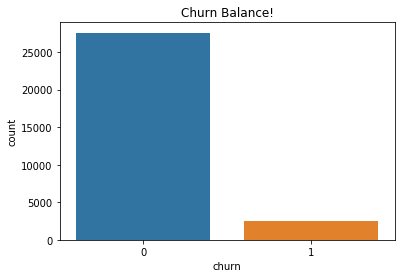

In [49]:
plt.title('Churn Balance!');
sns.countplot(churned.churn);

In [50]:
col_with_9 = [col for col in churned.columns if '_9' in col]

In [51]:
col_with_9

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9']

In [92]:
churned_df = churned.drop(col_with_9, axis=1)

In [93]:
churned_df.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7  \
0             0.0             0.0             0.0   197.385   214.816   
1             0.0             0.0             0.0  1069.180  1349.850   
2             0.0             0.0             0.0   378.721   492.223   
3             0.0             0.0             0.0   514.453   597.753   
4             0.0             0.0             0.0    74.350   193.897   

     arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   213.803    -44.94748   -17.182188         0.00    186.583454   
1  3171.480     57.84000    54.680000        52.29    453.430000   
2   137.362    413.69000   351.030000        35.08     94.660000   
3   637.760    102.41000   132.110000        85.14    757.930000   
4   366.966     48.96000    50.660000        33.58     85.410000   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0    174.639867          0.00        31.6895      22.344051           0.00   
1    567.160000        325.91        16.2300      33.490000          31.64   
2     80.630000        136.48         0.0000       0.000000           0.00   
3    896.680000        983.39         0.0000       0.000000           0.00   
4     89.360000        205.89         0.0000       0.000000           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0      13.464656       5.109151           0.00         40.717924   
1      23.740000      12.590000          38.06         51.390000   
2       0.000000       0.000000           0.00        297.130000   
3       0.000000       0.000000           0.00          4.480000   
4       0.000000       0.000000           0.00         48.960000   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0         26.941959              0.00         93.341961         91.392588   
1         31.380000             40.28        308.630000        447.380000   
2        217.590000             12.49         80.960000         70.580000   
3          6.160000             23.34         91.810000         87.930000   
4         50.660000             33.58         82.940000         83.010000   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              0.00          3.749018          3.790855              0.00   
1            162.28         62.130000         55.140000             53.23   
2             50.54          0.000000          0.000000              0.00   
3            104.81          0.750000          0.000000              1.58   
4            148.56          0.000000          0.000000              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0         -7.806856        -14.532103              0.00      4.922438   
1          0.000000          0.000000              0.00    422.160000   
2          0.000000          0.000000              7.15    378.090000   
3          0.000000          0.000000              0.00     97.040000   
4          0.000000          0.000000             17.71    131.910000   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0    -12.813585          0.00         91.812845         93.341836   
1    533.910000        255.79          4.300000         23.290000   
2    288.180000         63.04        116.560000        133.430000   
3     94.090000        129.74         97.930000        125.940000   
4    133.680000        182.14          0.000000          0.000000   

   std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0              0.00         87.303734         90.800662              0.00   
1             12.01         49.890000         31.760000             49.14   
2             22.58         13.690000         10.040000             75.69   
3             61.79        665.360000        808.740000            876.99   
4              0.00          2.360000          6.350000             39.61   

   std_og_t2f_mou_6  std_og_t2f_mo

In [94]:
churned_df.describe()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou        arpu_6  \
count         30001.0         30001.0         30001.0  30001.000000   
mean              0.0             0.0             0.0    558.490824   
std               0.0             0.0             0.0    460.640461   
min               0.0             0.0             0.0  -2258.709000   
25%               0.0             0.0             0.0    309.865000   
50%               0.0             0.0             0.0    481.694000   
75%               0.0             0.0             0.0    699.943000   
max               0.0             0.0             0.0  27731.088000   

             arpu_7        arpu_8   onnet_mou_6   onnet_mou_7   onnet_mou_8  \
count  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000   
mean     560.782203    508.597957    259.981239    267.514080    232.409676   
std      479.776947    501.961981    460.144151    480.173486    459.404491   
min    -2014.045000   -945.808000    -66.904355   -318.524197   -505.028654   
25%      309.826000    231.473000     17.090000     16.040000     10.410000   
50%      480.943000    427.585000     84.580000     82.810000     65.610000   
75%      698.315000    661.491000    290.440000    290.240000    239.960000   
max    35145.834000  33543.624000   7376.710000   8157.780000  10752.560000   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
count  30001.000000  30001.000000  30001.000000   30001.000000   30001.000000   
mean     377.081828    381.232803    341.885705      16.691874      13.016649   
std      480.538474    497.087074    478.497388      76.343862      75.825030   
min        0.000000      0.000000      0.000000    -156.119483     -91.004481   
25%       80.710000     78.540000     63.190000       0.000000       0.000000   
50%      222.540000    220.030000    182.830000       0.000000       0.000000   
75%      487.940000    494.010000    438.890000       0.000000       0.000000   
max     8362.360000   9667.130000  14007.340000    2613.310000    3813.290000   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
count   30001.000000   30001.000000   30001.000000   30001.000000   
mean       14.026484      26.816800      20.243648      20.145211   
std        74.481743     116.163457      96.083805     104.675300   
min      -380.719540       0.000000     -17.236839     -12.622701   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      4169.810000    3775.110000    2812.040000    5337.040000   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
count      30001.000000      30001.000000      30001.000000      30001.000000   
mean          85.224438         86.156532         79.218400        164.938949   
std          228.585389        240.380702        227.051799        249.319359   
min            0.000000          0.000000          0.000000          0.000000   
25%            5.240000          5.530000          4.360000         21.840000   
50%           26.760000         26.910000         25.760000         83.190000   
75%           77.980000         78.340000         72.040000        208.930000   
max         6431.330000       7400.660000      10752.560000       4729.740000   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
count      30001.000000      30001.000000      30001.000000      30001.000000   
mean         164.645837        155.347309          6.412220          6.491537   
std          240.775404        232.000381         22.109693         21.930071   
min            0.000000          0.000000          0.000000          0.000000   
25%           23.680000         19.090000          0.000000          0.000000   
50%           84.510000         81.560000          0.230000          0.280000   
75%   

#### From the above description, we can see we have some columns that have no information, 0 variation. So we can delete these columns

In [95]:
churned_df.churn = churned_df.churn.astype('int')
col_to_remove = [col for col in churned_df.columns if churned_df[col].std()==0]

In [96]:
churned_df = churned_df.drop(col_to_remove,axis=1)

In [97]:
churned_df.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000   
mean     558.490824    560.782203    508.597957    259.981239    267.514080   
std      460.640461    479.776947    501.961981    460.144151    480.173486   
min    -2258.709000  -2014.045000   -945.808000    -66.904355   -318.524197   
1%         1.000000      0.700000      0.000000    -44.767756    -16.927672   
10%      171.605000    177.886000     84.000000      0.710000      0.580000   
25%      309.865000    309.826000    231.473000     17.090000     16.040000   
50%      481.694000    480.943000    427.585000     84.580000     82.810000   
75%      699.943000    698.315000    661.491000    290.440000    290.240000   
90%      994.099000    995.859000    977.345000    754.160000    784.480000   
95%     1240.964000   1261.272000   1255.019000   1135.440000   1185.790000   
99%     1985.115000   1999.500000   1986.622000   2151.740000   2201.960000   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  30001.000000  30001.000000  30001.000000  30001.000000   30001.000000   
mean     232.409676    377.081828    381.232803    341.885705      16.691874   
std      459.404491    480.538474    497.087074    478.497388      76.343862   
min     -505.028654      0.000000      0.000000      0.000000    -156.119483   
1%       -43.470899      0.000000      0.000000      0.000000       0.000000   
10%        0.000000     17.280000     16.200000     10.090000       0.000000   
25%       10.410000     80.710000     78.540000     63.190000       0.000000   
50%       65.610000    222.540000    220.030000    182.830000       0.000000   
75%      239.960000    487.940000    494.010000    438.890000       0.000000   
90%      665.080000    895.830000    916.080000    823.680000      31.840000   
95%     1074.590000   1256.610000   1272.290000   1167.540000      85.280000   
99%     2159.110000   2326.360000   2410.890000   2193.130000     342.440000   
max    10752.560000   8362.360000   9667.130000  14007.340000    2613.310000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   30001.000000   30001.000000   30001.000000   30001.000000   
mean       13.016649      14.026484      26.816800      20.243648   
std        75.825030      74.481743     116.163457      96.083805   
min       -91.004481    -380.719540       0.000000     -17.236839   
1%          0.000000       0.000000       0.000000       0.000000   
10%         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
90%        19.030000      34.165212      50.430000      31.090000   
95%        55.990000      57.922509     145.410000     104.240000   
99%       281.990000     283.710000     530.710000     438.590000   
max      3813.290000    4169.810000    3775.110000    2812.040000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   30001.000000      30001.000000      30001.000000      30001.000000   
mean       20.145211         85.224438         86.156532         79.218400   
std       104.675300        228.585389        240.380702        227.051799   
min       -12.622701          0.000000          0.000000          0.000000   
1%          0.000000          0.000000          0.000000          0.000000   
10%         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          5.240000          5.530000          4.360000   
50%         0.000000         26.760000         26.910000         25.760000   
75%         0.000000         77.980000         78.340000         72.040000   
90%        28.880000        187.930000

This table shows there are outliers in the data set.

And we need to think about the percentile we should use as the cut off. So that we don't loose much of our data. 1%ile and 99%ile should be fine

In [98]:
cont_cols = [col for col in churned_df.columns if col not in ['churn']]

for col in cont_cols:
    percentiles = churned_df[col].quantile([0.01,0.99]).values
    churned_df[col][churned_df[col] <= percentiles[0]] = percentiles[0]
    churned_df[col][churned_df[col] >= percentiles[1]] = percentiles[1]

#### Donut plot

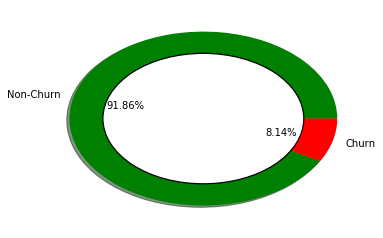

In [99]:
colors = [ 'green', 'red']
plt.pie(churned_df["churn"].value_counts(), colors=colors, labels=['Non-Churn','Churn'],
        autopct='%1.2f%%', shadow=True);
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25);
fig = plt.gcf()
fig.gca().add_artist(centre_circle);

In [100]:
cols = [col for col in churned_df.columns if col!='churn']

#### Box Plots for each columns

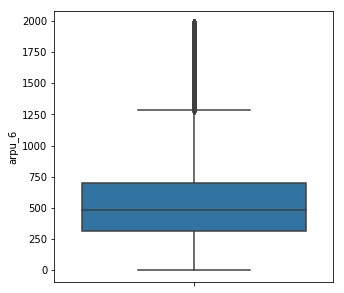

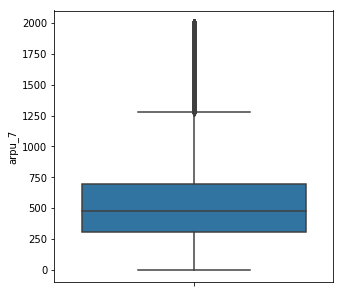

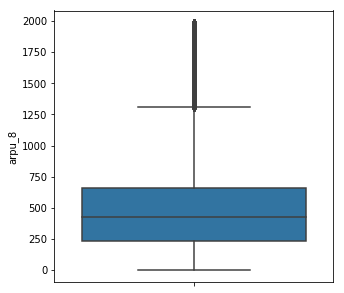

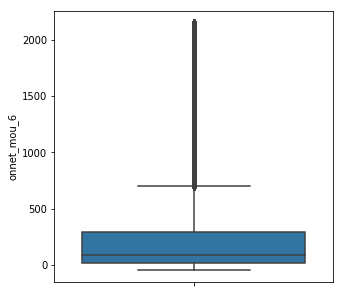

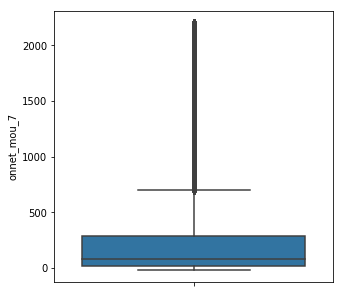

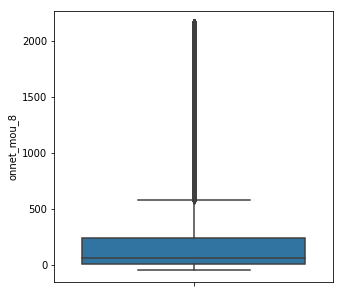

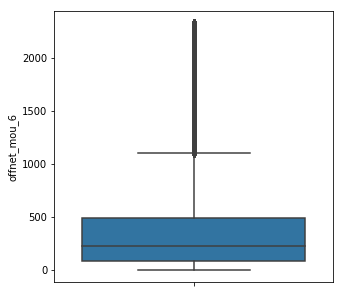

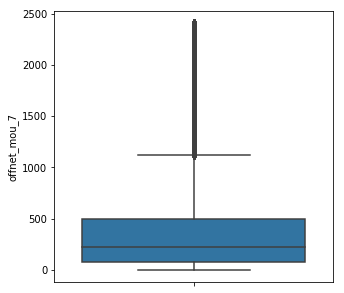

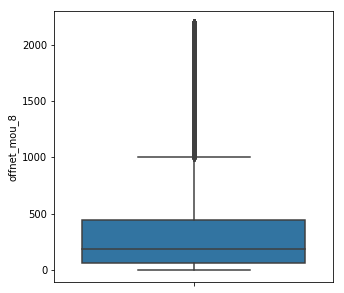

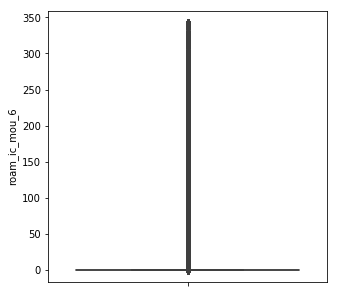

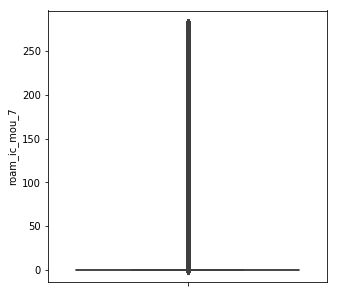

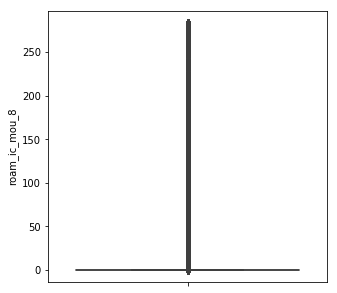

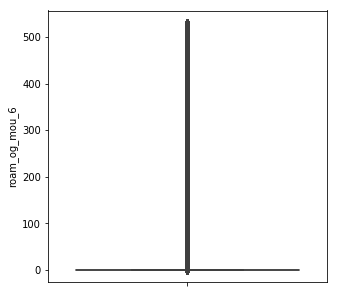

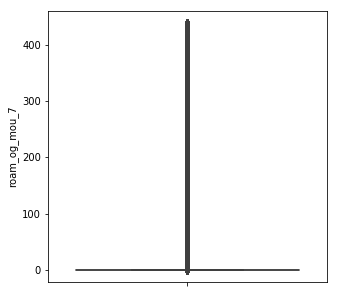

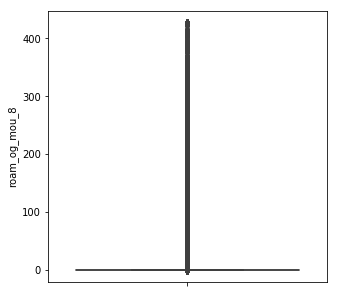

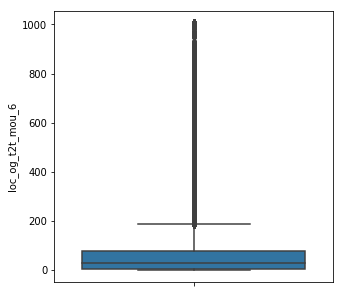

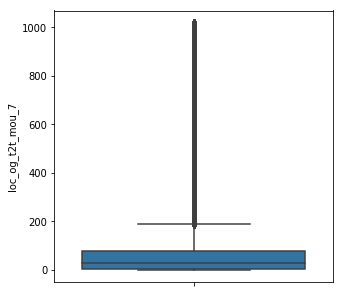

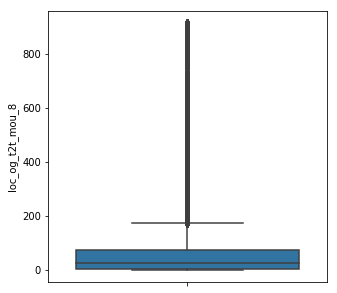

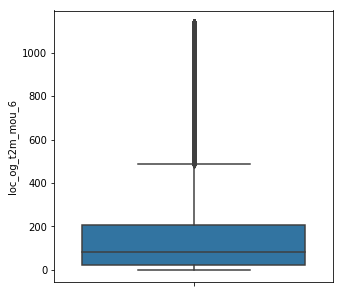

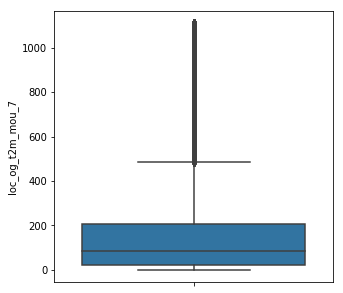

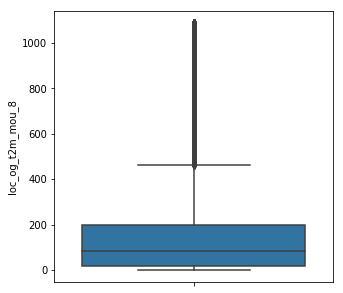

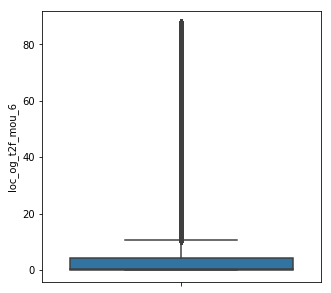

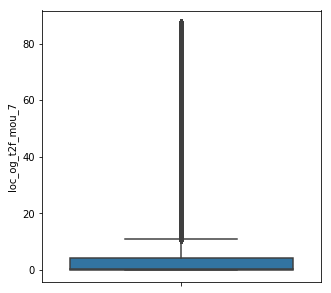

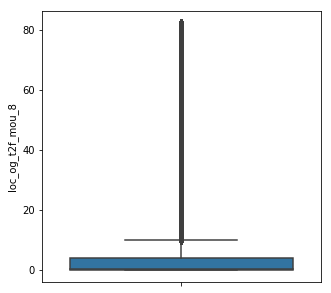

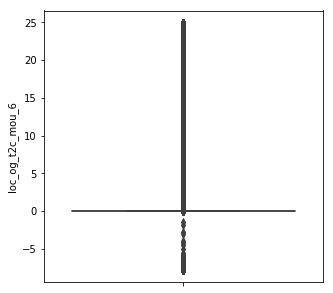

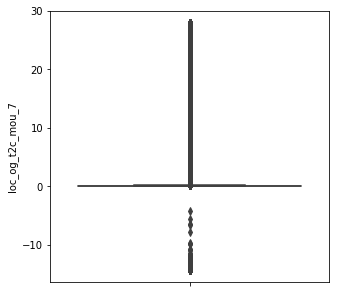

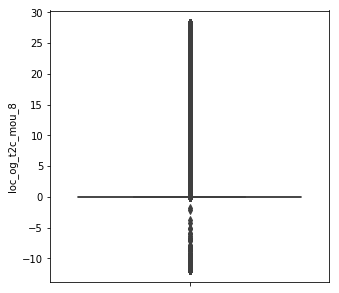

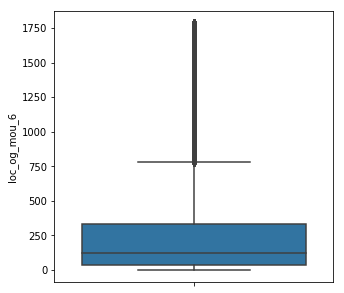

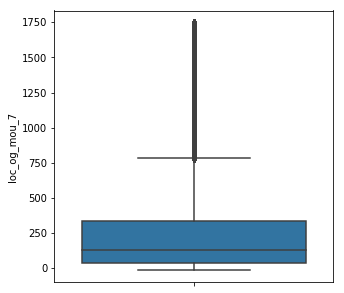

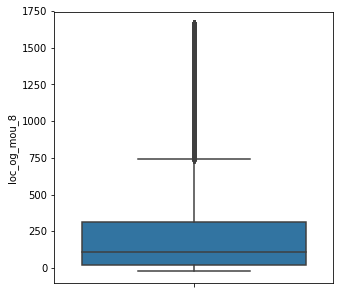

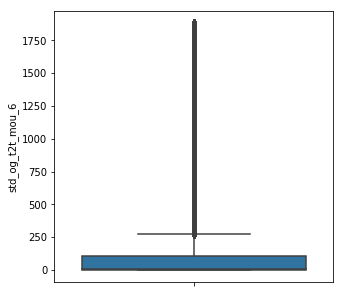

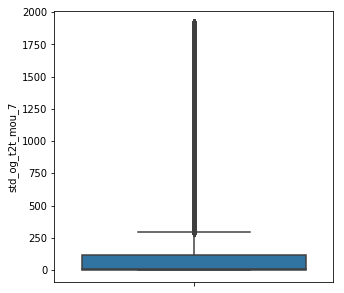

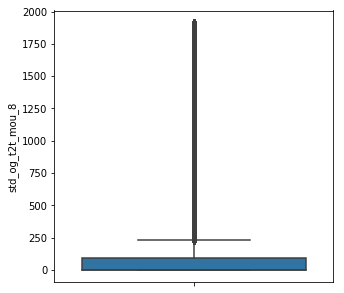

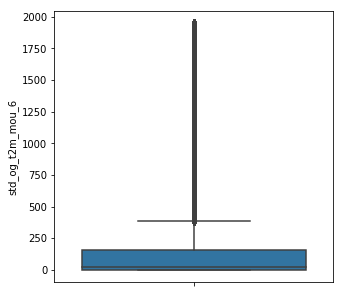

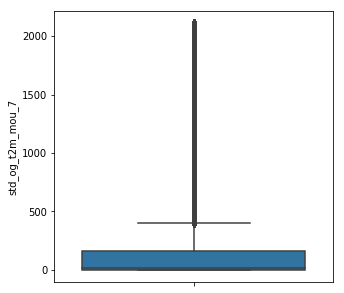

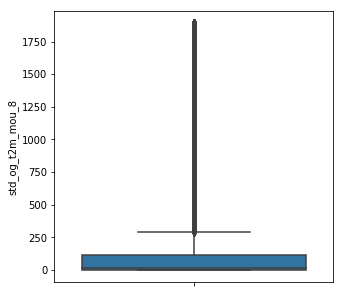

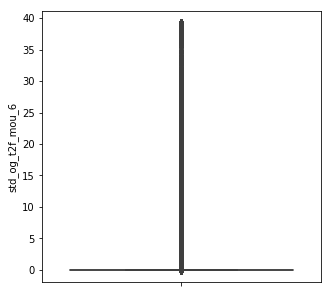

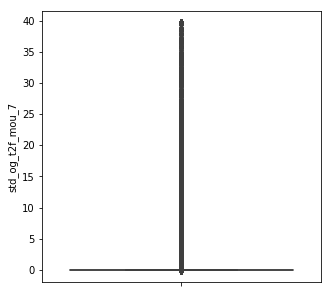

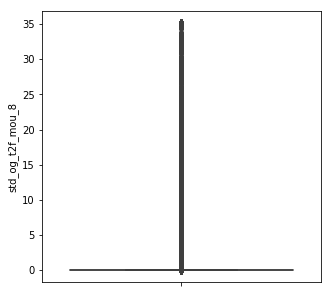

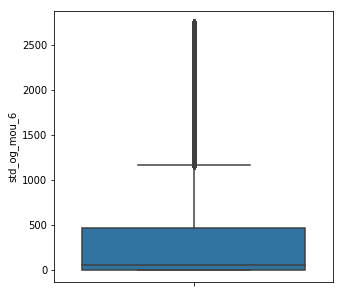

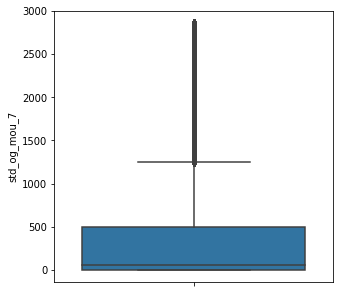

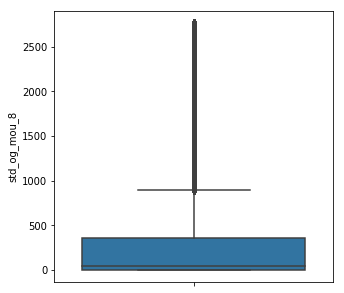

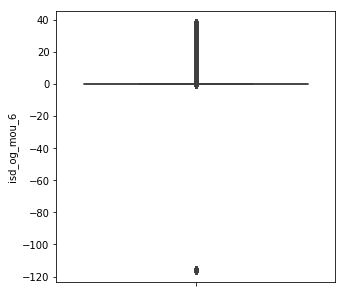

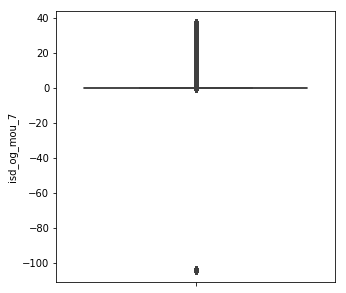

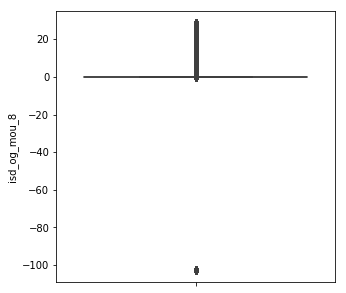

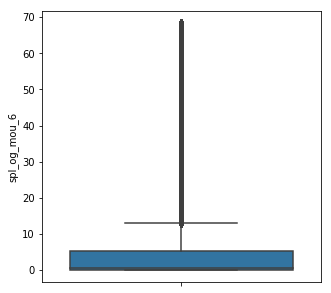

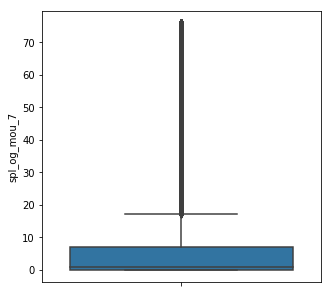

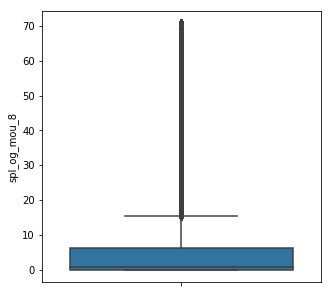

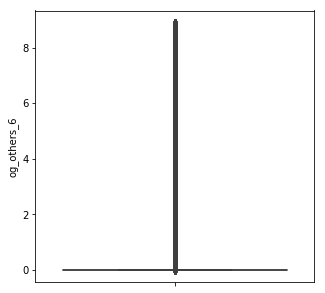

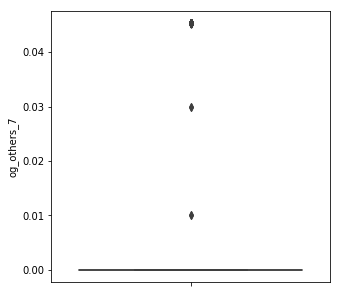

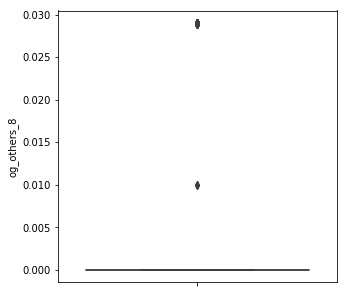

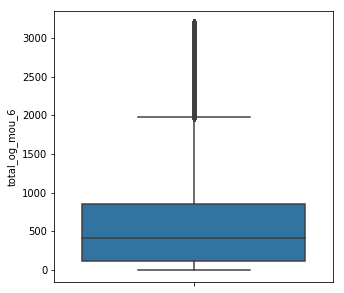

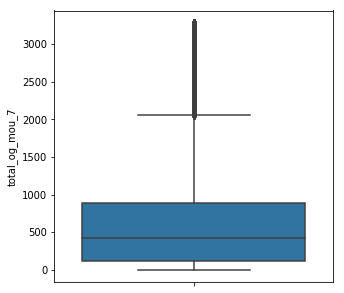

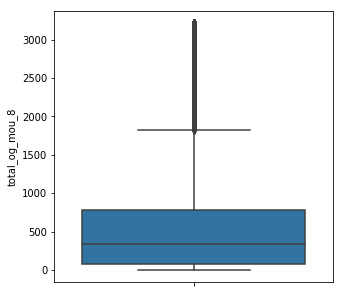

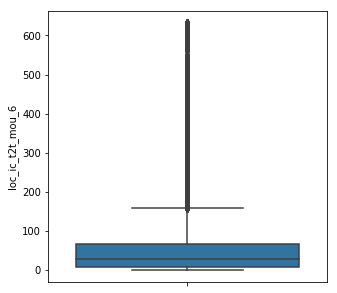

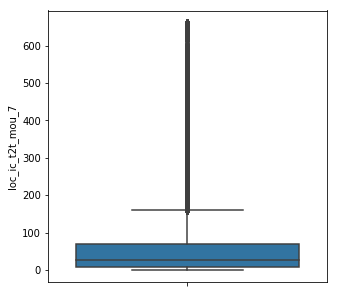

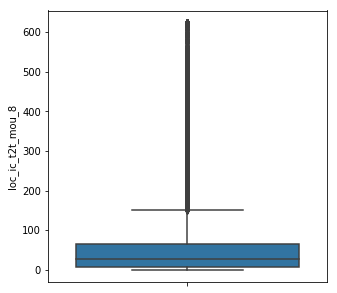

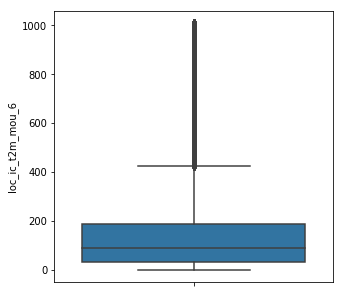

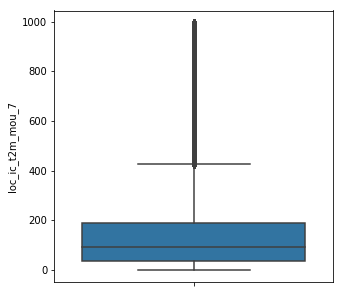

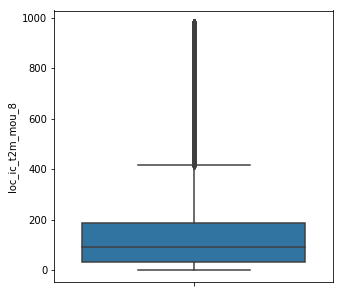

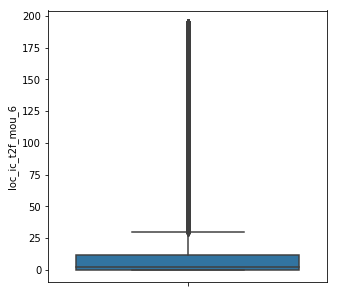

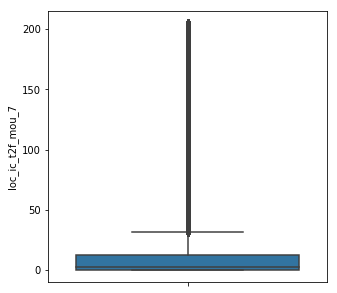

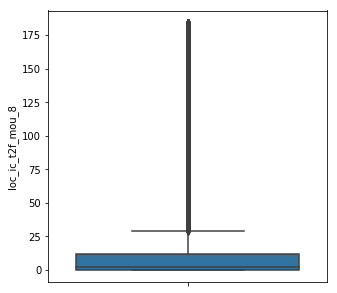

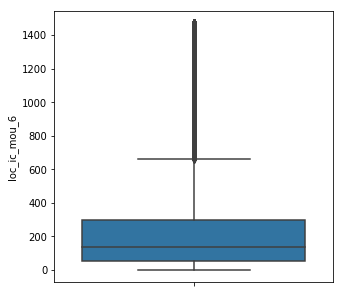

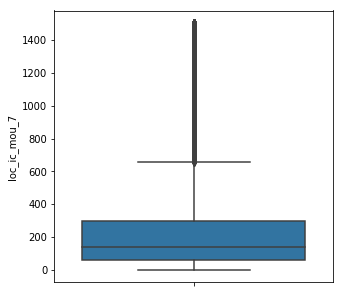

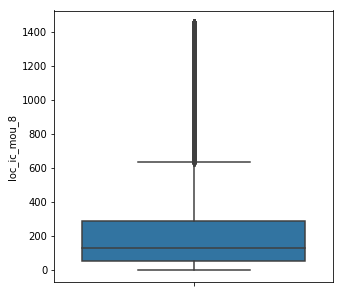

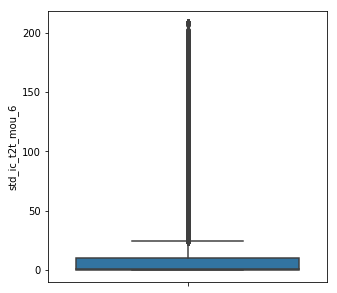

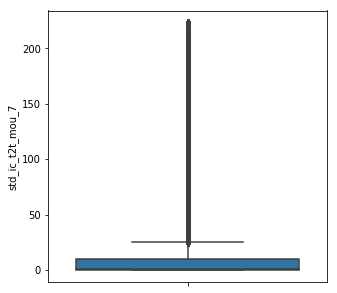

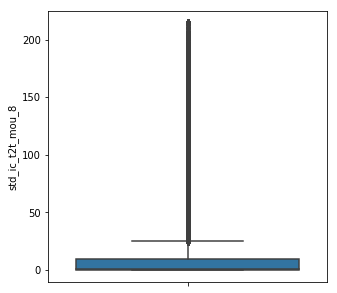

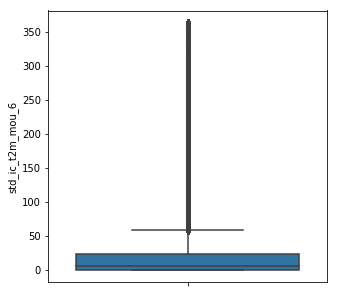

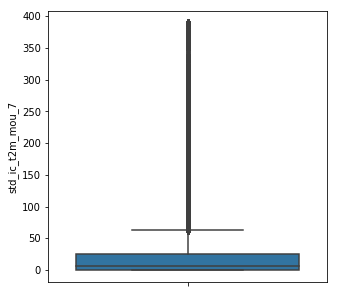

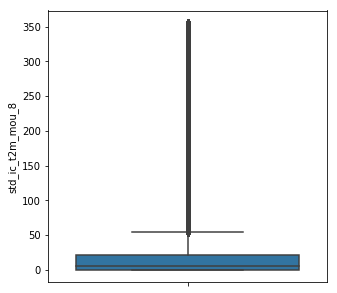

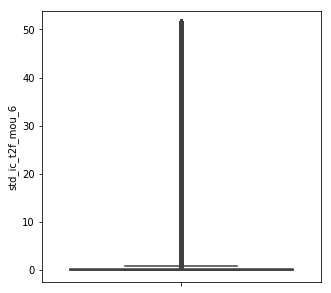

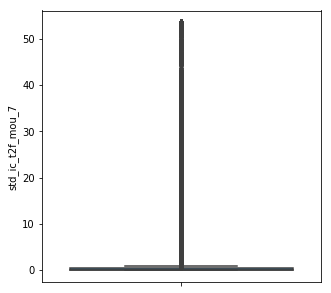

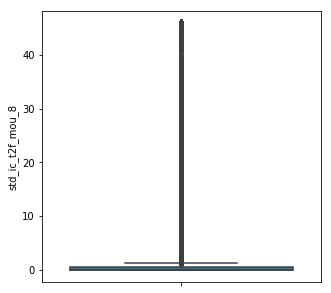

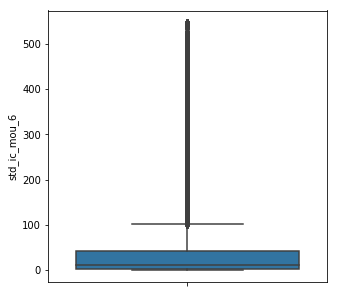

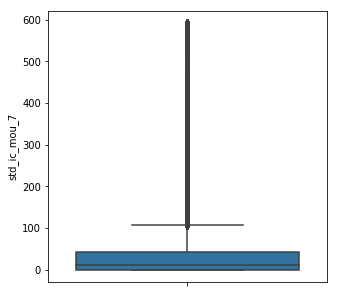

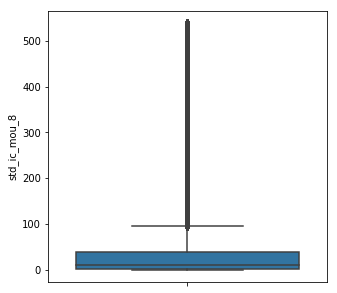

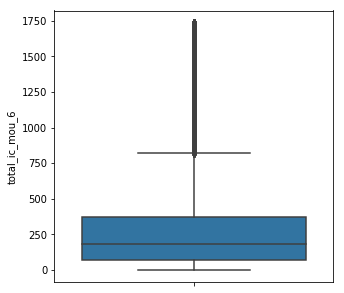

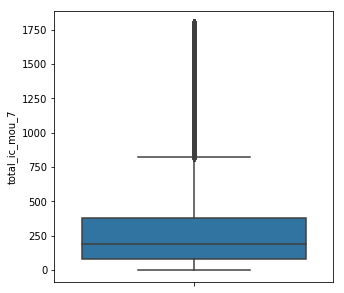

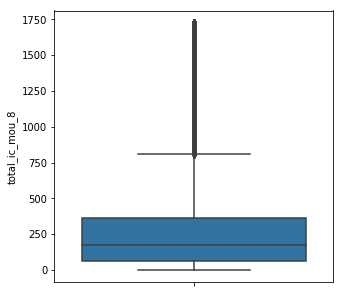

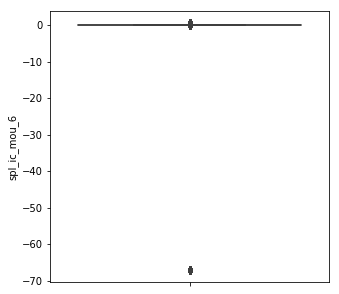

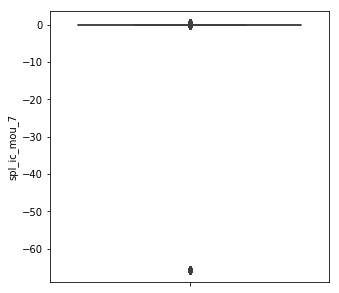

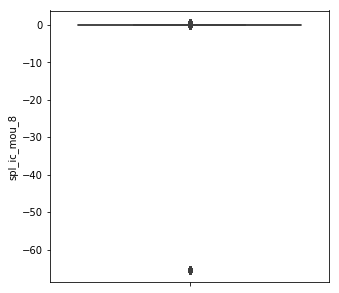

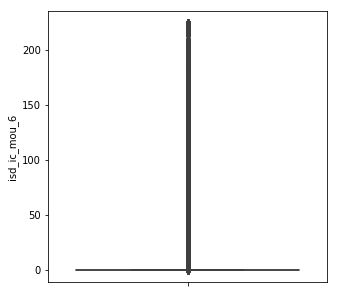

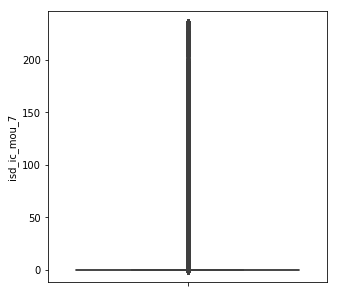

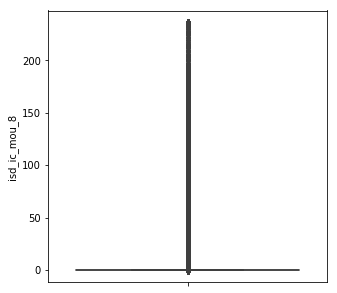

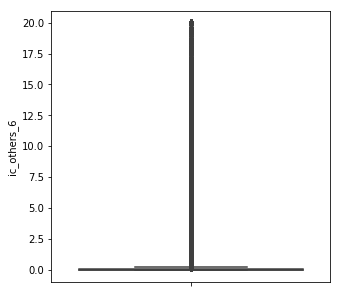

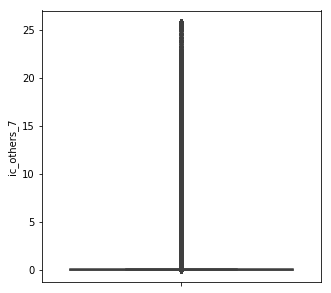

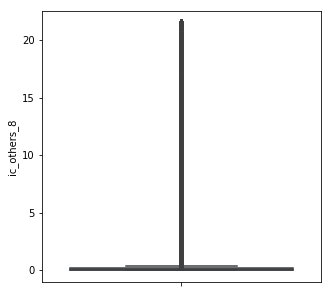

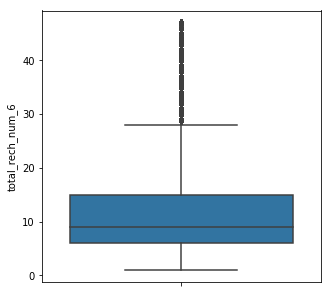

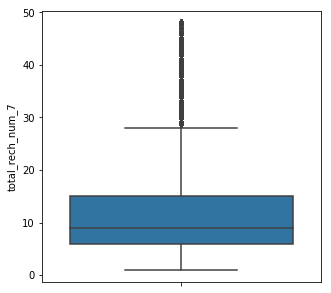

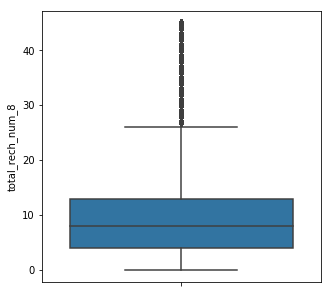

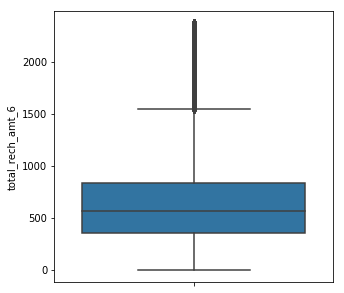

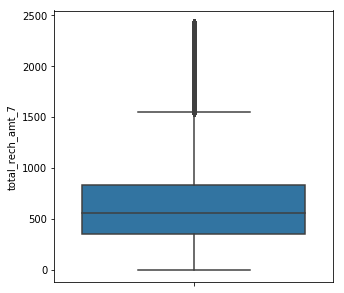

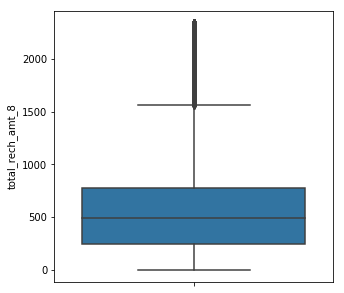

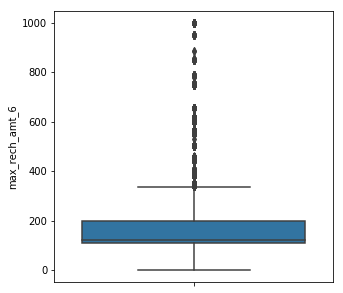

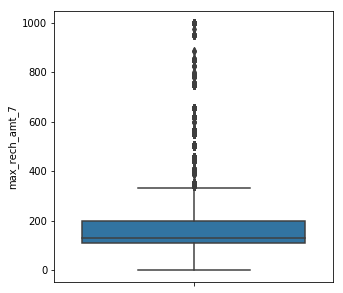

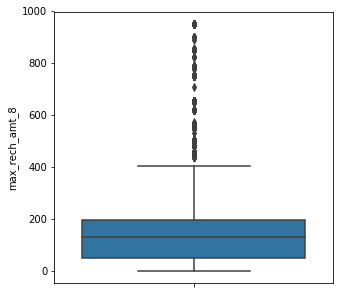

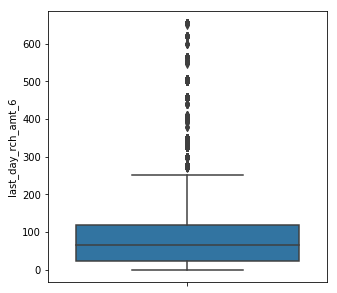

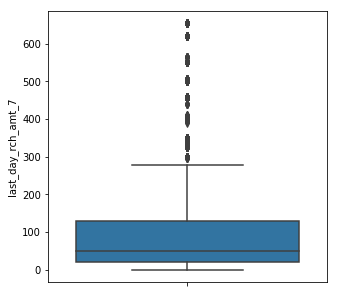

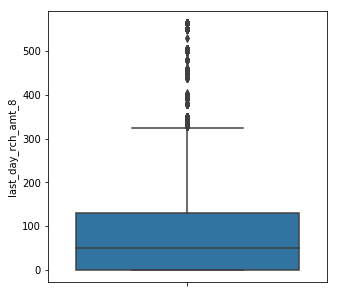

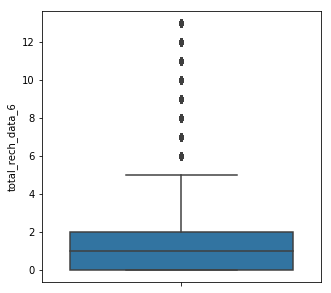

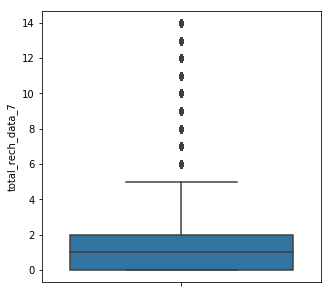

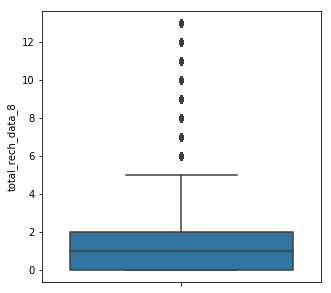

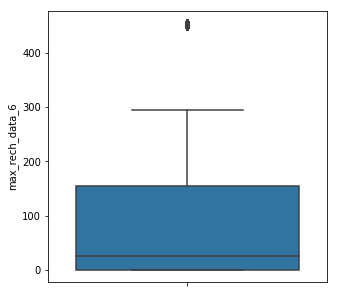

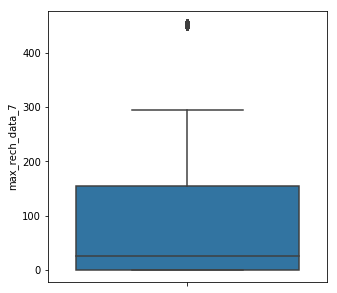

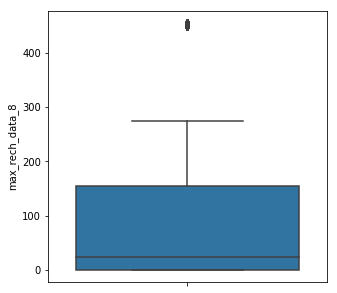

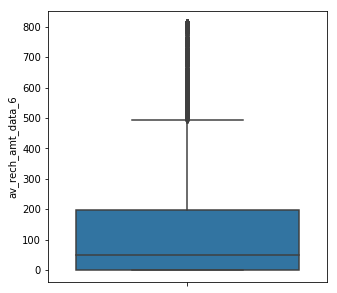

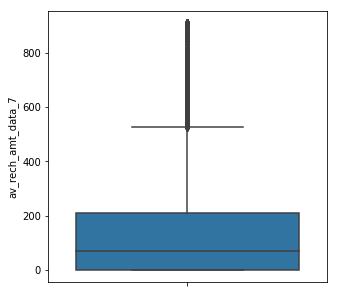

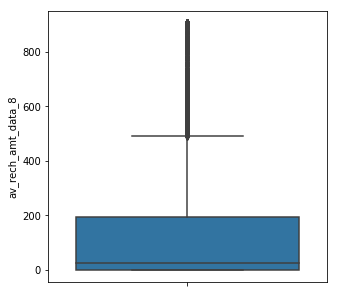

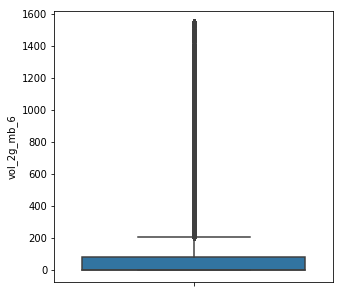

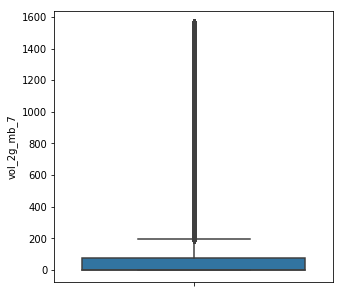

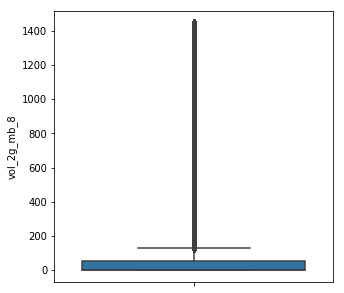

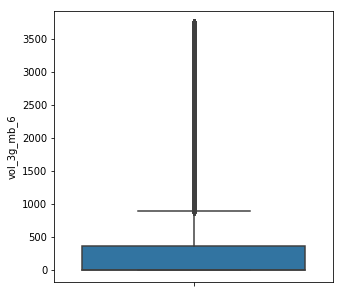

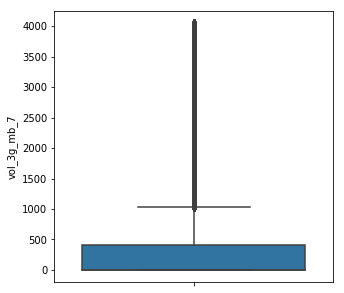

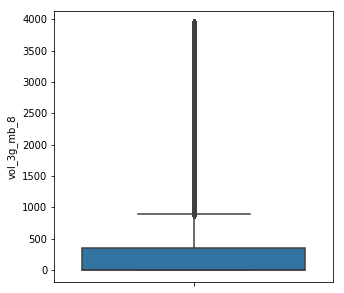

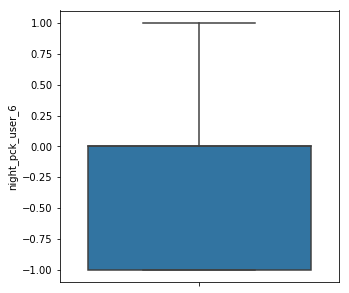

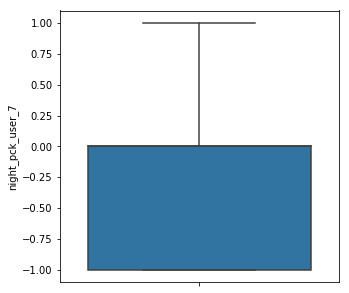

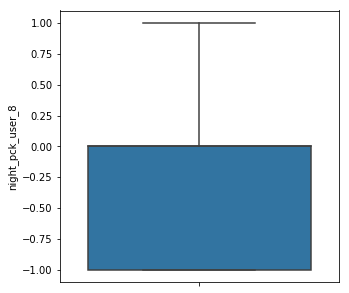

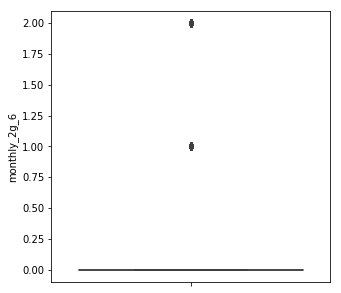

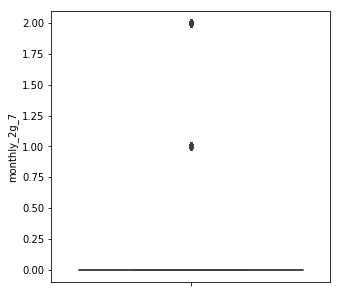

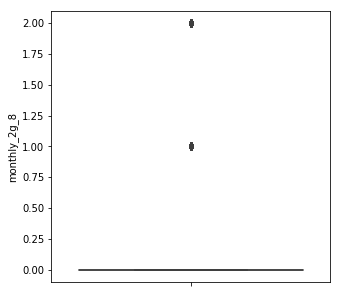

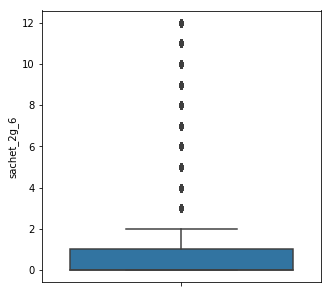

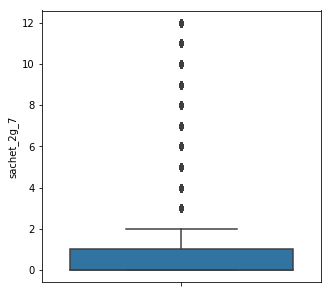

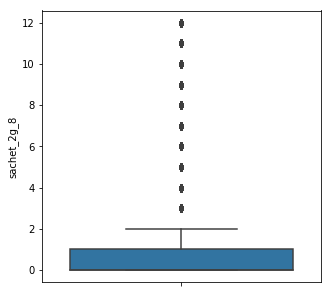

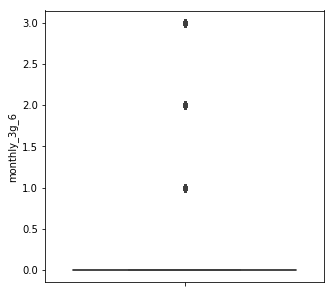

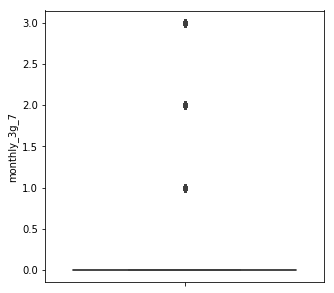

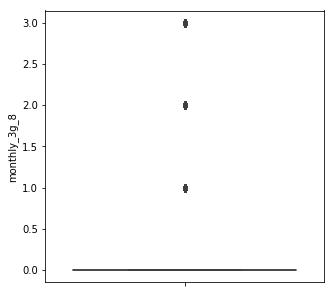

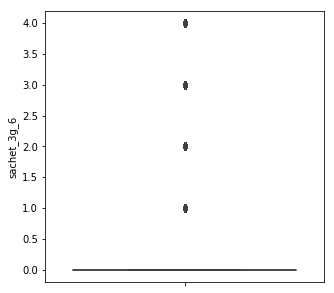

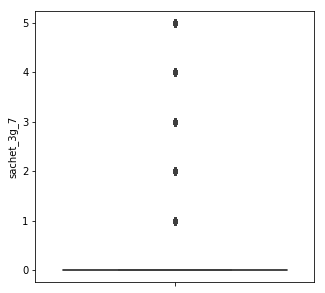

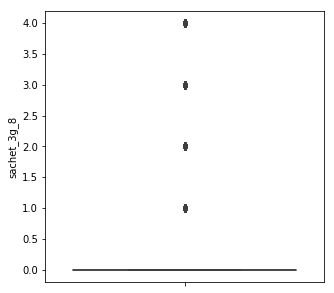

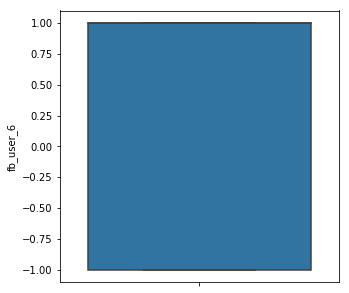

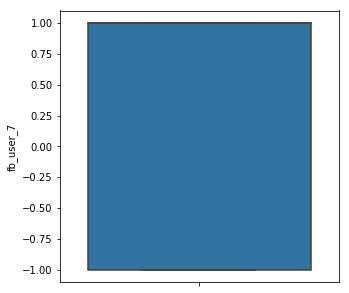

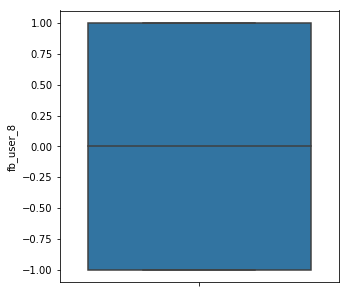

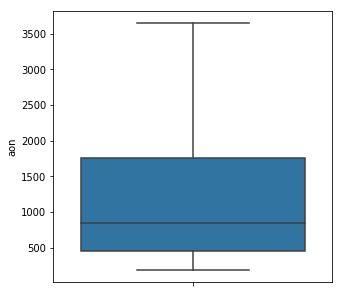

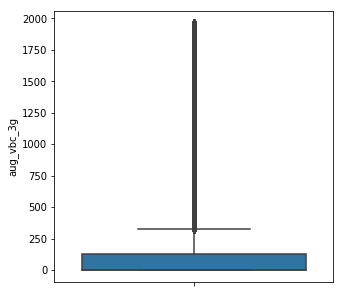

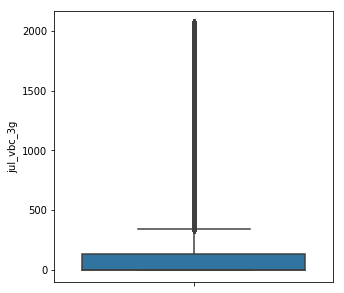

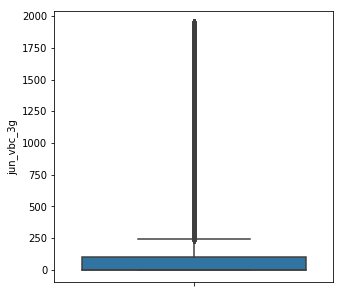

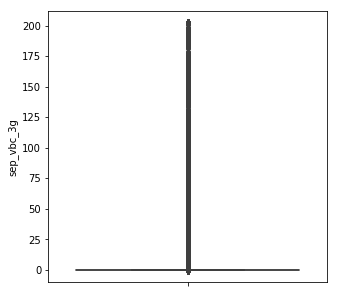

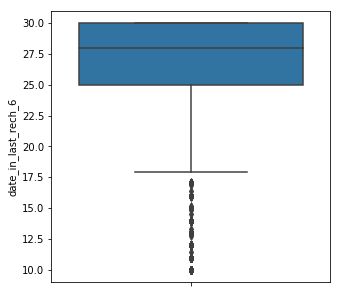

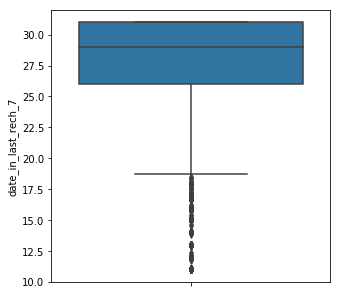

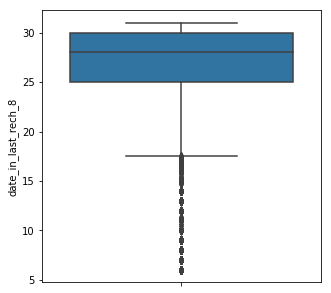

In [101]:
for col in cols:
    plt.figure(figsize=(5, 5))
    sns.boxplot(y=col, data=churned_df, )

#### Churn VS Non Churn for each attributes

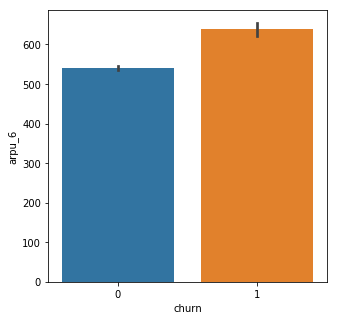

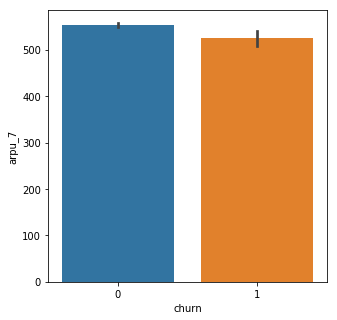

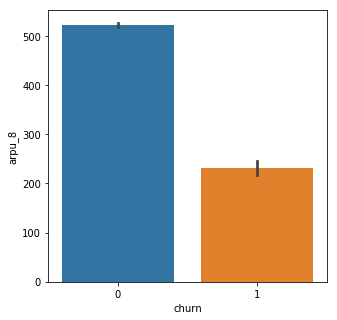

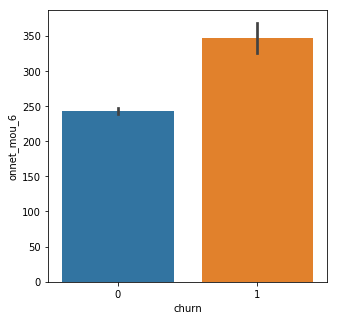

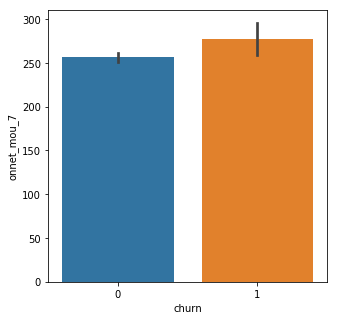

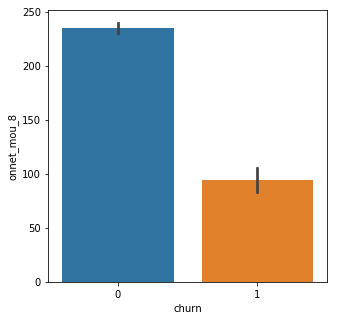

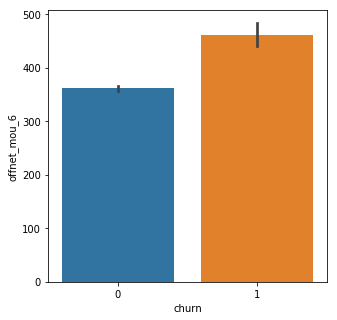

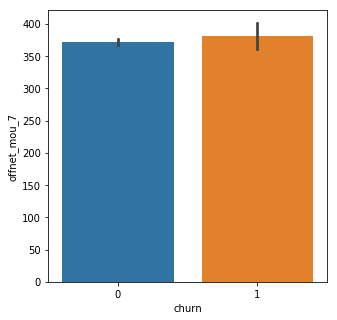

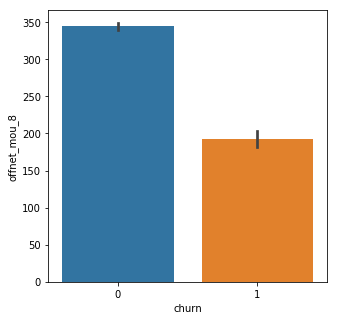

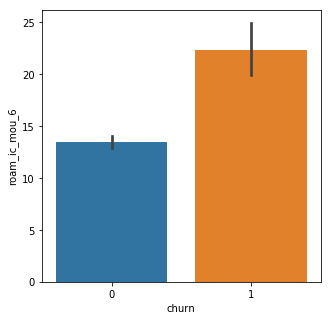

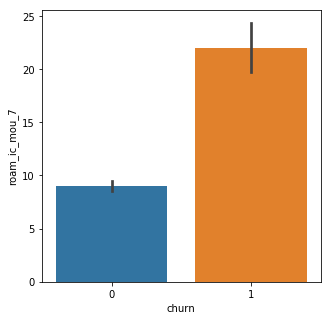

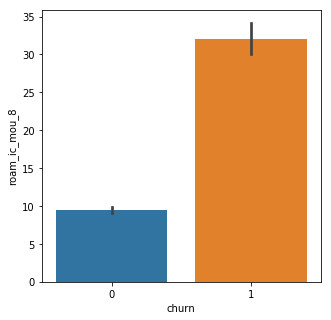

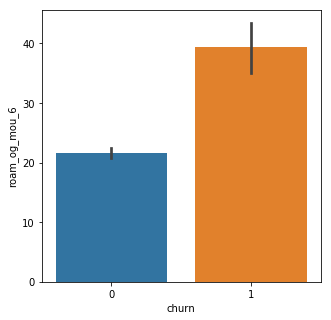

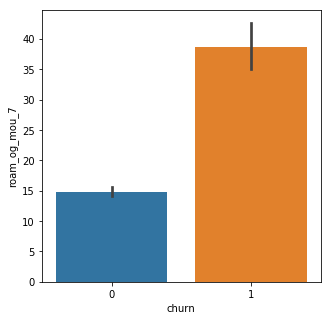

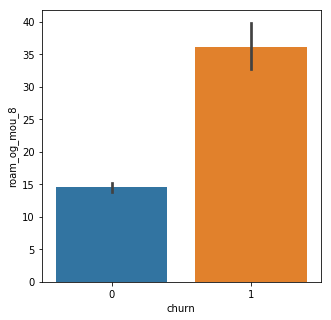

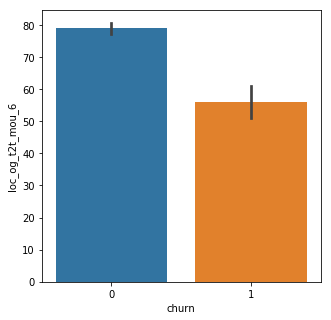

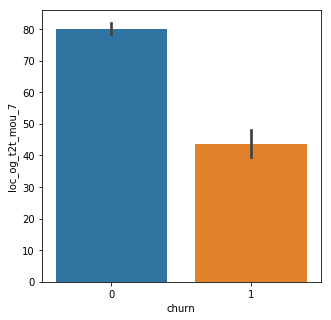

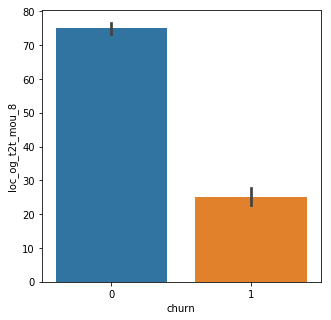

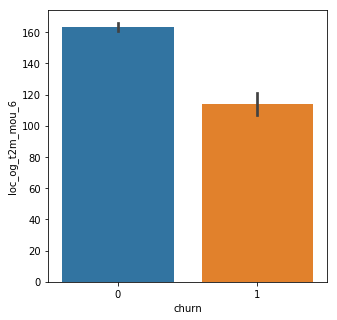

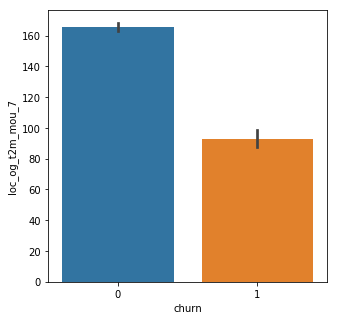

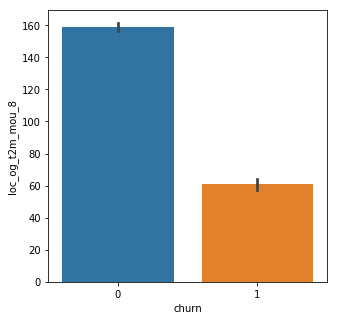

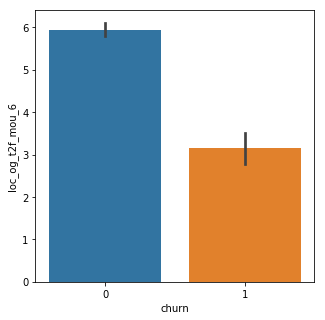

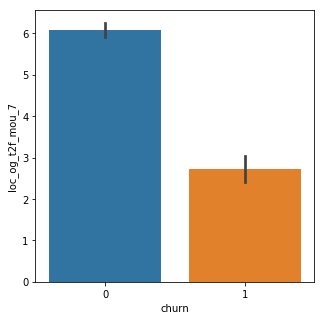

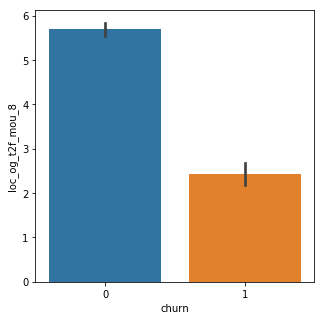

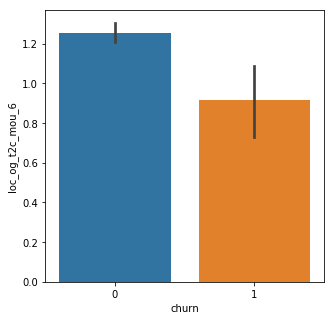

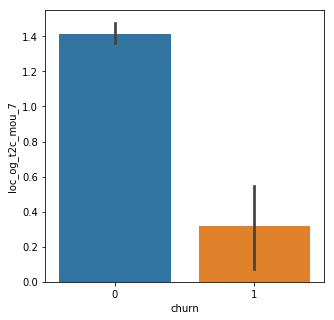

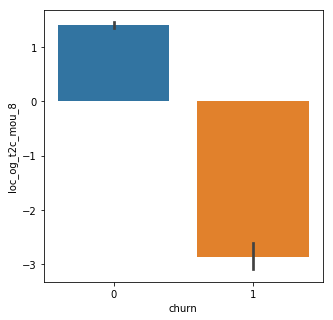

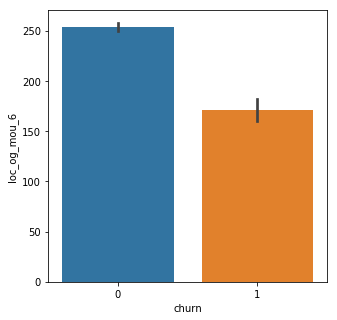

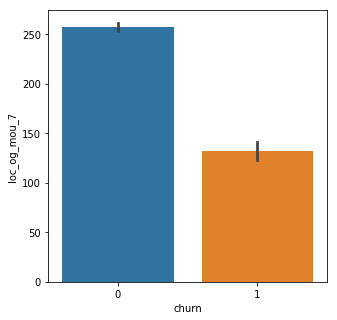

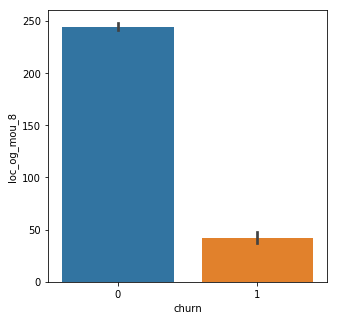

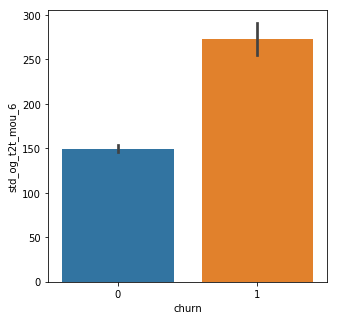

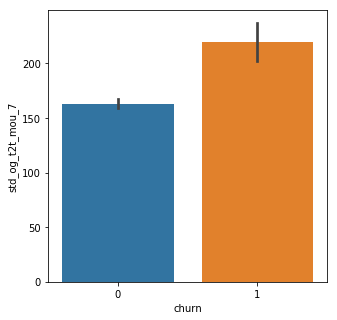

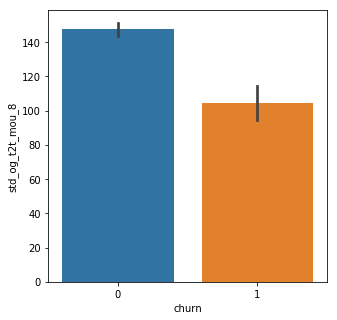

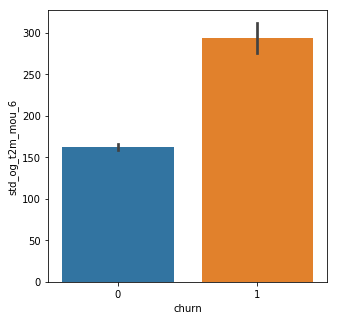

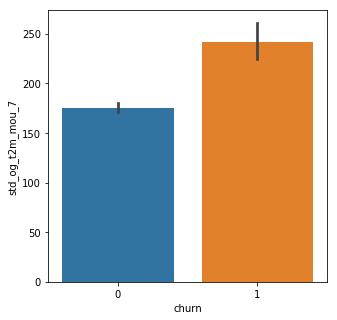

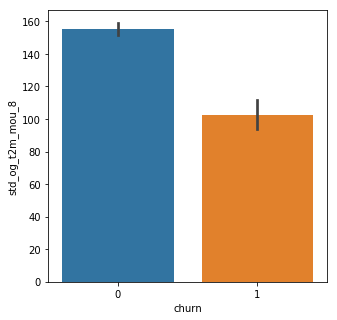

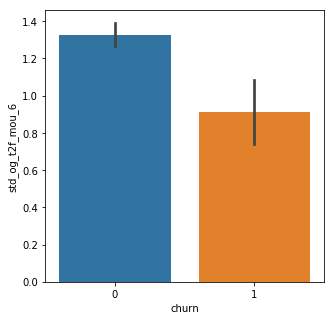

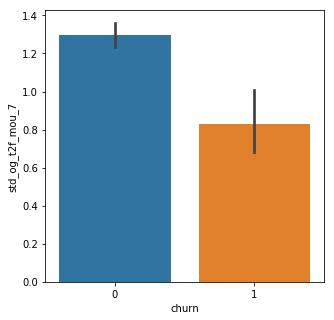

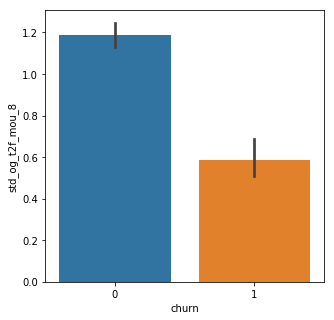

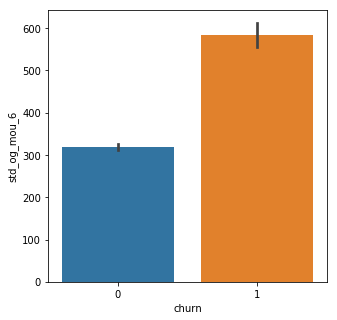

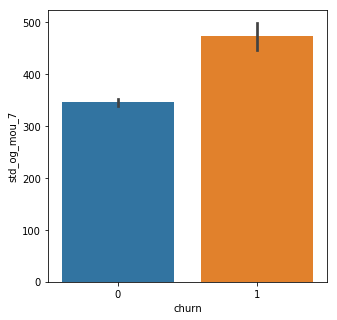

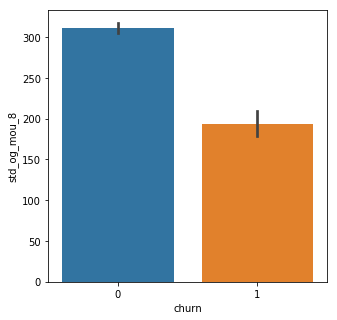

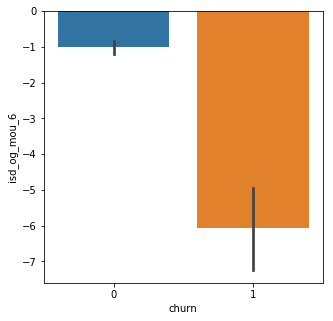

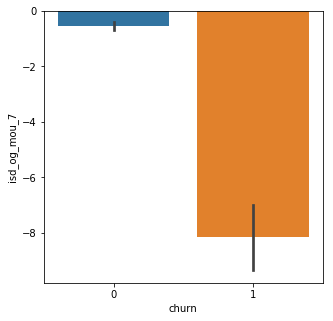

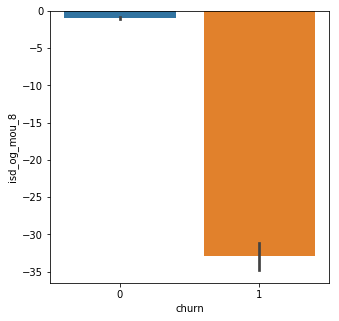

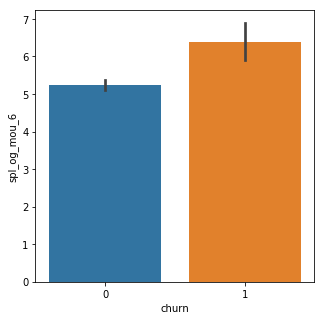

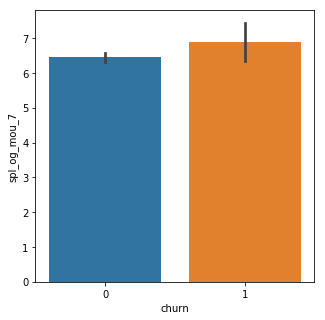

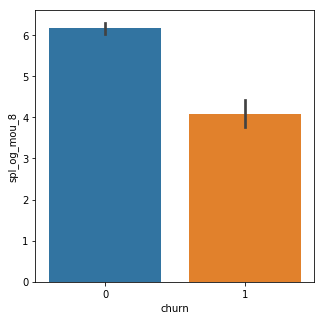

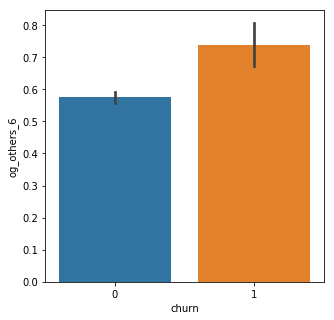

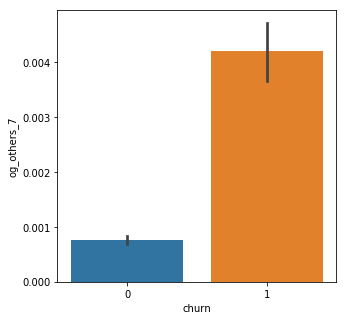

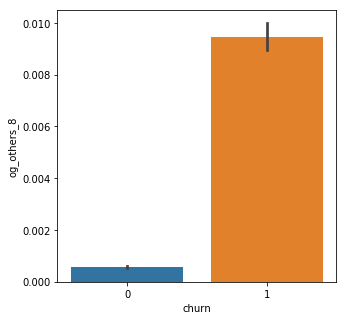

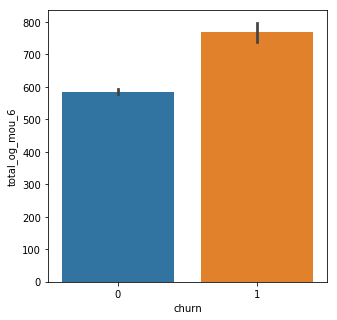

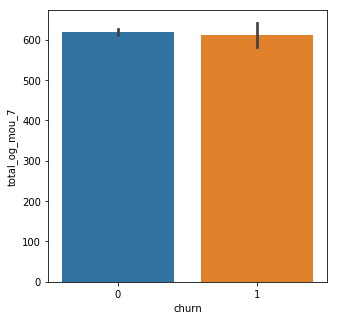

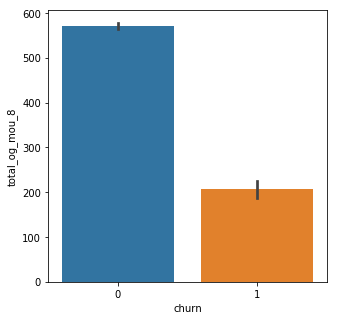

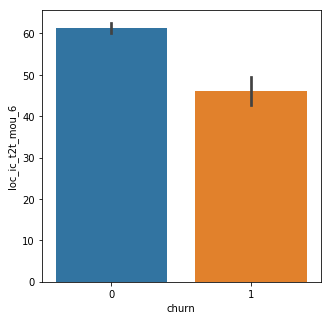

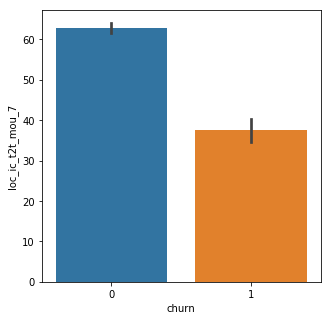

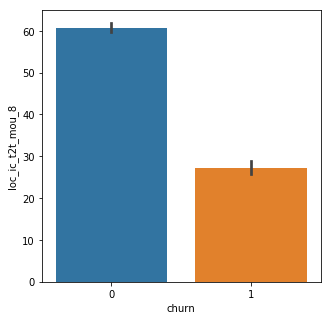

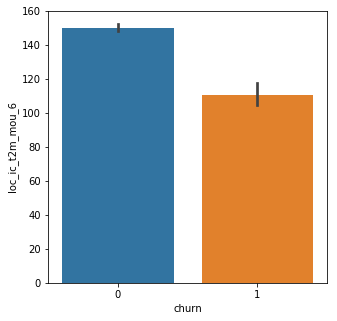

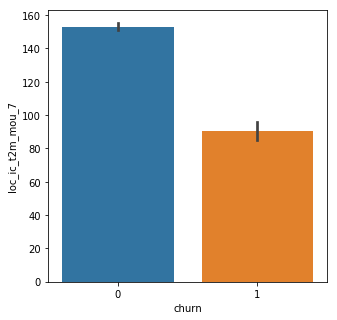

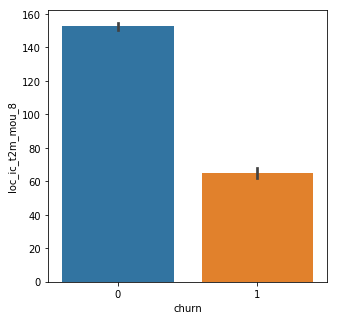

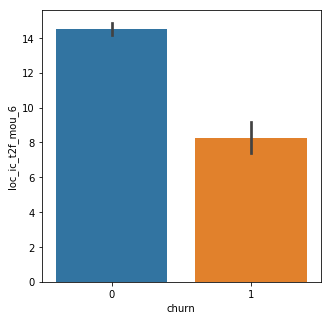

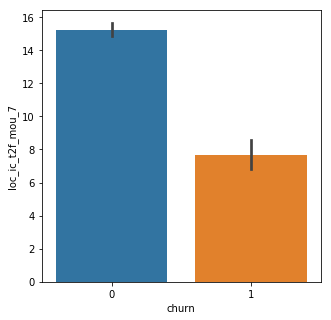

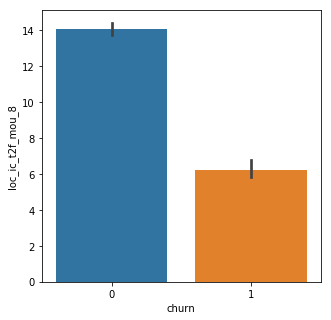

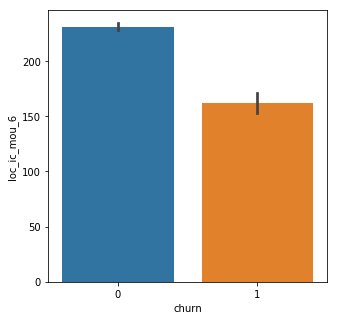

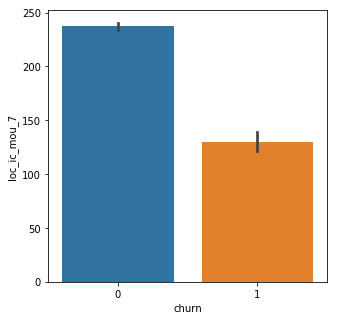

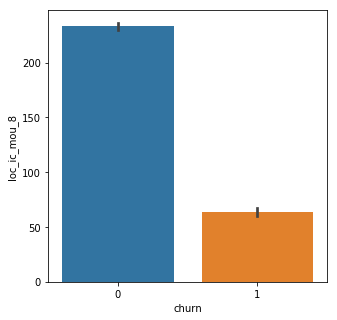

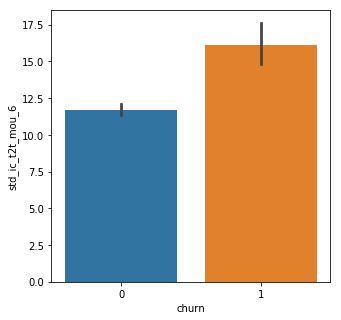

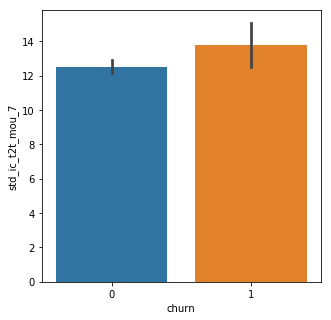

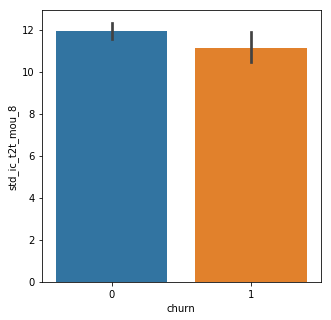

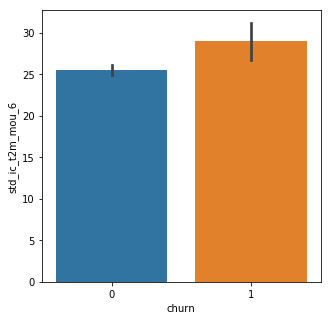

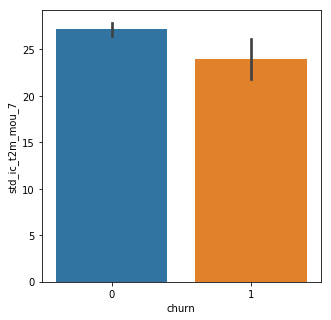

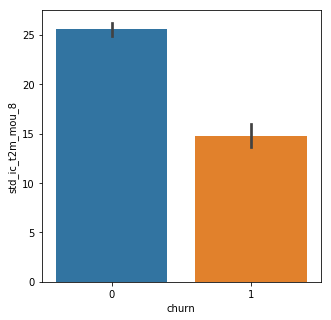

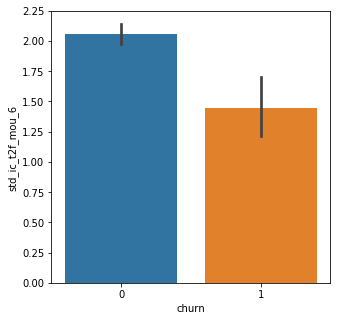

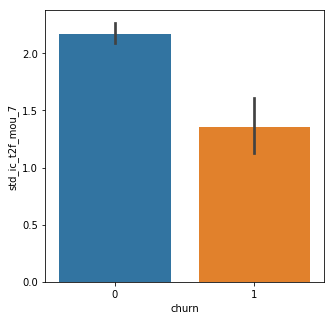

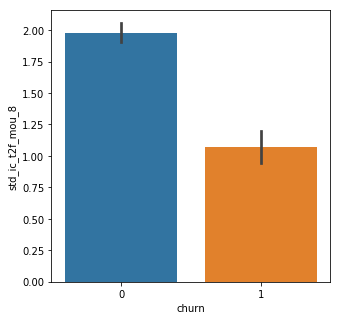

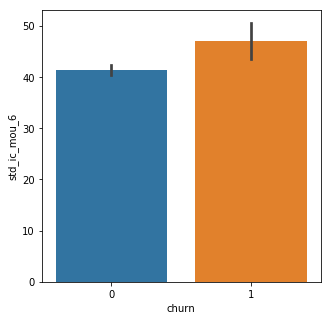

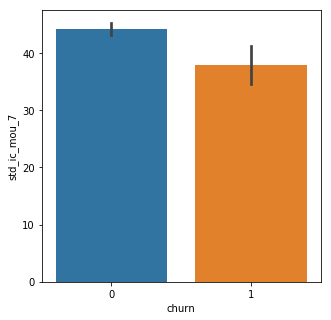

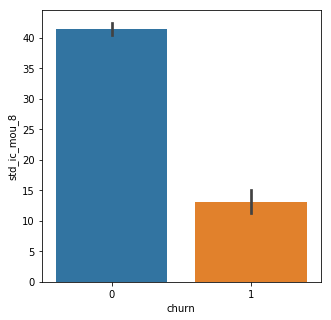

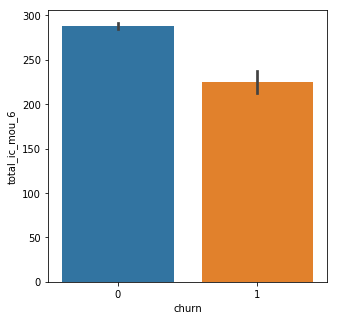

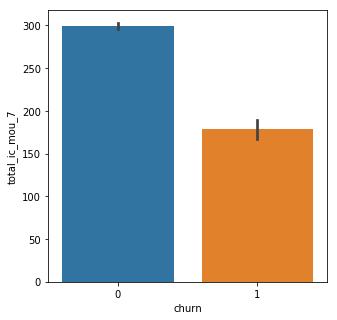

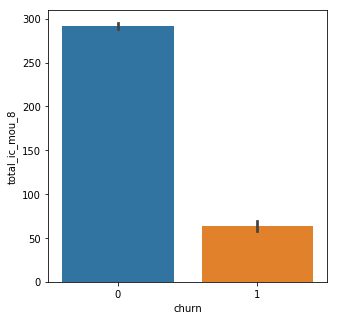

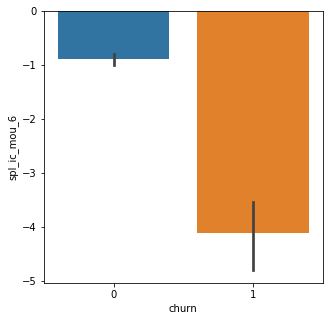

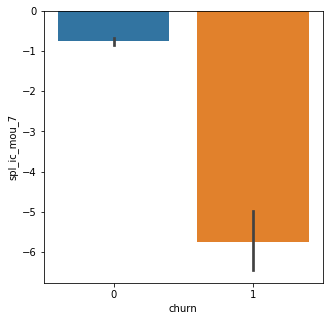

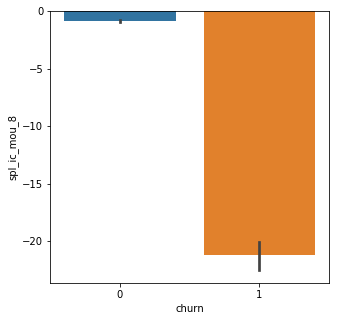

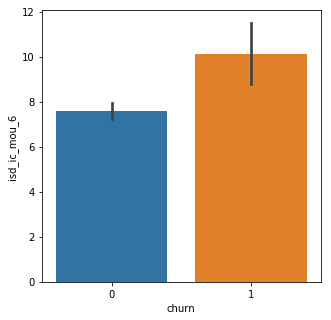

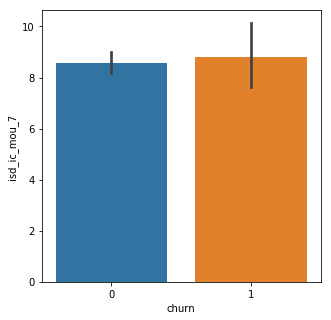

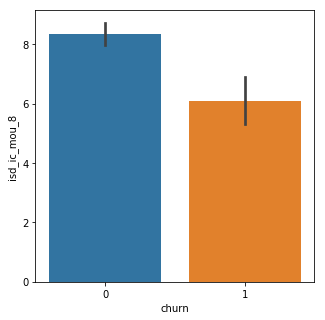

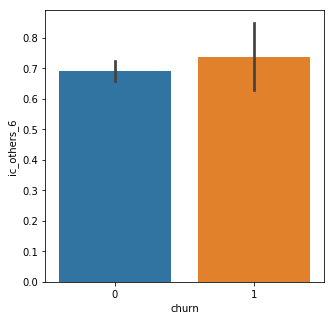

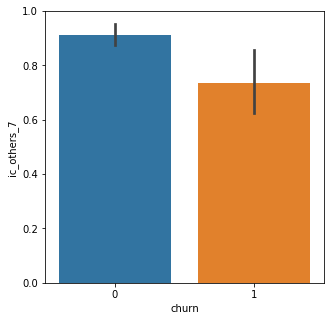

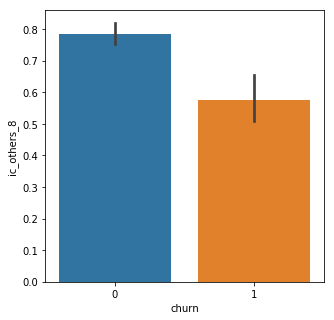

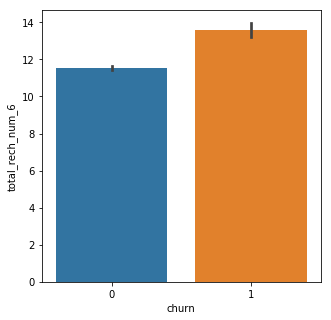

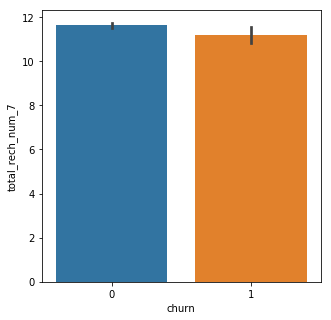

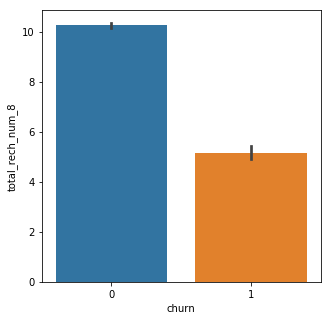

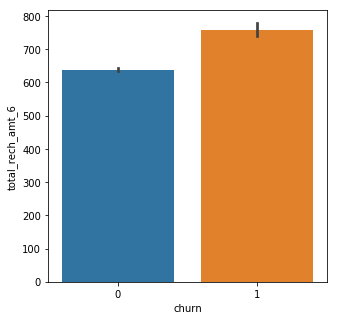

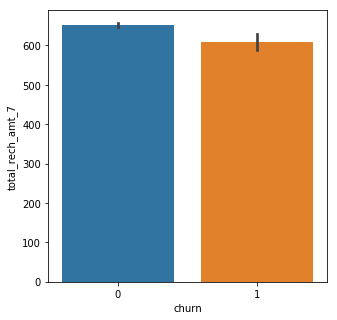

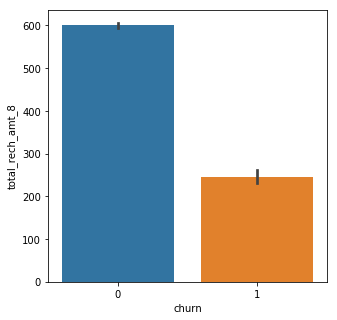

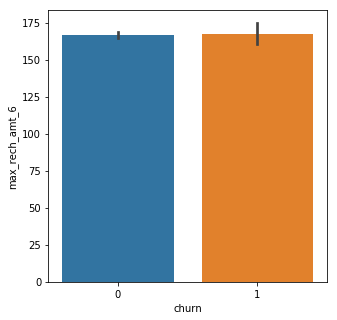

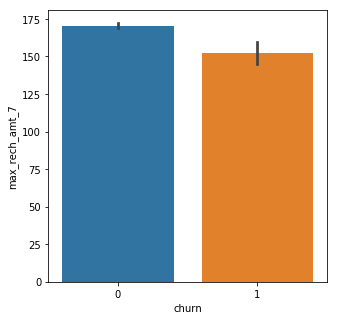

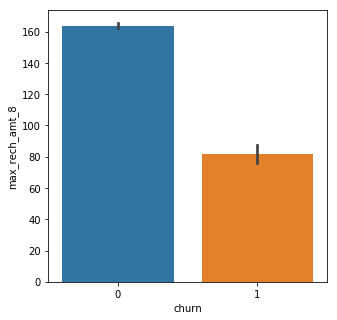

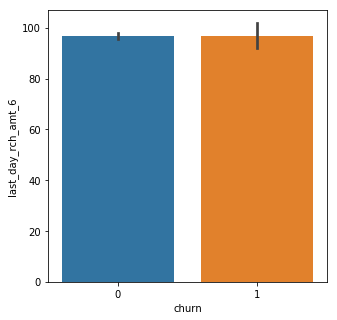

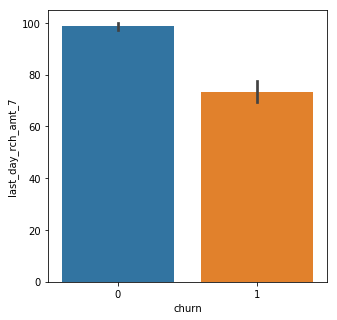

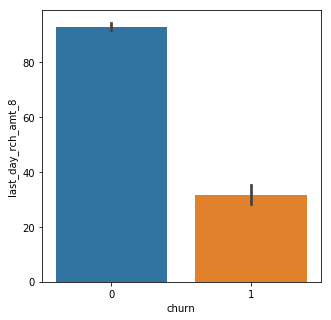

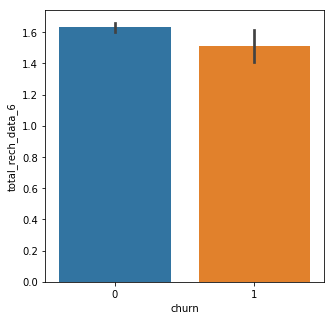

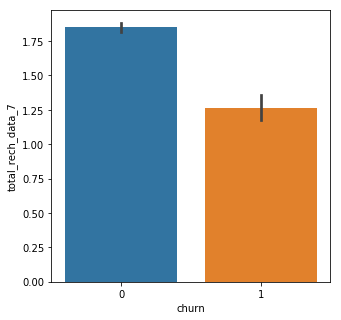

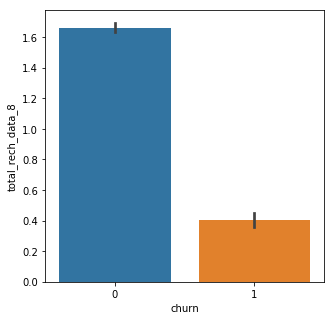

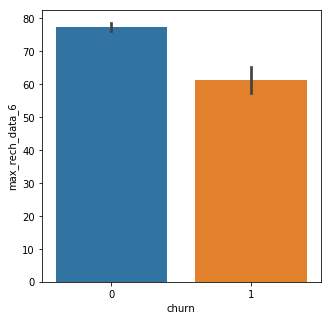

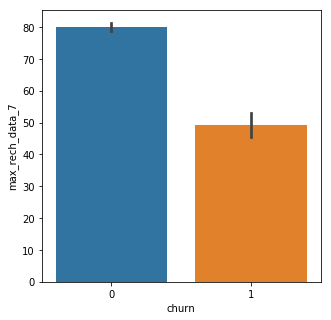

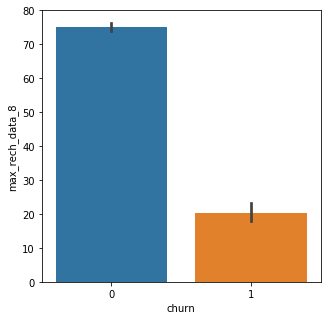

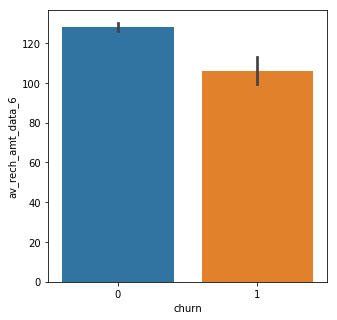

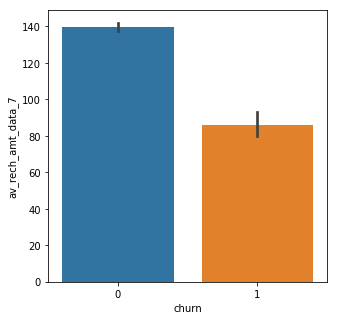

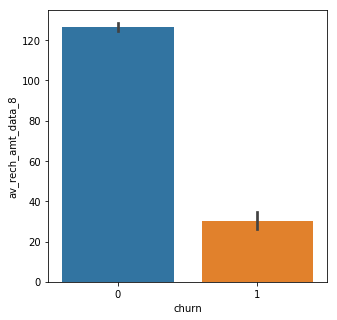

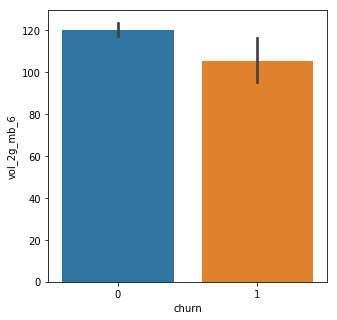

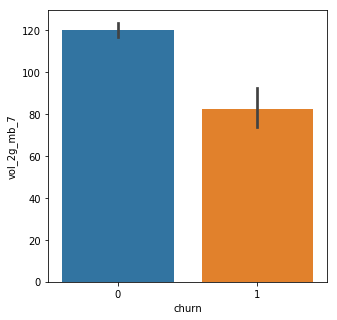

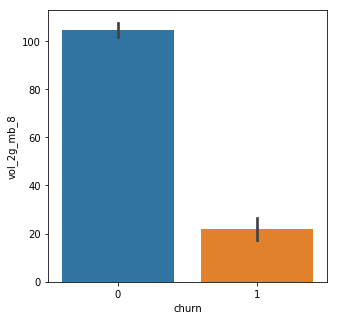

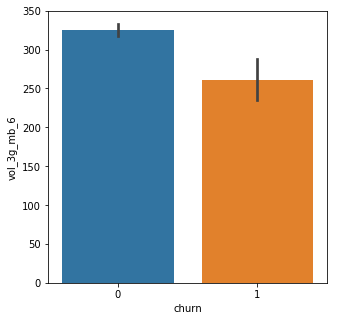

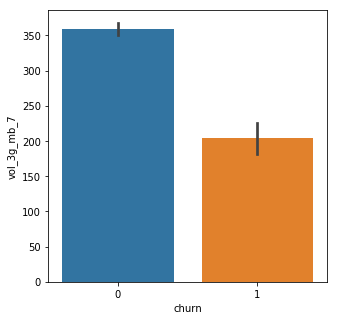

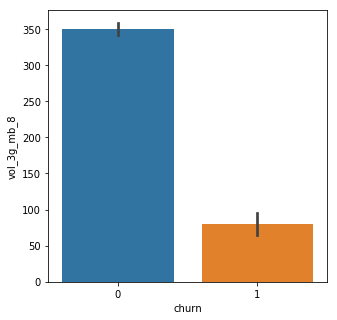

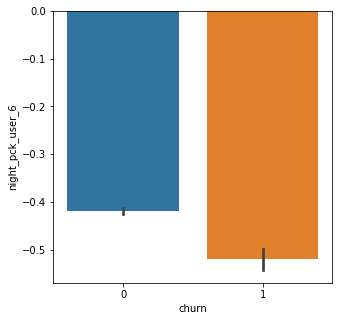

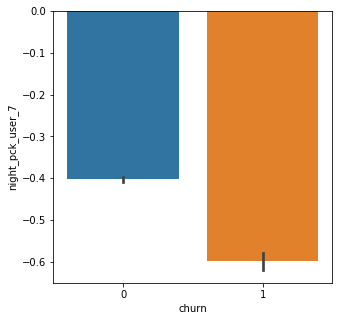

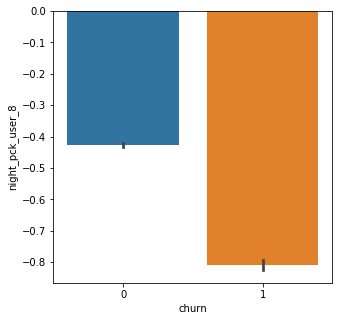

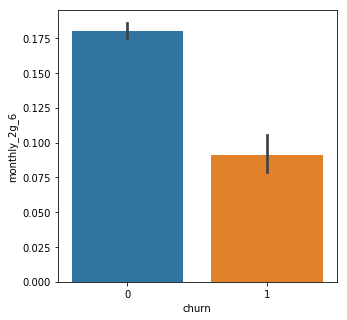

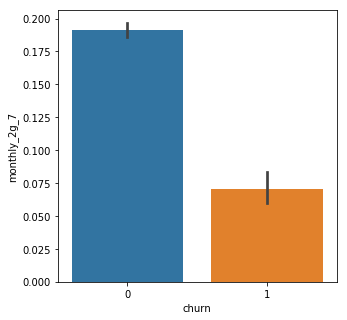

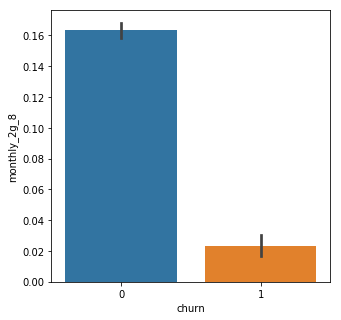

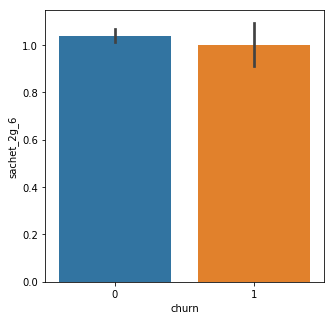

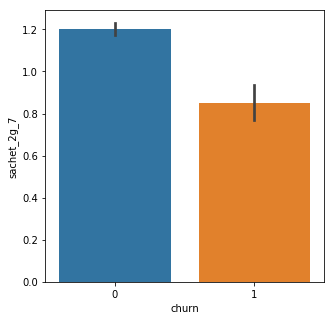

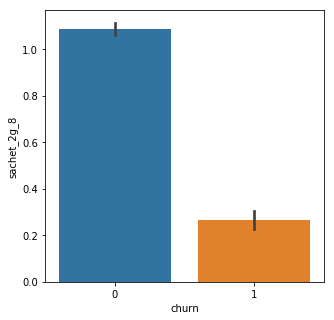

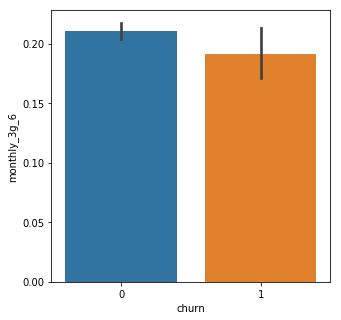

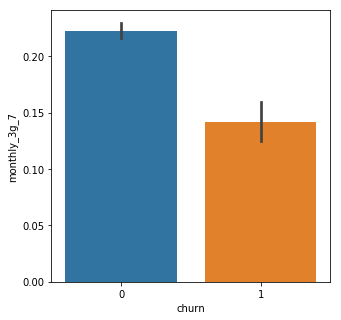

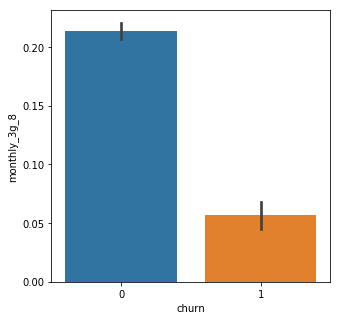

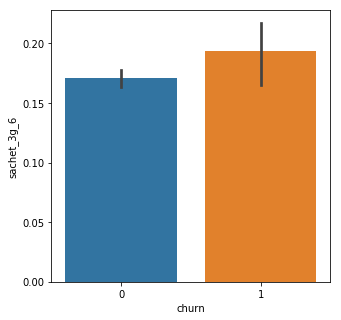

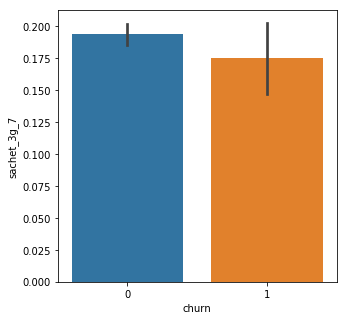

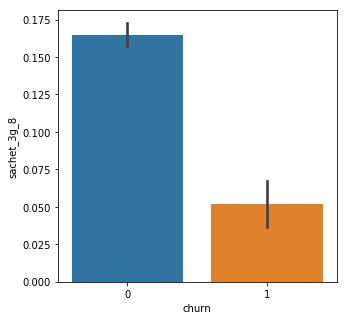

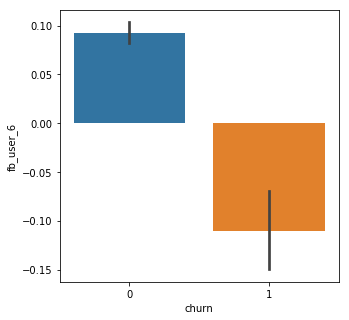

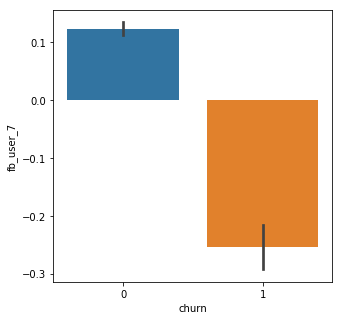

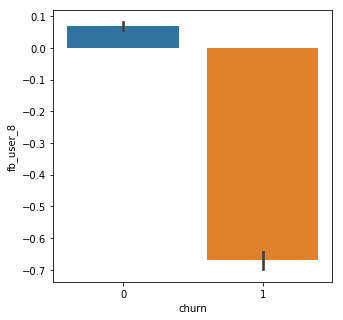

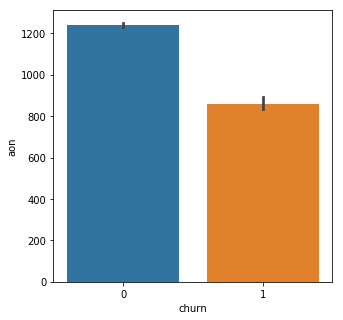

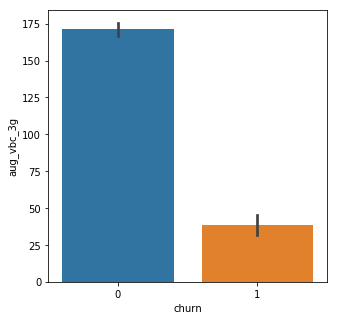

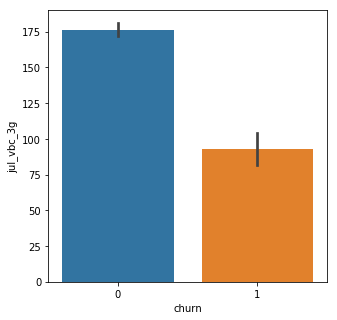

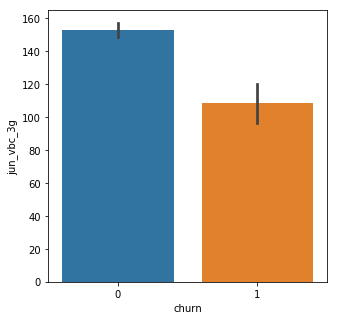

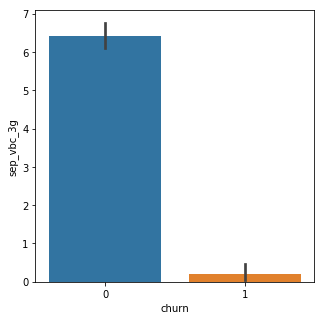

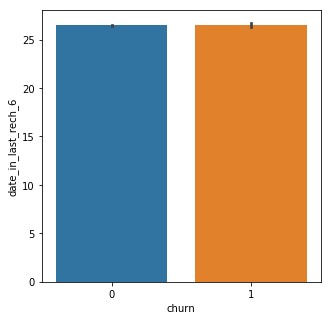

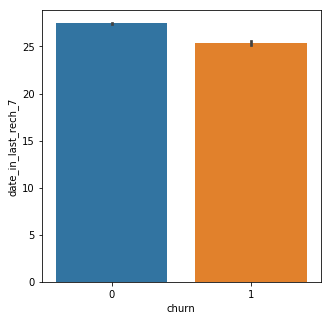

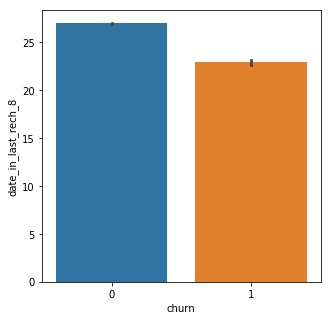

<Figure size 432x288 with 0 Axes>

In [102]:
for col in cols:
    plt.figure(figsize=(5, 5))
    sns.barplot(x='churn', y=col, data=churned_df);
    plt.show()
plt.tight_layout()

## Inferences from the above bar plots (focused on churned case):
* People who are making calls on the same network/different network are likely to get churned. Possible reason could be the network quality. However, looks like the churned rate got decrease in August month.
* Customer with internation roaming are in churned category. May be the internation plans are not good.
* Customer getting lots of incoming calls (outgoing calls are in negative for July month which means incoming calls) are likely to get churned.
* Customers making more outgoing STD calls are in churned category. Possible reason could be the STD plans are not good.
* Customers making more outgoing ISD calls are in churned category. Possible reason could be the ISD plans are not good.
* Customers getting more incoming calls from the same/different network are also considers to be in churned category.
* People making more special calls are expect to be in churned category. Possible reason could be the prices are not attractive.
* It can be seen, the churned counts were more for June and July month and it got decrease for August month for many attributes. Which signifies, T has improved their services in August month.
* For June, Customer with more total recharge amount are considered to be churned.
* Non-Night pack user are expected to get churned.
* Non-Facebook users are expected to get churned.

Now we will group the **Churners and Non Churners** to find the Average Value of the rechrage amount in both the cases

In [63]:
churners = churned_df.groupby('churn').get_group(1)
non_churners = churned_df.groupby('churn').get_group(0)

In [64]:
churners.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0    197.385   214.816   213.803   -44.767756   -16.927672     0.000000   
1   1069.180  1349.850  1986.622    57.840000    54.680000    52.290000   
13   218.818   386.515   386.502     0.000000     0.000000     0.000000   
17   319.700    56.080     1.030   141.760000    11.230000     0.000000   
27   596.301   146.073     0.000    55.190000     3.260000   -43.470899   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0     186.583454    174.639867      0.000000        31.6895      22.344051   
1     453.430000    567.160000    325.910000        16.2300      33.490000   
13      0.000000      0.000000      0.000000         0.0000       0.000000   
17    182.760000     32.790000      1.710000         0.0000      14.560000   
27     45.510000     12.340000    173.960423         0.0000       0.000000   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0        0.000000      13.464656       5.109151       0.000000   
1       31.640000      23.740000      12.590000      38.060000   
13       0.000000       0.000000       0.000000       0.000000   
17       0.000000       0.000000       2.260000       1.710000   
27      35.283877       0.000000       0.000000       6.734826   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0          40.717924         26.941959          0.000000         93.341961   
1          51.390000         31.380000         40.280000        308.630000   
13          0.000000          0.000000          0.000000          0.000000   
17         52.540000         10.630000          0.000000          7.540000   
27         55.190000          3.260000         29.163433         43.830000   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0          91.392588           0.00000          3.749018          3.790855   
1         447.380000         162.28000         62.130000         55.140000   
13          0.000000           0.00000          0.000000          0.000000   
17         14.700000           0.00000          2.130000          3.330000   
27         12.340000          91.75326          0.000000          0.000000   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0           0.000000         -7.792759        -14.312322          0.000000   
1          53.230000          0.000000          0.000000          0.000000   
13          0.000000          0.000000          0.000000          0.000000   
17          0.000000          0.000000          0.000000          0.000000   
27          3.676221          0.000000          0.000000        -11.863182   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0       4.922438    -12.813585       0.00000         91.812845   
1     422.160000    533.910000     255.79000          4.300000   
13      0.000000      0.000000       0.00000          0.000000   
17     62.230000     28.660000       0.00000         89.210000   
27     99.030000     15.610000     -20.20652          0.000000   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0          93.341836          0.000000         87.303734         90.800662   
1          23.290000         12.010000         49.890000         31.760000   
13          0.000000          0.000000          0.000000          0.000000   
17          0.000000          0.000000        173.080000         13.100000   
27          0.000000         92.664428          0.000000          0.000000   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0           0.000000          1.120835          1.124395           0.00000   
1          49.140000          6.660000         20.080000          16.68000   
13          0.000000          0.000000          0.000000           0.00000   
17          0.000000          0.000000          0.000000           0.00000   
27         89.824025      

In [65]:
print('Average recharge amount for Churners in Month of June: ' , round(churners.total_rech_amt_6.mean(),2))
print('Average recharge amount for Churners in Month of July: ' , round(churners.total_rech_amt_7.mean(),2))
print('Average recharge amount for Churners in Month of August: ' , round(churners.total_rech_amt_8.mean(),2))

Average recharge amount for Churners in Month of June:  759.24
Average recharge amount for Churners in Month of July:  608.3
Average recharge amount for Churners in Month of August:  246.35


In [66]:
print('Average recharge amount for Non - Churners in Month of June: ' , round(non_churners.total_rech_amt_6.mean(),2))
print('Average recharge amount for Non - Churners in Month of July: ' , round(non_churners.total_rech_amt_7.mean(),2))
print('Average recharge amount for Non - Churners in Month of August: ' , round(non_churners.total_rech_amt_8.mean(),2))

Average recharge amount for Non - Churners in Month of June:  638.58
Average recharge amount for Non - Churners in Month of July:  651.97
Average recharge amount for Non - Churners in Month of August:  600.24


So we can see that:  
1. Average Recharge for a Churner Continuously drops as the time passes by.
2. Average Recharge amount of a Non Churner stays in the competition and in that bracket of between 600 to 650/-

Let's plot it!

In [67]:
df_average_amt_churn_non_churn = pd.DataFrame({'Month':['June','July','August'],
                                              'Average_Amount_Churn':[round(churners.total_rech_amt_6.mean(),2),
                                                                      round(churners.total_rech_amt_7.mean(),2),
                                                                      round(churners.total_rech_amt_8.mean(),2)],
                                             'Average_Amount_Non_Churn':[round(non_churners.total_rech_amt_6.mean(),2),
                                                                        round(non_churners.total_rech_amt_7.mean(),2),
                                                                        round(non_churners.total_rech_amt_8.mean(),2)]})

In [68]:
df_average_amt_churn_non_churn

Month  Average_Amount_Churn  Average_Amount_Non_Churn
0    June                759.24                    638.58
1    July                608.30                    651.97
2  August                246.35                    600.24

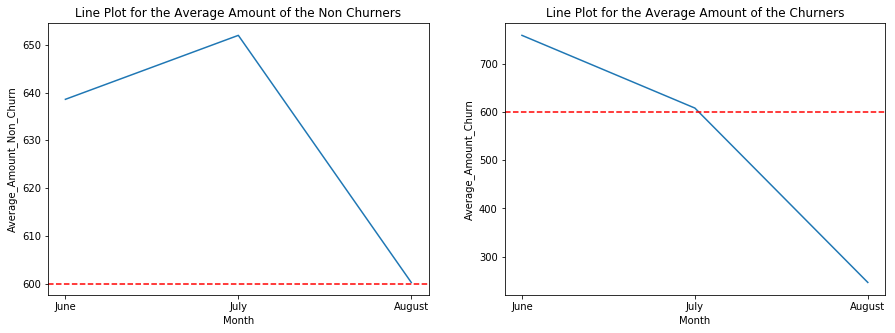

In [69]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Line Plot for the Average Amount of the Non Churners');
sns.lineplot(x = 'Month',y='Average_Amount_Non_Churn',data = df_average_amt_churn_non_churn,sort=False);
plt.axhline(y=600,color = 'r',linestyle = '--');
plt.subplot(1,2,2)
plt.title('Line Plot for the Average Amount of the Churners');
sns.lineplot(x = 'Month',y='Average_Amount_Churn',data = df_average_amt_churn_non_churn,sort=False);
plt.axhline(y=600,color = 'r',linestyle = '--');

**So we get to see that for the Churners, the amount keeps on decreasing for the CHURNERS!**

# Modelling!

Roadmap:  
1. Split the Data into 70/30 ration of Train and Test Set respectively.
2. Scale the trained and test set for modelling.
3. Apply **Logistic Regression** at first and then Check for the **Sensitivity** via **Confusion Matrix**.
4. Apply **Lasso Regression** to get the top 10 and bottom 10 variables influencing the **Churn**.
5. Apply **Random Forest** as Ensemble Model followed by **XGBoost** model and evaluate their performance.
6. Map the **Predicted Churners** to the **Filtered Churners** and try to see the difference.

In [70]:
data_frame(churned_df)

Missing Value Count  % of Missing    DTYPE
arpu_6                                 0           0.0  float64
arpu_7                                 0           0.0  float64
total_rech_num_8                       0           0.0  float64
total_rech_amt_6                       0           0.0  float64
total_rech_amt_7                       0           0.0  float64
total_rech_amt_8                       0           0.0  float64
max_rech_amt_6                         0           0.0  float64
max_rech_amt_7                         0           0.0  float64
max_rech_amt_8                         0           0.0  float64
last_day_rch_amt_6                     0           0.0  float64
last_day_rch_amt_7                     0           0.0  float64
last_day_rch_amt_8                     0           0.0  float64
total_rech_data_6                      0           0.0  float64
total_rech_data_7                      0           0.0  float64
total_rech_data_8                      0           0.0  float64
max_rech_data_6                        0           0.0  float64
max_rech_data_7                        0           0.0  float64
total_rech_num_7                       0           0.0  float64
total_rech_num_6                       0           0.0  float64
ic_others_8                            0           0.0  float64
total_ic_mou_8                         0           0.0  float64
std_ic_t2f_mou_8                       0           0.0  float64
std_ic_mou_6                           0           0.0  float64
std_ic_mou_7                           0           0.0  float64
std_ic_mou_8                           0           0.0  float64
total_ic_mou_6                         0           0.0  float64
total_ic_mou_7                         0           0.0  float64
spl_ic_mou_6                           0           0.0  float64
ic_others_7                            0           0.0  float64
spl_ic_mou_7                           0           0.0  float64
spl_ic_mou_8                           0           0.0  float64
isd_ic_mou_6                           0           0.0  float64
isd_ic_mou_7                           0           0.0  float64
isd_ic_mou_8                           0           0.0  float64
ic_others_6                            0           0.0  float64
max_rech_data_8                        0           0.0  float64
av_rech_amt_data_6                     0           0.0  float64
av_rech_amt_data_7                     0           0.0  float64
aon                                    0           0.0  float64
sachet_3g_6                            0           0.0  float64
sachet_3g_7                            0           0.0  float64
sachet_3g_8                            0           0.0  float64
fb_user_6                              0           0.0  float64
fb_user_7                              0           0.0  float64
fb_user_8                              0           0.0  float64
aug_vbc_3g                             0           0.0  float64
monthly_3g_7                           0           0.0  float64
jul_vbc_3g                             0           0.0  float64
jun_vbc_3g                             0           0.0  float64
sep_vbc_3g                             0           0.0  float64
date_in_last_rech_6                    0           0.0  float64
date_in_last_rech_7                    0           0.0  float64
date_in_last_rech_8                    0           0.0  float64
monthly_3g_8                           0           0.0  float64
monthly_3g_6                           0           0.0  float64
av_rech_amt_data_8                     0           0.0  float64
night_pck_user_6                       0           0.0  float64
vol_2g_mb_6                            0           0.0  float64
vol_2g_mb_7                            0           0.0  float64
vol_2g_mb_8                            0           0.0  float64
vol_3g_mb_6                            0           0.0  float64
vol_3g_mb_7                            0           0.

In [88]:
churned_df.shape

(30001, 144)

In [103]:
churned_df.describe()

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000   
mean     548.809784    551.084737    498.243103    251.369007    258.342103   
std      358.130151    360.433210    383.295094    404.051147    418.347008   
min        1.000000      0.700000      0.000000    -44.767756    -16.927672   
25%      309.865000    309.826000    231.473000     17.090000     16.040000   
50%      481.694000    480.943000    427.585000     84.580000     82.810000   
75%      699.943000    698.315000    661.491000    290.440000    290.240000   
max     1985.115000   1999.500000   1986.622000   2151.740000   2201.960000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  30001.000000  30001.000000  30001.000000  30001.000000   30001.000000   
mean     223.242970    369.280947    372.646629    331.847615      14.162592   
std      391.892775    432.054932    441.914843    405.722348      49.419509   
min      -43.470899      0.000000      0.000000      0.000000       0.000000   
25%       10.410000     80.710000     78.540000     63.190000       0.000000   
50%       65.610000    222.540000    220.030000    182.830000       0.000000   
75%      239.960000    487.940000    494.010000    438.890000       0.000000   
max     2159.110000   2326.360000   2410.890000   2193.130000     342.440000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   30001.000000   30001.000000   30001.000000   30001.000000   
mean       10.031746      11.309544      22.977748      16.781030   
std        38.885781      39.602481      79.262782      62.842303   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max       281.990000     283.710000     530.710000     438.590000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   30001.000000      30001.000000      30001.000000       30001.00000   
mean       16.265239         77.016376         77.166481          70.87260   
std        60.434421        149.612296        150.622164         136.33081   
min         0.000000          0.000000          0.000000           0.00000   
25%         0.000000          5.240000          5.530000           4.36000   
50%         0.000000         26.760000         26.910000          25.76000   
75%         0.000000         77.980000         78.340000          72.04000   
max       427.030000       1006.360000       1018.530000         913.33000   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count      30001.000000      30001.000000      30001.000000      30001.000000   
mean         159.361240        159.839130        150.895889          5.711316   
std          211.668912        208.710609        202.202729         13.727024   
min            0.000000          0.000000          0.000000          0.000000   
25%           21.840000         23.680000         19.090000          0.000000   
50%           83.190000         84.510000         81.560000          0.230000   
75%          208.930000        208.410000        196.960000          4.230000   
max         1136.960000       1111.480000       1088.310000         87.640000   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
count      30001.000000      30001.000000      30001.000000      30001.000000   
mean           5.799483          5.429622          1.226348          1.326492   
std           13.805762         12.939749          4.169300          4.951323   
min            0.000000          0.000000         -7.792759        -14.312322   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.280000          0.2800

#### Looking at the Correlation Matrix!

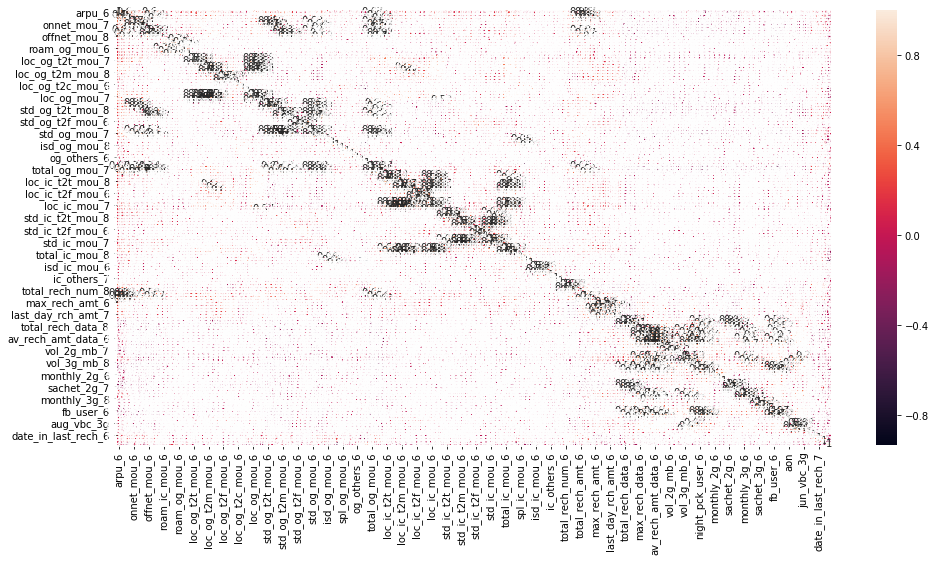

In [73]:
plt.figure(figsize=(16,8))
sns.heatmap(churned_df.corr(),annot=True);

Does this explains anything? Being this much big Matrix with color, now is the time to Start Modelling!

In [104]:
churned_df.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   197.385   214.816   213.803   -44.767756   -16.927672         0.00   
1  1069.180  1349.850  1986.622    57.840000    54.680000        52.29   
2   378.721   492.223   137.362   413.690000   351.030000        35.08   
3   514.453   597.753   637.760   102.410000   132.110000        85.14   
4    74.350   193.897   366.966    48.960000    50.660000        33.58   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0    186.583454    174.639867          0.00        31.6895      22.344051   
1    453.430000    567.160000        325.91        16.2300      33.490000   
2     94.660000     80.630000        136.48         0.0000       0.000000   
3    757.930000    896.680000        983.39         0.0000       0.000000   
4     85.410000     89.360000        205.89         0.0000       0.000000   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00      13.464656       5.109151           0.00   
1          31.64      23.740000      12.590000          38.06   
2           0.00       0.000000       0.000000           0.00   
3           0.00       0.000000       0.000000           0.00   
4           0.00       0.000000       0.000000           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0         40.717924         26.941959              0.00         93.341961   
1         51.390000         31.380000             40.28        308.630000   
2        297.130000        217.590000             12.49         80.960000   
3          4.480000          6.160000             23.34         91.810000   
4         48.960000         50.660000             33.58         82.940000   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0         91.392588              0.00          3.749018          3.790855   
1        447.380000            162.28         62.130000         55.140000   
2         70.580000             50.54          0.000000          0.000000   
3         87.930000            104.81          0.750000          0.000000   
4         83.010000            148.56          0.000000          0.000000   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00         -7.792759        -14.312322              0.00   
1             53.23          0.000000          0.000000              0.00   
2              0.00          0.000000          0.000000              7.15   
3              1.58          0.000000          0.000000              0.00   
4              0.00          0.000000          0.000000             17.71   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0      4.922438    -12.813585          0.00         91.812845   
1    422.160000    533.910000        255.79          4.300000   
2    378.090000    288.180000         63.04        116.560000   
3     97.040000     94.090000        129.74         97.930000   
4    131.910000    133.680000        182.14          0.000000   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0         93.341836              0.00         87.303734         90.800662   
1         23.290000             12.01         49.890000         31.760000   
2        133.430000             22.58         13.690000         10.040000   
3        125.940000             61.79        665.360000        808.740000   
4          0.000000              0.00          2.360000          6.350000   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0              0.00          1.120835          1.124395              0.00   
1             49.14          6.660000         20.080000             16.68   
2             75.69          0.000000          0.000000              0.00   
3            876.99          0.000000          0.000000              0.00   
4             39.61          0.000000          0.000000              0.00   



In [106]:
# divide data into train and test
X = churned_df.drop("churn", axis = 1)
y = churned_df['churn']

#Scaling

def normalize(x):
    return((x-np.min(x))/(max(x) - min(x)))
                                                                                          

X = X.apply(normalize)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size=0.3,random_state=100)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (21000, 143)
Number transactions y_train dataset:  (21000,)
Number transactions X_test dataset:  (9001, 143)
Number transactions y_test dataset:  (9001,)


We see that due to addition of **-1** to columns of night packs and FB user, we need to manually rectify it by using the **MEAN** for each of the category.

In [107]:
train = pd.concat([X_train, y_train], axis=1)

# aggregate the categorical variables
print(train.groupby('night_pck_user_6').churn.mean())
print(train.groupby('night_pck_user_7').churn.mean())
print(train.groupby('night_pck_user_8').churn.mean())
print(train.groupby('fb_user_6').churn.mean())
print(train.groupby('fb_user_7').churn.mean())
print(train.groupby('fb_user_8').churn.mean())

night_pck_user_6
0.0    0.097337
0.5    0.066789
1.0    0.088136
Name: churn, dtype: float64
night_pck_user_7
0.0    0.113402
0.5    0.055655
1.0    0.060284
Name: churn, dtype: float64
night_pck_user_8
0.0    0.140112
0.5    0.028431
1.0    0.033195
Name: churn, dtype: float64
fb_user_6
0.0    0.097337
0.5    0.080702
1.0    0.066276
Name: churn, dtype: float64
fb_user_7
0.0    0.113402
0.5    0.064103
1.0    0.055058
Name: churn, dtype: float64
fb_user_8
0.0    0.140112
0.5    0.062943
1.0    0.024685
Name: churn, dtype: float64


**Initially we filled it one, but since there is no variation and later they show BOOLEAN Behvaiour, hence we would replace all -1's with 0**

In [108]:
# replace categories with aggregated values in each categorical column
mapping = {'night_pck_user_6' : {-1: 0.0},
           'night_pck_user_7' : {-1: 0.0},
           'night_pck_user_8' : {-1: 0.0},
           'fb_user_6'        : {-1: 0.0},
           'fb_user_7'        : {-1: 0.0},
           'fb_user_8'        : {-1: 0.0}
          }
X_train.replace(mapping, inplace = True)
X_test.replace(mapping, inplace = True)

## PCA
Seems There is a class imbalance in curn event rate 
1. We can add **class_weight = 'balanced'** to maintain the balance in class!
2. Lets do PCA

In [109]:
pca = PCA(svd_solver='randomized' , random_state=42)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [110]:
print(pca.components_)

[[ 5.60418502e-02  5.67309852e-02  4.25818190e-02 ...  5.02126851e-02
   3.38799041e-02  2.31841414e-02]
 [ 1.31787225e-01  1.46555764e-01  1.72989036e-01 ...  1.08275909e-02
   2.76063996e-02  2.62055676e-02]
 [ 7.66040314e-02  1.27664493e-01  1.39835848e-01 ...  1.09090108e-01
   1.29712479e-01  1.27652155e-01]
 ...
 [-2.86362813e-03  5.66980041e-03  2.86171550e-03 ...  3.08462705e-04
  -4.29868128e-04  1.39999708e-04]
 [ 1.51703521e-03 -1.52444169e-03 -4.99742605e-03 ... -8.20476670e-05
  -1.88365398e-04  2.78403749e-04]
 [ 1.60456080e-03  1.04224215e-04  2.98652395e-03 ... -6.60310245e-05
  -1.84522703e-06  9.07738236e-05]]


Create a short Data Frame for the PC's created!

In [111]:
colnames = list(X_train.columns)
pca_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 
                       'PC3':pca.components_[2],'PC4':pca.components_[3],
                       'PC5':pca.components_[4],'PC6':pca.components_[5],
                       'PC7':pca.components_[6],'PC8':pca.components_[7],
                       'PC9':pca.components_[8],'PC10':pca.components_[9],
                       'PC11':pca.components_[10],'PC12':pca.components_[11],'PC13':pca.components_[12],
                       'PC14':pca.components_[13],'PC15':pca.components_[14],'PC16':pca.components_[15],
                       'Feature':colnames})
pca_df.head(10)

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.056042  0.131787  0.076604  0.069719  0.132010 -0.053929 -0.062966   
1  0.056731  0.146556  0.127664  0.068704 -0.011507 -0.021481 -0.054273   
2  0.042582  0.172989  0.139836  0.056444 -0.080540 -0.028068 -0.057209   
3  0.076625  0.028169  0.117793  0.023348  0.083103 -0.139905  0.242984   
4  0.081273  0.034459  0.151099  0.025496  0.038250 -0.138335  0.268470   
5  0.068367  0.047693  0.147712  0.017376  0.003204 -0.118437  0.232852   
6  0.082207  0.096515  0.073935  0.006717  0.084214  0.048689 -0.203714   
7  0.084156  0.101198  0.106087  0.010637  0.021549  0.077430 -0.205221   
8  0.074082  0.117309  0.106791  0.005747 -0.003415  0.065125 -0.188119   
9  0.010116  0.010327  0.002511  0.032960 -0.018001  0.060436 -0.022180   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -0.004447 -0.070936 -0.011496  0.003382 -0.246713  0.023205 -0.110700   
1  0.002562  0.068643 -0.073213  0.064400 -0.035973  0.059592 -0.110456   
2 -0.008457 -0.046106 -0.053525  0.103928  0.128319  0.095722 -0.116639   
3 -0.097549  0.002334  0.060113  0.037117 -0.169698 -0.012915  0.038494   
4 -0.099901  0.034866  0.035784  0.083270  0.003794  0.012411  0.038929   
5 -0.078472  0.012092  0.015128  0.107601  0.110808  0.038029  0.030635   
6  0.177720 -0.005275  0.064296 -0.060003 -0.179979 -0.064951  0.040614   
7  0.200631  0.033566  0.023729 -0.011842  0.034249 -0.031562  0.050397   
8  0.182289  0.017338  0.015904  0.042720  0.159178  0.013434  0.029867   
9 -0.032215 -0.016689 -0.016580  0.089465 -0.014853  0.213290 -0.106953   

       PC15      PC16        Feature  
0  0.030715 -0.006951         arpu_6  
1  0.024844  0.020235         arpu_7  
2 -0.013461  0.030701         arpu_8  
3  0.033206 -0.018686    onnet_mou_6  
4  0.012117 -0.000281    onnet_mou_7  
5 -0.002107  0.003556    onnet_mou_8  
6  0.052715 -0.032657   offnet_mou_6  
7  0.053444 -0.012484   offnet_mou_7  
8  0.008782 -0.012726   offnet_mou_8  
9  0.189659  0.041576  roam_ic_mou_6

In [112]:
# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       21.24
1       31.24
2       38.05
3       43.59
4       46.98
5       49.95
6       52.82
7       55.46
8       57.84
9       60.17
10      62.28
11      64.09
12      65.79
13      67.33
14      68.77
15      70.01
16      71.24
17      72.44
18      73.51
19      74.55
20      75.54
21      76.45
22      77.35
23      78.20
24      78.99
25      79.76
26      80.46
27      81.14
28      81.81
29      82.42
30      83.03
31      83.60
32      84.16
33      84.73
34      85.26
35      85.76
36      86.24
37      86.71
38      87.16
39      87.60
40      88.03
41      88.45
42      88.86
43      89.26
44      89.66
45      90.04
46      90.40
47      90.75
48      91.09
49      91.42
50      91.74
51      92.05
52      92.36
53      92.65
54      92.93
55      93.18
56      93.42
57      93.65
58      93.88
59      94.10
60      94.30
61      94.51
62      94.70
63      94.89
64      95.08
65      95.26
66      95.44
67      95.61
68      95.78
69      95.94
70      96.10
71    

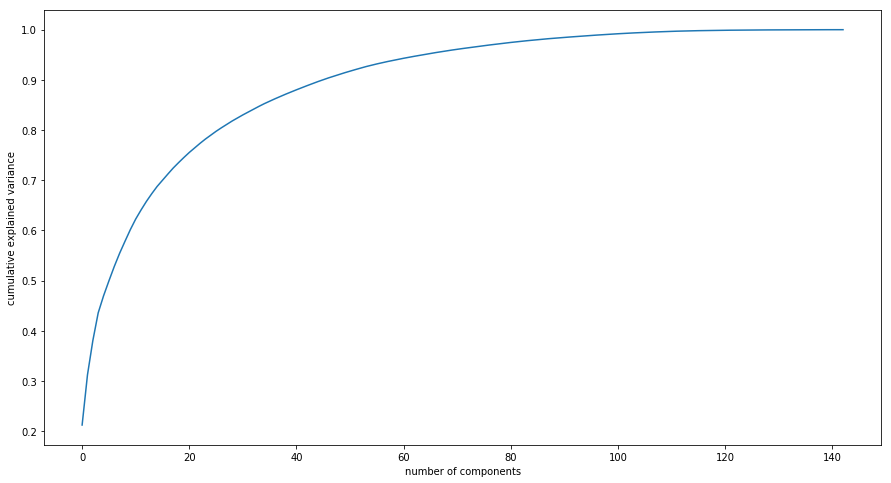

In [113]:
%matplotlib inline
fig = plt.figure(figsize = (15,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

We can see that **95%** of variance is explained by **more than 50 PC's**!

In [136]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=50)

df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(21000, 50)

In [137]:
#Applying selected components to the test data - 12 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(9001, 50)

In [138]:
learner_pca = LogisticRegression(class_weight='balanced')
model_pca = learner_pca.fit(df_train_pca,y_train)

In [139]:
from sklearn import metrics
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.91'

Making prediction on the test data

In [140]:
pred_test = model_pca.predict_proba(df_test_pca)
y_pred_default = model_pca.predict(df_test_pca)

In [141]:
print(confusion_matrix(y_test,y_pred_default))
print(metrics.accuracy_score(y_test,y_pred_default))

[[7086 1165]
 [ 126  624]]
0.8565714920564381


In [142]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_test)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})

In [143]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC score: ',roc_auc)

ROC_AUC score:  0.9091090372884095


In [144]:
#ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

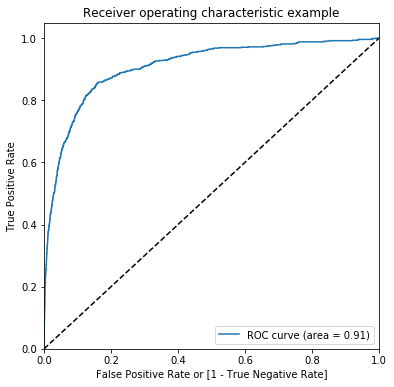

(array([0.        , 0.        , 0.        , ..., 0.99975761, 0.9998788 ,
        1.        ]),
 array([0.        , 0.00133333, 0.00266667, ..., 1.        , 1.        ,
        1.        ]),
 array([1.99954266e+00, 9.99542664e-01, 9.99481347e-01, ...,
        5.98726949e-05, 4.15775593e-05, 2.45259425e-05]))

In [145]:
draw_roc(y_pred_final.churn, y_pred_final.churn_prob)

In [146]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

churn  churn_prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0      1    0.849379    1    1    1    1    1    1    1    1    1    0
1      1    0.381106    1    1    1    1    0    0    0    0    0    0
2      0    0.097205    1    0    0    0    0    0    0    0    0    0
3      0    0.252492    1    1    1    0    0    0    0    0    0    0
4      1    0.802313    1    1    1    1    1    1    1    1    1    0

In [147]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.083324  0.000000  1.000000
0.1   0.1  0.437063  0.388438  0.972000
0.2   0.2  0.620487  0.591080  0.944000
0.3   0.3  0.729808  0.714338  0.900000
0.4   0.4  0.807799  0.802085  0.870667
0.5   0.5  0.856571  0.858805  0.832000
0.6   0.6  0.889123  0.900618  0.762667
0.7   0.7  0.909455  0.930311  0.680000
0.8   0.8  0.926453  0.957096  0.589333
0.9   0.9  0.934452  0.978912  0.445333


In [148]:
## Finidng the optimal cutoff
import sys
def Find_Optimal_Cutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.ix[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])

# Find optimal probability threshold
threshold = Find_Optimal_Cutoff(y_pred_final.churn,y_pred_final.churn_prob)
print('Threshold: ',threshold)

Threshold:  [0.47669780105151277]


In [149]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.49 else 0
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.47 else 0)

y_pred_final.churn.value_counts()

0    8251
1     750
Name: churn, dtype: int64

In [150]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.pred_churn )
confusion

array([[6955, 1296],
       [ 111,  639]], dtype=int64)

In [151]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy Score on test data: ', metrics.accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score on test data:  0.8565714920564381
Sensitivity:  0.852
Specificity:  0.8429281299236456
false postive rate:  0.15707187007635437
positive predictive value:  0.3302325581395349
Negative predictive value:  0.9842909708463062
Misclassification Rate:  0.15631596489278968


So, fitting the **Logistic Regression** model gives us:
* Train Accuracy = 88% but Test Accuracy = 85%. Now this model is overfitted at once it seems.
* The main thing is that we are looking **for Sensitivity** and **Specificity** as our evaluation metrics. Which is very close approx **85%** each!
* Also, the rate of Predcition the correct churners not being churned out is approx 98%. Ok!, so now this means that 97% is the rate of predicting the **correct non churning connections in the month of September** from the Logistic Reg Model.
* So the power of identifying correct predictive value is 33%, which is quite too low!. So we hustle more!

## Random Forest with PCA

So we got 18 PCA features. Let's try to build Random Forest with these features.

In [152]:
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')

# fit
rfc.fit(df_train_pca,y_train)

# Making predictions
y_pred_default = rfc.predict(df_test_pca)

In [153]:
#Confusion matrix

confusion_rf=confusion_matrix(y_test,y_pred_default)
confusion_rf

array([[8201,   50],
       [ 537,  213]], dtype=int64)

In [154]:
TN = confusion_rf[0,0] # true positive 
TP = confusion_rf[1,1] # true negatives
FP = confusion_rf[0,1] # false positives
FN = confusion_rf[1,0] # false negatives

# Let's see the sensitivity of our model
print('Sensitivity: ', round(TP / float(TP+FN),2))

# Let us calculate specificity
print('Specificity: ',round(TN / float(TN+FP),2))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',round(FP/ float(TN+FP),2))

# positive predictive value 
print('positive predictive value: ', round(TP / float(TP+FP),2))

# Negative predictive value
print('Negative predictive value: ',round(TN / float(TN+ FN),2))

## Misclassification rate

print('Misclassification Rate: ',round((FN+FP)/(TP+TN+FP+FN),2))

Sensitivity:  0.28
Specificity:  0.99
false postive rate:  0.01
positive predictive value:  0.81
Negative predictive value:  0.94
Misclassification Rate:  0.07


Sensitivity means the ratio of churned customers identified correctly by the model.
So, we want our `Sensitivity` scores to get better. Hyperparameter tuning can help us in this.

We are also, concerned about the accuracy.

### Hyperparameter tuning:

In [155]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# we are using 5 k-folds
n_folds = 5
# setting up the parameters to build the model
parameters = {'max_depth': range(2, 20, 5)}

rf_with_pca = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf_with_pca = GridSearchCV(rf_with_pca, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1, return_train_score=True)
rf_with_pca.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [156]:
# Let's see the scores of GridSearch
scores = rf_with_pca.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       6.058720      0.094792         0.093346        0.022138   
1      16.348616      0.231411         0.104541        0.008010   
2      25.186546      0.705723         0.147915        0.012594   
3      24.966872      1.498743         0.137122        0.014461   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               2   {'max_depth': 2}           0.871905           0.852619   
1               7   {'max_depth': 7}           0.896905           0.892143   
2              12  {'max_depth': 12}           0.933095           0.925000   
3              17  {'max_depth': 17}           0.936667           0.930238   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.855952           0.855238           0.838571         0.854857   
1           0.897143           0.898095           0.889286         0.894714   
2           0.932857           0.934524           0.928333         0.930762   
3           0.933571           0.940952           0.932381         0.934762   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.010604                4            0.867619            0.867202   
1        0.003412                3            0.915655            0.915357   
2        0.003552                2            0.978333            0.977440   
3        0.003728                1            0.994286            0.993393   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.864464            0.852679            0.844762   
1            0.913512            0.913750            0.908929   
2            0.977381            0.975536            0.976012   
3            0.993095            0.991548            0.992738   

   mean_train_score  std_train_score  
0          0.859345         0.009094  
1          0.913440         0.002410  
2          0.976940         0.001022  
3          0.993012         0.000894

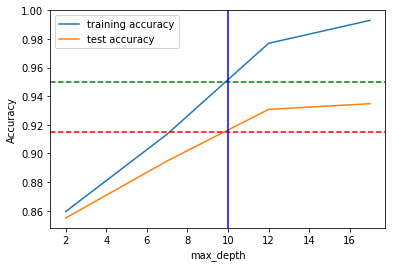

In [163]:
# For visualiation of the accuracies with max_depth
plt.figure()

plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")


plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")

#Our brack of Accuracies
plt.axhline(y=0.915, linestyle='--', color='r')
plt.axhline(y=0.95, linestyle='--', color='g')
plt.axvline(x=10, linestyle='-', color='b')
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


We can set the `max_depth` of the random forest to 10 or 12 as we are getting good accuracy for test and train set

Similarly we can tune the n_estimator (number of tress in the random forest)

In [164]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#setting 5 k-fold
n_folds = 5


parameters = {'n_estimators': range(100, 1500, 400)}

# We will use max_depth = 10 from our last tuning.
rf = RandomForestClassifier(max_depth=10, class_weight='balanced')



rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1, return_train_score=True)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=10,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              r

In [165]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      21.275590      0.298796         0.132525        0.008542   
1     109.517356      3.298536         0.796543        0.086565   
2     193.823580      4.309331         1.113561        0.021671   
3     261.463768     29.643034         1.537318        0.420855   

  param_n_estimators                  params  split0_test_score  \
0                100   {'n_estimators': 100}           0.925714   
1                500   {'n_estimators': 500}           0.925714   
2                900   {'n_estimators': 900}           0.926190   
3               1300  {'n_estimators': 1300}           0.924762   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.915476           0.924048           0.924048           0.921429   
1           0.915000           0.927381           0.929524           0.922619   
2           0.917857           0.926905           0.928810           0.922857   
3           0.918810           0.926905           0.929048           0.922857   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.922143        0.003605                4            0.959107   
1         0.924048        0.005055                3            0.962500   
2         0.924524        0.003848                1            0.962440   
3         0.924476        0.003510                2            0.962262   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.960893            0.958690            0.957679   
1            0.963274            0.960952            0.959583   
2            0.964286            0.960893            0.959524   
3            0.963750            0.961548            0.959643   

   split4_train_score  mean_train_score  std_train_score  
0            0.959048          0.959083         0.001040  
1            0.961786          0.961619         0.001275  
2            0.962024          0.961833         0.001590  
3            0.961905          0.961821         0.001322

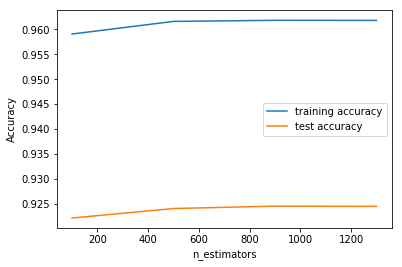

In [166]:
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Considering the accuracies for Training and Test. We can also tune `n_estimators` 300 to 500.

In [167]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# 5 k-fold 
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 18]}


rf = RandomForestClassifier(max_depth=10,class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1, return_train_score=True)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=10,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              r

We were getting, value error of max_features where the error was focused that max_features should be in between (0, n_features].

**So the main reason why the error was popping was, because of the dataframe that we were using, the dataframe which is passed to random forest fit, has maximum 50 features. These 50 features came from PCA that we performed in the last blocks and we were passing the max_feature value > 50, which was throwing error.**

In [168]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      16.303443      0.590941         0.160509        0.015670   
1      28.233797      2.551113         0.149915        0.021314   
2      40.811781      0.372021         0.127727        0.014990   
3      48.484577      2.329890         0.094946        0.011672   

  param_max_features                params  split0_test_score  \
0                  4   {'max_features': 4}           0.924762   
1                  8   {'max_features': 8}           0.923810   
2                 14  {'max_features': 14}           0.925476   
3                 18  {'max_features': 18}           0.924762   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.916667           0.926667           0.926667           0.922619   
1           0.919286           0.926667           0.929286           0.921429   
2           0.918810           0.928810           0.923333           0.922857   
3           0.918810           0.924286           0.925476           0.922857   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.923476        0.003718                3            0.961726   
1         0.924095        0.003574                1            0.959940   
2         0.923857        0.003283                2            0.961786   
3         0.923238        0.002374                4            0.961786   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.958452            0.959643            0.957917   
1            0.963810            0.961190            0.959286   
2            0.964107            0.960833            0.958631   
3            0.961964            0.960714            0.959583   

   split4_train_score  mean_train_score  std_train_score  
0            0.959345          0.959417         0.001309  
1            0.959464          0.960738         0.001674  
2            0.962917          0.961655         0.001868  
3            0.961905          0.961190         0.000924

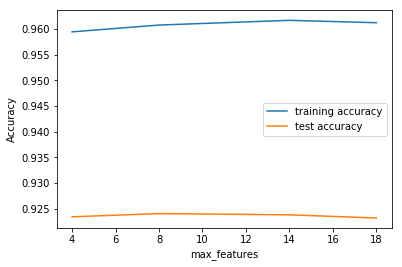

In [169]:
# Visualizing
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

We can set `max_features` to 8 or 10. Let's set it to 8.

Let's now tune `min_sample_leaf`

In [170]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# 5 k-fold
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1, return_train_score=True)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [171]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      18.032451      0.425074         0.127128        0.012489   
1      16.891305      0.487520         0.118933        0.007235   
2      15.222662      0.110676         0.121930        0.015663   
3      14.461502      0.084178         0.113736        0.008080   
4      13.763500      0.293251         0.116735        0.006075   

  param_min_samples_leaf                     params  split0_test_score  \
0                    100  {'min_samples_leaf': 100}           0.878333   
1                    150  {'min_samples_leaf': 150}           0.861905   
2                    200  {'min_samples_leaf': 200}           0.859762   
3                    250  {'min_samples_leaf': 250}           0.850000   
4                    300  {'min_samples_leaf': 300}           0.850000   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.867381           0.870476           0.872619           0.869524   
1           0.852381           0.858333           0.859286           0.860952   
2           0.844048           0.848095           0.850476           0.852857   
3           0.840714           0.845952           0.846667           0.845000   
4           0.829524           0.833095           0.837143           0.839762   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.871667        0.003734                1            0.884345   
1         0.858571        0.003337                2            0.864226   
2         0.851048        0.005239                3            0.862083   
3         0.845667        0.002994                4            0.851905   
4         0.837905        0.006981                5            0.848036   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.888333            0.881012            0.879107   
1            0.873690            0.869167            0.862917   
2            0.858095            0.855060            0.855952   
3            0.858810            0.855298            0.846667   
4            0.843571            0.841369            0.841786   

   split4_train_score  mean_train_score  std_train_score  
0            0.882321          0.883024         0.003157  
1            0.865536          0.867107         0.003896  
2            0.856905          0.857619         0.002449  
3            0.848512          0.852238         0.004418  
4            0.844762          0.843905         0.002401

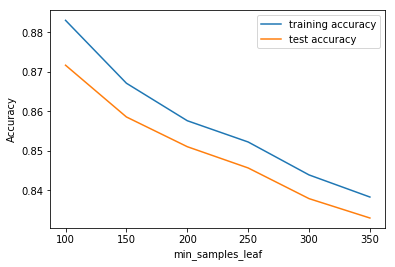

In [172]:
#Visualizing
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

We can see the acuracy decreasing with `min_samples_leaf`, so we can set it to 100.

We will tune `min_samples_split` now

In [173]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [174]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      14.217241      1.845526         0.125329        0.046382   
1      10.900546      0.171818         0.074958        0.002095   
2      13.358535      1.918288         0.107538        0.041384   
3      10.449803      0.120435         0.079359        0.014337   
4      13.419100      2.516921         0.080155        0.015642   

  param_min_samples_split                      params  split0_test_score  \
0                     200  {'min_samples_split': 200}           0.896667   
1                     250  {'min_samples_split': 250}           0.883810   
2                     300  {'min_samples_split': 300}           0.882381   
3                     350  {'min_samples_split': 350}           0.875000   
4                     400  {'min_samples_split': 400}           0.871905   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.883571           0.893095           0.886190           0.889524   
1           0.873571           0.880714           0.885476           0.880952   
2           0.868333           0.875714           0.877619           0.878095   
3           0.869286           0.872619           0.871667           0.870000   
4           0.856667           0.865238           0.865238           0.865714   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.889810        0.004688                1            0.905774   
1         0.880905        0.004078                2            0.893690   
2         0.876429        0.004597                3            0.889107   
3         0.871714        0.002023                4            0.880536   
4         0.864952        0.004852                5            0.877798   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.908988            0.909643            0.902262   
1            0.900298            0.896250            0.896488   
2            0.890060            0.889226            0.887143   
3            0.888214            0.882143            0.880595   
4            0.878988            0.877857            0.872143   

   split4_train_score  mean_train_score  std_train_score  
0            0.906429          0.906619         0.002626  
1            0.894345          0.896214         0.002307  
2            0.889464          0.889000         0.000985  
3            0.878036          0.881905         0.003418  
4            0.871667          0.875690         0.003124

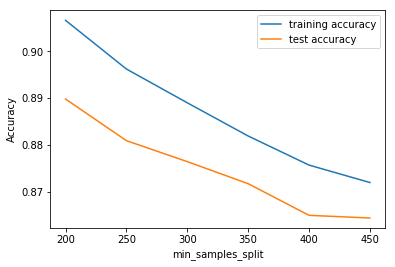

In [175]:
# Visualizing accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


We can set the min_samples_split = 200 considering the acuracy we are getting.

## Tuning Parameters and their values:

#### The below values we got for the features after tuning:
* `max_depth`			10 to 12
* `n_estimators`		300 to 500
* `max_features`		8 to 10
* `min_samples_leaf` 	100
* `min_samples_split`	200


Since we have a range of possible values for the feauture. We can create parameter grid and create the best model

In [176]:
param_grid = {
    'max_depth': [10,12],
    'min_samples_leaf': [100],
    'min_samples_split': [200],
    'n_estimators': range(200, 400, 100), 
    'max_features': [8, 10]
}

rf = RandomForestClassifier(class_weight='balanced')


grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,refit='recall_score' ,
                          cv = 5, n_jobs=-1, return_train_score=True)
grid_search.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [177]:
print('We can get accuracy of',round(grid_search.best_score_,2),'using',grid_search.best_params_)

We can get accuracy of 0.87 using {'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


Hence, our final model will have 'max_depth': 12, 'max_features': 8, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 400

In [178]:
rfc = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                             max_depth=12,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=8,
                             n_estimators=300)

In [179]:
#Fitting
rfc.fit(df_train_pca,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=12, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [180]:
#Predicting:
y_pred_default = rfc.predict(df_test_pca)

In [181]:
# Confusion Matrix
confusion_rf_hyper=confusion_matrix(y_test,y_pred_default)
confusion_rf_hyper

array([[7303,  948],
       [ 173,  577]], dtype=int64)

Again, let's see the Sensitivity, Accuracy, Specificity etc

In [182]:
TN = confusion_rf_hyper[0,0] # true positive 
TP = confusion_rf_hyper[1,1] # true negatives
FP = confusion_rf_hyper[0,1] # false positives
FN = confusion_rf_hyper[1,0] # false negatives

print('Accuracy Score:  ', round(metrics.accuracy_score(y_test,y_pred_default),2))

# Let's see the sensitivity of our model
print('Sensitivity: ', round(TP / float(TP+FN),2))

# Let us calculate specificity
print('Specificity: ',round(TN / float(TN+FP),2))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',round(FP/ float(TN+FP),2))

# positive predictive value 
print('positive predictive value: ', round(TP / float(TP+FP),2))   #precision

# Negative predictive value
print('Negative predictive value: ',round(TN / float(TN+ FN),2))

## Misclassification rate

print('Misclassification Rate: ',round((FN+FP)/(TP+TN+FP+FN),2))

Accuracy Score:   0.88
Sensitivity:  0.77
Specificity:  0.89
false postive rate:  0.11
positive predictive value:  0.38
Negative predictive value:  0.98
Misclassification Rate:  0.12


Earlier the Sensitivity was very really poor. But now it has been improved significantly and that's what we want.

And we can afford the increase in the False Positive rate, Misclassification rate because even if the customer has been considered to be churned (actually he might not).

The above model was built on PCA features. Now let's try to do the same with the real features.

## Random Forest with real features

Please note that we are following the similar steps that we have done above.

In [183]:
# Importing library
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(class_weight='balanced')

rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [184]:
# Predicting
predictions = rfc.predict(X_test)

In [185]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print("Accuracy : ", round(accuracy_score(y_test,predictions),2))

[[8168   83]
 [ 423  327]]
Accuracy :  0.94


In [186]:
# Confusion Matrix
confusion_rf_with_all_feature=confusion_matrix(y_test,predictions)

In [187]:
TN = confusion_rf_with_all_feature[0,0] # true positive 
TP = confusion_rf_with_all_feature[1,1] # true negatives
FP = confusion_rf_with_all_feature[0,1] # false positives
FN = confusion_rf_with_all_feature[1,0] # false negatives

print('Accuracy Score: ', round(accuracy_score(y_test,predictions),2))
# Let's see the sensitivity of our model
print('Sensitivity: ', round(TP / float(TP+FN),2))

# Let us calculate specificity
print('Specificity: ',round(TN / float(TN+FP),2))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',round(FP/ float(TN+FP),2))

# positive predictive value 
print('positive predictive value: ', round(TP / float(TP+FP),2))   #precision

# Negative predictive value
print('Negative predictive value: ',round(TN / float(TN+ FN),2))

## Misclassification rate

print('Misclassification Rate: ',round((FN+FP)/(TP+TN+FP+FN),2))

Accuracy Score:  0.94
Sensitivity:  0.44
Specificity:  0.99
false postive rate:  0.01
positive predictive value:  0.8
Negative predictive value:  0.95
Misclassification Rate:  0.06


We should be tuning the hyperparameters that as we have done for Random Forest for PCA

### Hyperparameter Tuning

In [188]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1, return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [189]:
# scores
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       3.993308      0.066983         0.091948        0.010290   
1      11.856795      0.126818         0.144318        0.009063   
2      16.546104      0.182721         0.191091        0.013068   
3      16.438965      1.338693         0.162307        0.045408   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               2   {'max_depth': 2}           0.903095           0.887381   
1               7   {'max_depth': 7}           0.927857           0.912857   
2              12  {'max_depth': 12}           0.945000           0.933810   
3              17  {'max_depth': 17}           0.945952           0.937143   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.902143           0.894524           0.895238         0.896476   
1           0.919524           0.918095           0.918333         0.919333   
2           0.938571           0.948333           0.940238         0.941190   
3           0.944762           0.950476           0.943571         0.944381   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.005727                4            0.900714            0.901667   
1        0.004841                3            0.935476            0.934226   
2        0.005055                2            0.977857            0.980952   
3        0.004308                1            0.989940            0.991071   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.904881            0.891667            0.895476   
1            0.932143            0.930655            0.931369   
2            0.979226            0.978214            0.980000   
3            0.990357            0.989167            0.990833   

   mean_train_score  std_train_score  
0          0.898881         0.004707  
1          0.932774         0.001804  
2          0.979250         0.001138  
3          0.990274         0.000677

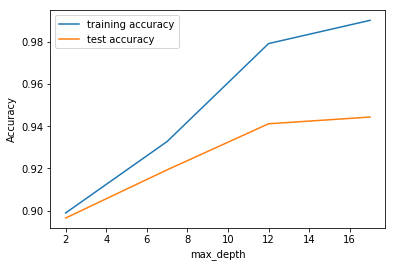

In [190]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

We can see, the accuracy is right for 10 to 12 values of `max_depth`.

In [191]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1000, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=10, class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1, return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=10,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              r

In [192]:
# scores
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      15.227461      0.111301         0.184495        0.011937   
1      78.420999      6.070751         0.884893        0.087141   
2     139.531133     21.069482         1.222099        0.260026   

  param_n_estimators                 params  split0_test_score  \
0                100  {'n_estimators': 100}           0.940238   
1                500  {'n_estimators': 500}           0.940952   
2                900  {'n_estimators': 900}           0.940952   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.931905           0.936190           0.942381           0.936905   
1           0.930000           0.936429           0.941190           0.937381   
2           0.929286           0.935476           0.941190           0.937619   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.937524        0.003597                1            0.965893   
1         0.937190        0.004061                2            0.967381   
2         0.936905        0.004367                3            0.967321   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.971190            0.967143            0.965179   
1            0.971071            0.968333            0.965476   
2            0.971250            0.967857            0.966131   

   split4_train_score  mean_train_score  std_train_score  
0            0.967619          0.967405         0.002083  
1            0.968333          0.968119         0.001808  
2            0.967798          0.968071         0.001706

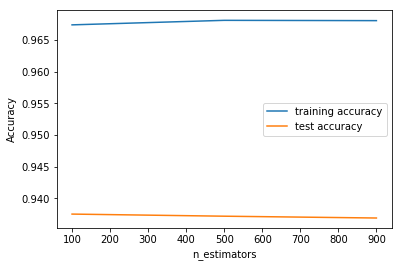

In [193]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

The `n_estimator` can be considered from 100 to 500.

In [194]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=10, class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=10,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              r

In [195]:
# scores
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       3.229346      0.061227         0.102941        0.009544   
1       8.176308      0.605550         0.116334        0.012492   
2      10.639895      0.792357         0.091747        0.003186   
3      16.935682      2.320264         0.129126        0.039633   
4      20.319740      3.438103         0.109538        0.040224   

  param_max_features                params  split0_test_score  \
0                  4   {'max_features': 4}           0.938810   
1                  8   {'max_features': 8}           0.941905   
2                 14  {'max_features': 14}           0.942143   
3                 20  {'max_features': 20}           0.940952   
4                 24  {'max_features': 24}           0.943333   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.927619           0.937143           0.934524           0.934762   
1           0.930000           0.936190           0.942381           0.938333   
2           0.929762           0.938333           0.940476           0.937143   
3           0.931667           0.938810           0.940476           0.935714   
4           0.931429           0.938095           0.941190           0.937143   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.934571        0.003820                5            0.960238   
1         0.937762        0.004506                2            0.965179   
2         0.937571        0.004268                3            0.968214   
3         0.937524        0.003456                4            0.968929   
4         0.938238        0.004056                1            0.969643   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.962500            0.960893            0.957619   
1            0.968571            0.965357            0.964524   
2            0.971310            0.969821            0.967262   
3            0.971964            0.969583            0.966012   
4            0.972798            0.971250            0.967024   

   split4_train_score  mean_train_score  std_train_score  
0            0.959286          0.960107         0.001626  
1            0.965119          0.965750         0.001438  
2            0.967857          0.968893         0.001476  
3            0.969286          0.969155         0.001899  
4            0.968810          0.969905         0.001987

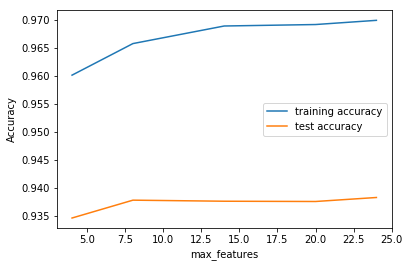

In [196]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

We can see the accuracy is being maintained for `max_feature` = 10 to 20. 

In [197]:
# GridSearchCV to find optimal min_samples_leaf

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [198]:
# scores
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       6.682165      0.160299         0.084356        0.002575   
1       7.456721      1.212542         0.094947        0.010689   
2       7.135105      0.539097         0.081354        0.010812   
3       5.338138      0.151224         0.072957        0.002965   
4       5.132851      0.170423         0.070960        0.002682   

  param_min_samples_leaf                     params  split0_test_score  \
0                    100  {'min_samples_leaf': 100}           0.903571   
1                    150  {'min_samples_leaf': 150}           0.899762   
2                    200  {'min_samples_leaf': 200}           0.895714   
3                    250  {'min_samples_leaf': 250}           0.895238   
4                    300  {'min_samples_leaf': 300}           0.889524   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.887619           0.899762           0.896905           0.897857   
1           0.883571           0.892857           0.892381           0.888810   
2           0.887381           0.893333           0.890238           0.890714   
3           0.882143           0.890952           0.886667           0.887619   
4           0.883571           0.886429           0.890000           0.883571   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.897143        0.005281                1            0.903036   
1         0.891476        0.005310                2            0.898690   
2         0.891476        0.002839                2            0.893869   
3         0.888524        0.004381                4            0.893214   
4         0.886619        0.002774                5            0.889048   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.905774            0.905417            0.899762   
1            0.898690            0.898333            0.894881   
2            0.899048            0.896726            0.891310   
3            0.894583            0.895179            0.888155   
4            0.892917            0.888036            0.886786   

   split4_train_score  mean_train_score  std_train_score  
0            0.900595          0.902917         0.002440  
1            0.893214          0.896762         0.002282  
2            0.893869          0.894964         0.002666  
3            0.887679          0.891762         0.003207  
4            0.885774          0.888512         0.002465

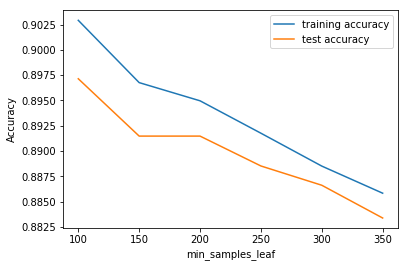

In [199]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

We can see the accuracy of is getting decreased for the increase in min_samples_leaf. So we can consider its value from 100 to 250

In [200]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(100, 700, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [201]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       9.001834      0.313938         0.095947        0.005017   
1      10.356058      1.885363         0.100943        0.012256   
2       9.236100      1.557966         0.092147        0.009573   
3       7.953636      0.091180         0.091548        0.009660   
4      10.378045      1.161295         0.113336        0.033404   

  param_min_samples_split                      params  split0_test_score  \
0                     100  {'min_samples_split': 100}           0.927857   
1                     150  {'min_samples_split': 150}           0.920238   
2                     200  {'min_samples_split': 200}           0.912619   
3                     250  {'min_samples_split': 250}           0.906667   
4                     300  {'min_samples_split': 300}           0.904286   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.915238           0.922619           0.925238           0.921429   
1           0.907619           0.912619           0.915000           0.910476   
2           0.899286           0.906667           0.906667           0.903571   
3           0.894762           0.904048           0.900952           0.902381   
4           0.892143           0.900952           0.897381           0.899048   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.922476        0.004245                1            0.942083   
1         0.913190        0.004282                2            0.928512   
2         0.905762        0.004368                3            0.916488   
3         0.901762        0.003983                4            0.910833   
4         0.898762        0.004028                5            0.904702   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.944583            0.944464            0.939821   
1            0.929286            0.927798            0.925476   
2            0.920595            0.918571            0.914524   
3            0.914226            0.912738            0.908274   
4            0.909524            0.907976            0.903988   

   split4_train_score  mean_train_score  std_train_score  
0            0.939464          0.942083         0.002186  
1            0.925298          0.927274         0.001612  
2            0.913512          0.916738         0.002593  
3            0.908214          0.910857         0.002389  
4            0.902917          0.905821         0.002506

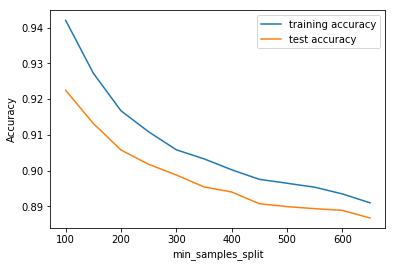

In [202]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

We can see the accuracy of is getting decreased for the increase in `min_sample_split`. So we can consider its value from 100 to 250.

#### The below values we got for the features after tuning:
* `max_depth`			10 to 12
* `n_estimators`		100 to 500
* `max_features`		15 to 20
* `min_samples_leaf` 	150 to 250
* `min_samples_split`	200 to 400


**Since we have a range of values for the parameters, we can use paramter grid to make a final model**

In [203]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [10,12],
    'min_samples_leaf': range(150, 250, 50),
    'min_samples_split': range(200, 400, 100),
    'n_estimators': [300,400,500], 
    'max_features': [15, 20]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced')
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,refit='recall_score' ,
                          cv = 3, n_jobs=-1, return_train_score=True,verbose=1)

In [204]:
# fit
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed: 36.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [205]:
# Let's see the acuracy and the optimum values of the parameters
print('Acuracy : ',round(grid_search.best_score_,2),' and the optimum paramter values pairs are ',grid_search.best_params_)

Acuracy :  0.89  and the optimum paramter values pairs are  {'max_depth': 12, 'max_features': 15, 'min_samples_leaf': 150, 'min_samples_split': 200, 'n_estimators': 300}


**We will be using these values 'max_depth': 12, 'max_features': 15, 'min_samples_leaf': 150, 'min_samples_split': 200, 'n_estimators': 500**

In [212]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc_final = RandomForestClassifier(bootstrap=True,class_weight='balanced',
                             max_depth=12,
                             min_samples_leaf=150, 
                             min_samples_split=200,
                             max_features=15,
                             n_estimators=300)

In [213]:
# Fitting
rfc_final.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=12, max_features=15,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=150, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [214]:
# Predicting
predictions = rfc_final.predict(X_test)

Let's see the confusion matrix

In [215]:
confusion_rm_f = metrics.confusion_matrix( y_test, predictions )
confusion_rm_f

array([[7460,  791],
       [ 140,  610]], dtype=int64)

In [216]:
TN = confusion_rm_f[0,0] # true positive 
TP = confusion_rm_f[1,1] # true negatives
FP = confusion_rm_f[0,1] # false positives
FN = confusion_rm_f[1,0] # false negatives


print('Accuracy Score: ', round(accuracy_score(y_test,predictions),2))
# Let's see the sensitivity of our model
print('Sensitivity: ', round(TP / float(TP+FN),2))

# Let us calculate specificity
print('Specificity: ',round(TN / float(TN+FP),2))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',round(FP/ float(TN+FP),2))

# positive predictive value 
print('positive predictive value: ', round(TP / float(TP+FP),2))   #precision

# Negative predictive value
print('Negative predictive value: ',round(TN / float(TN+ FN),2))

## Misclassification rate

print('Misclassification Rate: ',round((FN+FP)/(TP+TN+FP+FN),2))

Accuracy Score:  0.9
Sensitivity:  0.81
Specificity:  0.9
false postive rate:  0.1
positive predictive value:  0.44
Negative predictive value:  0.98
Misclassification Rate:  0.1


In [218]:
from sklearn.metrics import precision_score,recall_score
print("Precision = {}".format(round(precision_score(y_test, predictions),2)))
print("Recall = {}".format(recall_score(y_test, predictions)))

Precision = 0.44
Recall = 0.8133333333333334


### Ratings of the Random Forest
* Accuracy : 90%
* Sensitivity : 81% == Recall!

So the model is pretty good for our requirement as the accuracy and sensitivity are better than the other models.

Now, out model is prepared and so let's try to find out the important variables.

### Important variables

In [219]:
# Let's find the importance values
rfc_final.feature_importances_

array([1.43932540e-03, 5.06374066e-03, 4.09217858e-02, 9.67071505e-04,
       1.39237392e-03, 1.07110407e-02, 1.01021745e-03, 1.54935029e-03,
       4.74827504e-03, 4.08322141e-04, 1.95617102e-03, 7.52518359e-02,
       2.16265976e-04, 2.32155559e-03, 1.01607092e-01, 9.83691592e-04,
       1.29030063e-03, 8.06945020e-03, 1.17875921e-03, 9.99372140e-04,
       2.13895366e-02, 3.39252521e-04, 5.41049753e-04, 3.52077270e-03,
       1.51657717e-04, 3.35973997e-04, 7.48572838e-03, 1.47165966e-03,
       1.55549774e-03, 4.83974319e-02, 2.09299317e-03, 1.67964108e-03,
       1.56482597e-03, 1.29599980e-03, 2.22575799e-03, 1.33952456e-03,
       3.09790538e-05, 2.55625402e-05, 1.09302493e-04, 2.61118195e-03,
       3.33959377e-03, 3.12649058e-03, 4.01339200e-05, 2.40205617e-04,
       1.32309698e-02, 8.69356725e-04, 1.63926982e-03, 7.51524947e-04,
       2.03944557e-04, 5.32735139e-06, 4.21967039e-03, 1.71680530e-03,
       2.99625917e-03, 4.97715724e-02, 8.78977215e-04, 1.40140445e-03,
      

In [220]:
df_rfc_imp_col = pd.DataFrame({'ColName':X_train.columns, 'Imp':rfc_final.feature_importances_})

In [221]:
df_rfc_imp_col.sort_values(by='Imp', ascending=False)[:15]

ColName       Imp
80        total_ic_mou_8  0.107609
14         roam_og_mou_8  0.101607
11         roam_ic_mou_8  0.075252
65          loc_ic_mou_8  0.066747
95      total_rech_amt_8  0.050671
53        total_og_mou_8  0.049772
29          loc_og_mou_8  0.048397
101   last_day_rch_amt_8  0.048060
2                 arpu_8  0.040922
142  date_in_last_rech_8  0.037004
110   av_rech_amt_data_8  0.030444
59      loc_ic_t2m_mou_8  0.023662
20      loc_og_t2m_mou_8  0.021390
113          vol_2g_mb_8  0.018007
77          std_ic_mou_8  0.017854

In [222]:
# Above you can see the top 15 features with their weightage.

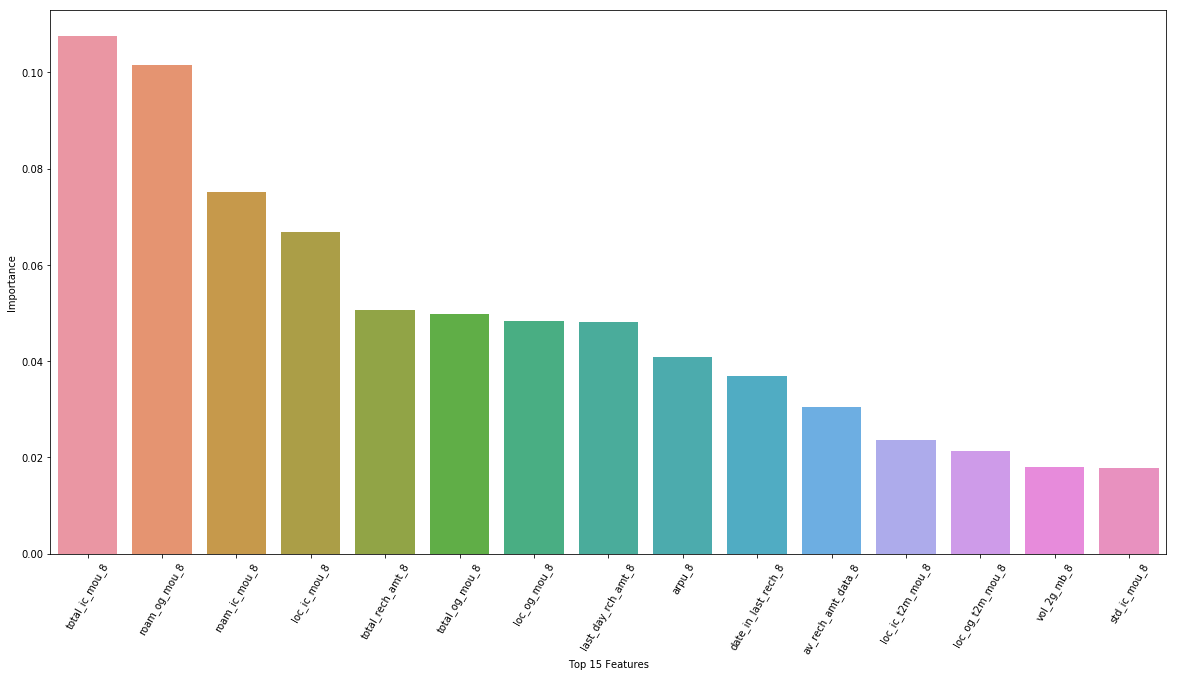

In [223]:
plt.figure(figsize=(20, 10))
ax = sns.barplot(x='ColName', y= 'Imp', data=df_rfc_imp_col.sort_values(by='Imp', ascending=False)[:15])
ax.set(xlabel = 'Top 15 Features', ylabel = 'Importance')
plt.xticks(rotation = 60)
plt.show()

# Ensembling on Board!

In [224]:
import xgboost

In [225]:
d_train = xgboost.DMatrix(X_train, label=y_train)
d_test = xgboost.DMatrix(X_test, label=y_test)

In [226]:
params = {
    "eta": 0.01,
    "objective": "reg:logistic",
    "subsample": 0.5,
    "base_score": np.mean(y_train),
    "eval_metric": "logloss"
}
model_vg_boost = xgboost.train(params, d_train, 5000, evals = [(d_test, "test")], verbose_eval=100, early_stopping_rounds=20)

[0]	test-logloss:0.282875
Will train until test-logloss hasn't improved in 20 rounds.
[100]	test-logloss:0.165796
[200]	test-logloss:0.142979
[300]	test-logloss:0.135554
[400]	test-logloss:0.132822
[500]	test-logloss:0.13193
Stopping. Best iteration:
[554]	test-logloss:0.13144



In [227]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

preds = model_vg_boost.predict(d_test)
best_preds = np.asarray([np.argmax(line) for line in preds])
print('--------Performance on Test Set!!---------------')
print("Accuracy = {}".format(round(accuracy_score(y_test, best_preds),2)))
print("Precision = {}".format(round(precision_score(y_test, best_preds, average='macro'),2)))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))

--------Performance on Test Set!!---------------
Accuracy = 0.92
Precision = 0.46
Recall = 0.5


In [228]:
TN = confusion_rm_f[0,0] # true positive 
TP = confusion_rm_f[1,1] # true negatives
FP = confusion_rm_f[0,1] # false positives
FN = confusion_rm_f[1,0] # false negatives


print('Accuracy Score: ', round(accuracy_score(y_test,best_preds),2))
# Let's see the sensitivity of our model
print('Sensitivity: ', round(TP / float(TP+FN),2))

# Let us calculate specificity
print('Specificity: ',round(TN / float(TN+FP),2))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',round(FP/ float(TN+FP),2))

# positive predictive value 
print('positive predictive value: ', round(TP / float(TP+FP),2))   #precision

# Negative predictive value
print('Negative predictive value: ',round(TN / float(TN+ FN),2))

## Misclassification rate

print('Misclassification Rate: ',round((FN+FP)/(TP+TN+FP+FN),2))

Accuracy Score:  0.92
Sensitivity:  0.81
Specificity:  0.9
false postive rate:  0.1
positive predictive value:  0.44
Negative predictive value:  0.98
Misclassification Rate:  0.1


## Tuning the XGBOOST Hyperparameters!

In [229]:
params = {
    "eta": 0.3,
    "objective": "reg:logistic",
    "max_depth":15,
    #"max_delta_step":2, This is usually needed when we have imbalance in our Class, which we have, but we know how to dela with that
    "subsample": 0.51,
    "base_score": np.mean(y_train),
    "eval_metric": ["auc","rmse"]
}
model_vg_boost = xgboost.train(params, d_train, 5000, evals = [(d_test, "test")], verbose_eval=100, early_stopping_rounds=80)

[0]	test-auc:0.915595	test-rmse:0.225551
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 80 rounds.
Stopping. Best iteration:
[19]	test-auc:0.932407	test-rmse:0.206582



* **ETA** is the Learning rate which is default to 0.3. We played with ETA, but then if we were decreasing the learning rate or ETA in more precise terms, the RMSE error was increasing, which we had to keep as low as possible.
* Our Objective function is to find a **Classification Regression**, so used **Logistic** which is very obvious!
* It was very much possible that the more **depth** we use, the more overfit our model may become, but then looking at the results, 93% is our Train and 92% is our test accuracy respectively.
* The **max_delta_step** is used to maintain class balance, but it was making the model get more error, so we tackled it while calculating **precision and recall**
* Finally, since we had setted up the **Sensitivity and Accuracy** as out evaluation metrics, we need them in our XGBOOST Algo also.

In [230]:
# Making the predictions on the Tuned Parameters!
preds = model_vg_boost.predict(d_test)
best_preds = np.asarray([np.argmax(line) for line in preds])
print('--------Performance on Test Set!!---------------')
print("Accuracy = {}".format(round(accuracy_score(y_test, best_preds),2)))
print("Precision = {}".format(round(precision_score(y_test, best_preds, average='micro'),2)))
print("Recall = {}".format(recall_score(y_test, best_preds, average='micro')))

--------Performance on Test Set!!---------------
Accuracy = 0.92
Precision = 0.92
Recall = 0.9166759248972336


We use the keyword **average='micro'** because it is used when we have a class imbalance.
A **micro-average** will aggregate the contributions of all classes to compute the average metric.

In [231]:
TN = confusion_rm_f[0,0] # true positive 
TP = confusion_rm_f[1,1] # true negatives
FP = confusion_rm_f[0,1] # false positives
FN = confusion_rm_f[1,0] # false negatives


print('Accuracy Score: ', round(accuracy_score(y_test,best_preds),2))
# Let's see the sensitivity of our model
print('Sensitivity: ', round(TP / float(TP+FN),2))

# Let us calculate specificity
print('Specificity: ',round(TN / float(TN+FP),2))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',round(FP/ float(TN+FP),2))

# positive predictive value 
print('positive predictive value: ', round(TP / float(TP+FP),2))   #precision

# Negative predictive value
print('Negative predictive value: ',round(TN / float(TN+ FN),2))

## Misclassification rate

print('Misclassification Rate: ',round((FN+FP)/(TP+TN+FP+FN),2))

Accuracy Score:  0.92
Sensitivity:  0.81
Specificity:  0.9
false postive rate:  0.1
positive predictive value:  0.44
Negative predictive value:  0.98
Misclassification Rate:  0.1


So, let me explain the results of the **XGBoost here**!
1. We perfromed Hyper Parameter tuning and got the Accuracy of 92% on Test Set with 81% of Sensitivity.
2. Along with that, the Recall we are getting is 91% which is quite good, as the **Churners are being identified correctly!**
3. The Missclassification Rate is 10% although, but we are more focussed in finding out the **churners** so we can risk the classification of non-churners to churn at some extend.

* We had 6% missclassification in Random Forest, but then sensitivity was not appropriate and by the time **Sensitivity** was boosted, the misslcassification rate went to 16%.
* In Logistic regression, we had **Sensitivity of 85% and somewhere was the specififcity**
* We choose XGBoost as it provides accuracy of 92% and Recall of 91% and Specificity of 90%

In [232]:
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
classifier = xgboost.XGBClassifier()
params = {
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth" : [3,4,5,6,8,10,12,15],
    "min_weight_child":[1,3,5,7],
    "gamma": [0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.7]
}

In [233]:
random_search = RandomizedSearchCV(classifier , param_distributions = params , n_iter=5,scoring = 'roc_auc',n_jobs = -1,cv=3,verbose=3)

In [234]:
random_search.fit(X_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  3.5min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           se...
                                           subsample=1),
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0

In [235]:
print(random_search.best_estimator_)
print(random_search.best_params_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=0.5, gamma=0.1, learning_rate=0.1,
              max_delta_step=0, max_depth=4, min_child_weight=1,
              min_weight_child=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=1)
{'min_weight_child': 1, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.5}


## Final Inferences:

1. The best Model Obtained is **XGBoost with all features**.
2. The metrics are as followed:
    * Sensitivity : 81% and Specificity: 91%.
    * Accuracy : 92% on Test Set and 93% while training!
    * Misclassification rate: 10% (lowest obtained!)
3. The RMSE error is 0.2, which is quite condenmable as keeping the error low and obtaining high efficiancy is quite labourous work, which XG Boost did!

In [236]:
f = "gain"
df_feature_impo = pd.DataFrame({'Score':model_vg_boost.get_score(importance_type= f)})

In [237]:
df_feature_impo.sort_values(by = 'Score',inplace=True,ascending=False)

In [238]:
df_feature_top_10 = df_feature_impo[:10]

In [239]:
df_feature_top_10

Score
fb_user_8            299.443883
total_ic_mou_8        44.102613
av_rech_amt_data_8     8.363785
sep_vbc_3g             7.437403
isd_og_mou_7           5.128160
spl_ic_mou_8           4.895996
last_day_rch_amt_8     4.686322
loc_ic_t2m_mou_8       4.594373
roam_og_mou_8          4.227269
date_in_last_rech_8    3.804191

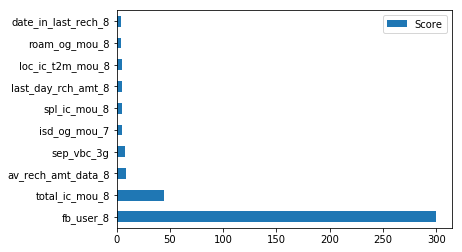

In [240]:
df_feature_top_10.plot(kind='barh');

## Business Improvements! : 

1. The users who donot recharge frequently should be provided some kind of Tariff over a period of time.
2. Focus should be on the users whose **Avg Max Recharge goes decreasing**.
3. More attractive and feasible rates should be provided over **Roaming Services**. I too use **Vodafone Network** of chennai in Bhubaneswar and donot recharge frequently as their are not very suitable roaming packs to subscribe for.
4. Now, come the STD and ISD rate and their charges. The company should focus on providing fair amount of top customers by providing more quality services and rates over the ISD and STD packages.
5. Also, the telecom companies should provide some **night recharge packs to be used for social networking only**. I remember, 6 years back, Vodafone used to give 1 GB of data in Night on a recharge of 21/- every night. I used to watch **Tarak Mehta ka Ooltah Chashma**, but that is how you got to retain the customers.
6. Also, right now on recharge of some special top-up, services of **Netflix or Amazon Prime** should be sponsored for some period of time but on special offers only.


# Thank You!